In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from lssvr import LSSVR
import optuna
import shap
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')

In [67]:
data = pd.read_excel('data.xlsx')
data.head()

,Charging form,Co loading rate,Mass of Co/SiO2,Mass of HAP,Ethanol concentration,Temperature,C4 olefin yield
0,0,1.0,200,200,1.68,250,70.387120
1,0,1.0,200,200,1.68,275,219.029917
2,0,1.0,200,200,1.68,300,702.639767
3,0,1.0,200,200,1.68,325,978.163547
4,0,1.0,200,200,1.68,350,1737.376011


In [68]:
scaler = MinMaxScaler()
df = scaler.fit_transform(data)
df = pd.DataFrame(df)
df.columns = data.columns
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [69]:
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    gamma = trial.suggest_loguniform('gamma', 1e-3, 1e3)
    random_state = trial.suggest_int('random_state', 0, 1000)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = LSSVR(kernel='rbf', C=C, gamma=gamma)                                
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_r2 = r2_score(pred_train,y_train)
    test_r2 = r2_score(pred_test,y_test)  
    train_rmse = mean_squared_error(pred_train,y_train,squared=False)
    test_rmse = mean_squared_error(pred_test,y_test,squared=False)
    train_mae = mean_absolute_error(pred_train,y_train)
    test_mae = mean_absolute_error(pred_test,y_test)
    train_mape = mean_absolute_percentage_error(pred_train,y_train)
    test_mape = mean_absolute_percentage_error(pred_test,y_test)
    
    print('train_R2_mean:',train_r2)
    print('test_R2_mean:',test_r2)
    print('train_RMSE_mean:',train_rmse)
    print('test_RMSE_mean:',test_rmse)
    print('train_MAE_mean:',train_mae)
    print('test_MAE_mean:',test_mae)
    print('train_MAPE_mean:',train_mape)
    print('test_MAPE_mean:',test_mape)
    
    acc = test_r2
    
    return acc

In [70]:
study1 = optuna.create_study(direction='maximize')
study1.optimize(objective, n_trials=1000)
print('Best Parameters: ', study1.best_params)
print('Best Score: ', study1.best_value)

[I 2023-03-23 22:02:23,847] A new study created in memory with name: no-name-0b4a20e5-9b01-421b-8c4f-64701c87dd11
[I 2023-03-23 22:02:23,847] Trial 0 finished with value: -4.418201898782729 and parameters: {'C': 0.290111062335431, 'gamma': 0.29056062709090485, 'random_state': 387}. Best is trial 0 with value: -4.418201898782729.
[I 2023-03-23 22:02:23,865] Trial 1 finished with value: -112788.72334159847 and parameters: {'C': 0.009949951303968996, 'gamma': 69.97166395087477, 'random_state': 63}. Best is trial 0 with value: -4.418201898782729.
[I 2023-03-23 22:02:23,872] Trial 2 finished with value: -2326352.471369654 and parameters: {'C': 0.0014976725352726023, 'gamma': 0.019413119798140605, 'random_state': 193}. Best is trial 0 with value: -4.418201898782729.
[I 2023-03-23 22:02:23,883] Trial 3 finished with value: 0.4293618090565775 and parameters: {'C': 285.1430147003454, 'gamma': 2.209527624799644, 'random_state': 575}. Best is trial 3 with value: 0.4293618090565775.
[I 2023-03-23 

train_R2_mean: -2.8161546729848803
test_R2_mean: -4.418201898782729
train_RMSE_mean: 0.14357314485400555
test_RMSE_mean: 0.1935910691436345
train_MAE_mean: 0.09339028948742355
test_MAE_mean: 0.1182677820502445
train_MAPE_mean: 0.7577634141882904
test_MAPE_mean: 0.8302453679276741
train_R2_mean: -6988.382461975861
test_R2_mean: -112788.72334159847
train_RMSE_mean: 0.21943633254046116
test_RMSE_mean: 0.16397202582335624
train_MAE_mean: 0.16212263379759378
test_MAE_mean: 0.13942417034253285
train_MAPE_mean: 1.0588490488540476
test_MAPE_mean: 0.9223850151281107
train_R2_mean: -2387710.1844361257
test_R2_mean: -2326352.471369654
train_RMSE_mean: 0.21019065393513947
test_RMSE_mean: 0.21457478181883288
train_MAE_mean: 0.1470565186162179
test_MAE_mean: 0.16478841305850478
train_MAPE_mean: 1.1190661196234506
test_MAPE_mean: 1.254147050826685
train_R2_mean: 0.989839730725056
test_R2_mean: 0.4293618090565775
train_RMSE_mean: 0.02165349312016804
test_RMSE_mean: 0.11436624613828991
train_MAE_mean: 

[I 2023-03-23 22:02:24,043] Trial 16 finished with value: 0.8844055873361724 and parameters: {'C': 38.618617669684866, 'gamma': 0.731844437344926, 'random_state': 842}. Best is trial 8 with value: 0.8860664473088931.
[I 2023-03-23 22:02:24,059] Trial 17 finished with value: 0.8626683930415797 and parameters: {'C': 145.5981043732747, 'gamma': 0.669793815519625, 'random_state': 529}. Best is trial 8 with value: 0.8860664473088931.
[I 2023-03-23 22:02:24,076] Trial 18 finished with value: 0.7852278220298174 and parameters: {'C': 15.065925149198579, 'gamma': 1.792221798666398, 'random_state': 913}. Best is trial 8 with value: 0.8860664473088931.
[I 2023-03-23 22:02:24,089] Trial 19 finished with value: -1.6254158126100369 and parameters: {'C': 912.9617248937859, 'gamma': 52.33815826840364, 'random_state': 675}. Best is trial 8 with value: 0.8860664473088931.
[I 2023-03-23 22:02:24,089] Trial 20 finished with value: 0.8816495763667148 and parameters: {'C': 1.6268657368497703, 'gamma': 0.708

train_R2_mean: 0.9643442383862342
test_R2_mean: 0.8844055873361724
train_RMSE_mean: 0.03598881547993717
test_RMSE_mean: 0.10093922192139457
train_MAE_mean: 0.024898327112784575
test_MAE_mean: 0.06005221665788492
train_MAPE_mean: 14.604780662870647
test_MAPE_mean: 0.43407511210565136
train_R2_mean: 0.9767611968292614
test_R2_mean: 0.8626683930415797
train_RMSE_mean: 0.029946299587987224
test_RMSE_mean: 0.11834296302057161
train_MAE_mean: 0.02084642933926408
test_MAE_mean: 0.05613300829691277
train_MAPE_mean: 1.3474306094591944
test_MAPE_mean: 1.0619526987948675
train_R2_mean: 0.9699258419716993
test_R2_mean: 0.7852278220298174
train_RMSE_mean: 0.03741764275512224
test_RMSE_mean: 0.06827766702362259
train_MAE_mean: 0.02461060767863904
test_MAE_mean: 0.04389545944870803
train_MAPE_mean: 3.002455203332475
test_MAPE_mean: 1.1289654420488084
train_R2_mean: 0.9999990630260631
test_R2_mean: -1.6254158126100369
train_RMSE_mean: 0.00021953403029741504
test_RMSE_mean: 0.09684134744581457
train_MA

[I 2023-03-23 22:02:24,252] Trial 30 finished with value: 0.8327415774211027 and parameters: {'C': 2.4219500978498423, 'gamma': 1.1444559435864783, 'random_state': 451}. Best is trial 8 with value: 0.8860664473088931.
[I 2023-03-23 22:02:24,264] Trial 31 finished with value: 0.411405737801804 and parameters: {'C': 284.1431048341434, 'gamma': 0.7439713503978864, 'random_state': 759}. Best is trial 8 with value: 0.8860664473088931.
[I 2023-03-23 22:02:24,276] Trial 32 finished with value: 0.9359566298259849 and parameters: {'C': 205.7308641469514, 'gamma': 1.4404102931888438, 'random_state': 740}. Best is trial 32 with value: 0.9359566298259849.
[I 2023-03-23 22:02:24,291] Trial 33 finished with value: 0.8875849283222096 and parameters: {'C': 31.356681763035333, 'gamma': 9.689915242195472, 'random_state': 603}. Best is trial 32 with value: 0.9359566298259849.
[I 2023-03-23 22:02:24,309] Trial 34 finished with value: 0.2941154511572035 and parameters: {'C': 27.72959503992824, 'gamma': 17.

train_R2_mean: 0.8258632425896719
test_R2_mean: 0.8327415774211027
train_RMSE_mean: 0.06861340576845756
test_RMSE_mean: 0.08373539362513523
train_MAE_mean: 0.04379865975309448
test_MAE_mean: 0.057852029830093014
train_MAPE_mean: 0.7405180217626703
test_MAPE_mean: 0.7491939850780246
train_R2_mean: 0.9663813072737676
test_R2_mean: 0.411405737801804
train_RMSE_mean: 0.039442847689695394
test_RMSE_mean: 0.07779530347568386
train_MAE_mean: 0.02760305399004935
test_MAE_mean: 0.04048558558239683
train_MAPE_mean: 0.7815211546578331
test_MAPE_mean: 1.443385422223601
train_R2_mean: 0.9839561064478102
test_R2_mean: 0.9359566298259849
train_RMSE_mean: 0.02346440607659014
test_RMSE_mean: 0.07787545566323113
train_MAE_mean: 0.016429563257948535
test_MAE_mean: 0.04216224921828592
train_MAPE_mean: 1.0068107748695028
test_MAPE_mean: 0.3669248477776369
train_R2_mean: 0.9972873875471283
test_R2_mean: 0.8875849283222096
train_RMSE_mean: 0.010481269942309366
test_RMSE_mean: 0.06015181359276869
train_MAE_me

[I 2023-03-23 22:02:24,456] Trial 42 finished with value: 0.9341941662372321 and parameters: {'C': 237.1506269394436, 'gamma': 1.7649776077073716, 'random_state': 34}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:24,470] Trial 43 finished with value: 0.8644673735108301 and parameters: {'C': 201.1183600070042, 'gamma': 4.398414037911993, 'random_state': 15}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:24,489] Trial 44 finished with value: 0.7172994125811757 and parameters: {'C': 65.95217037797332, 'gamma': 1.4936854155084314, 'random_state': 141}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:24,495] Trial 45 finished with value: 0.666740035098185 and parameters: {'C': 80.4397733226833, 'gamma': 5.534853583322688, 'random_state': 567}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:24,523] Trial 46 finished with value: -0.05979740724530358 and parameters: {'C': 23.134024176435492, 'gamma': 1.796318

train_R2_mean: 0.9834748469966272
test_R2_mean: 0.9341941662372321
train_RMSE_mean: 0.021823108463748894
test_RMSE_mean: 0.07551464929641998
train_MAE_mean: 0.014877595720664159
test_MAE_mean: 0.05059296783736978
train_MAPE_mean: 1.4605271251850132
test_MAPE_mean: 0.7595021947783027
train_R2_mean: 0.9968613502514364
test_R2_mean: 0.8644673735108301
train_RMSE_mean: 0.011728992640203481
test_RMSE_mean: 0.06664431876136147
train_MAE_mean: 0.008374047439649668
test_MAE_mean: 0.03940625782550137
train_MAPE_mean: 0.6233021608782591
test_MAPE_mean: 1.1565539398273386
train_R2_mean: 0.9838267955665582
test_R2_mean: 0.7172994125811757
train_RMSE_mean: 0.024230549027152985
test_RMSE_mean: 0.10349939190623686
train_MAE_mean: 0.017162651544575566
test_MAE_mean: 0.04739904339974563
train_MAPE_mean: 0.8688177541158448
test_MAPE_mean: 1.2409350015351464
train_R2_mean: 0.997706026490204
test_R2_mean: 0.666740035098185
train_RMSE_mean: 0.01078554890641537
test_RMSE_mean: 0.08333093254671678
train_MAE_

[I 2023-03-23 22:02:24,670] Trial 53 finished with value: 0.879465837748312 and parameters: {'C': 753.4306261148968, 'gamma': 1.9196515181475027, 'random_state': 581}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:24,692] Trial 54 finished with value: 0.7614122931217374 and parameters: {'C': 307.9293270778758, 'gamma': 0.35937280729745236, 'random_state': 531}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:24,698] Trial 55 finished with value: 0.7996585545954389 and parameters: {'C': 126.3109335054517, 'gamma': 3.3523511473787, 'random_state': 824}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:24,731] Trial 56 finished with value: 0.7559412094423074 and parameters: {'C': 52.12897492787369, 'gamma': 1.5564169965773782, 'random_state': 652}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:24,744] Trial 57 finished with value: 0.9176226534260169 and parameters: {'C': 999.5586630030595, 'gamma': 9.430992

train_R2_mean: 0.9918604511620511
test_R2_mean: 0.879465837748312
train_RMSE_mean: 0.0189137361379423
test_RMSE_mean: 0.10502395158504634
train_MAE_mean: 0.013314662388749215
test_MAE_mean: 0.0442329939279315
train_MAPE_mean: 6.451349850635471
test_MAPE_mean: 1.2416450085557709
train_R2_mean: 0.9487130156684549
test_R2_mean: 0.7614122931217374
train_RMSE_mean: 0.04474159866967174
test_RMSE_mean: 0.11785841917382507
train_MAE_mean: 0.02777383949492307
test_MAE_mean: 0.07797019705254463
train_MAPE_mean: 0.7593031873767857
test_MAPE_mean: 0.5483678701073663
train_R2_mean: 0.9927401600291281
test_R2_mean: 0.7996585545954389
train_RMSE_mean: 0.017834005639298947
test_RMSE_mean: 0.08204780260651125
train_MAE_mean: 0.012181963005094765
test_MAE_mean: 0.04758494610452324
train_MAPE_mean: 0.8679020925019245
test_MAPE_mean: 0.9413676179641596
train_R2_mean: 0.983812812360893
test_R2_mean: 0.7559412094423074
train_RMSE_mean: 0.026876829888699504
test_RMSE_mean: 0.07851235017642177
train_MAE_mean:

[I 2023-03-23 22:02:24,897] Trial 64 finished with value: 0.8601333356077668 and parameters: {'C': 119.39132238267028, 'gamma': 0.49039154424165865, 'random_state': 56}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:24,906] Trial 65 finished with value: 0.5633112682814891 and parameters: {'C': 990.8838359382274, 'gamma': 3.62692010159415, 'random_state': 704}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:24,942] Trial 66 finished with value: 0.8911553626781532 and parameters: {'C': 65.3279413723151, 'gamma': 1.0774343991550361, 'random_state': 599}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:24,953] Trial 67 finished with value: 0.6375685070133763 and parameters: {'C': 55.20690247077833, 'gamma': 1.0103355744695024, 'random_state': 559}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:24,976] Trial 68 finished with value: 0.9177869663841766 and parameters: {'C': 195.1851280547272, 'gamma': 2.08502

train_R2_mean: 0.9473943870432628
test_R2_mean: 0.8601333356077668
train_RMSE_mean: 0.046742494751174174
test_RMSE_mean: 0.06723068165367654
train_MAE_mean: 0.028423009935251136
test_MAE_mean: 0.045475998025631445
train_MAPE_mean: 1.1192766530718472
test_MAPE_mean: 0.47107766029999776
train_R2_mean: 0.9952413180125038
test_R2_mean: 0.5633112682814891
train_RMSE_mean: 0.012251919723621163
test_RMSE_mean: 0.1430326608217446
train_MAE_mean: 0.007778188560741297
test_MAE_mean: 0.07531457728816358
train_MAPE_mean: 0.6033437648475548
test_MAPE_mean: 0.8149697790978517
train_R2_mean: 0.9682212838234886
test_R2_mean: 0.8911553626781532
train_RMSE_mean: 0.036433198512232916
test_RMSE_mean: 0.05818340026948721
train_MAE_mean: 0.024117520548737174
test_MAE_mean: 0.03795961955196171
train_MAPE_mean: 1.4352165879610408
test_MAPE_mean: 0.9691466253159124
train_R2_mean: 0.9700498765562257
test_R2_mean: 0.6375685070133763
train_RMSE_mean: 0.03414716621122308
test_RMSE_mean: 0.10568423819197499
train_M

[I 2023-03-23 22:02:25,108] Trial 74 finished with value: 0.8608186632166648 and parameters: {'C': 351.28695643309464, 'gamma': 0.5469177276951496, 'random_state': 809}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:25,120] Trial 75 finished with value: 0.8833658216177936 and parameters: {'C': 167.26271843908916, 'gamma': 2.1698374686134874, 'random_state': 679}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:25,154] Trial 76 finished with value: 0.8603860060223765 and parameters: {'C': 107.1870902865762, 'gamma': 4.668350565074511, 'random_state': 729}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:25,167] Trial 77 finished with value: 0.8390977441176243 and parameters: {'C': 245.27851183269775, 'gamma': 1.2622137535043219, 'random_state': 842}. Best is trial 35 with value: 0.947701770258739.
[I 2023-03-23 22:02:25,189] Trial 78 finished with value: 0.8702787592731462 and parameters: {'C': 721.8525367942492, 'gamma': 0.8

train_R2_mean: 0.9604180353547858
test_R2_mean: 0.8608186632166648
train_RMSE_mean: 0.04383588900171142
test_RMSE_mean: 0.05067618335602441
train_MAE_mean: 0.030158748135950642
test_MAE_mean: 0.036148415761998884
train_MAPE_mean: 4.776922491161451
test_MAPE_mean: 1.5306810154041757
train_R2_mean: 0.986756607015394
test_R2_mean: 0.8833658216177936
train_RMSE_mean: 0.021650002434898695
test_RMSE_mean: 0.0758846750121581
train_MAE_mean: 0.014755055811486178
test_MAE_mean: 0.03994658375261644
train_MAPE_mean: 10.271042596175072
test_MAPE_mean: 0.5499727240502529
train_R2_mean: 0.9944363578660949
test_R2_mean: 0.8603860060223765
train_RMSE_mean: 0.016252685713032154
test_RMSE_mean: 0.06166057246470859
train_MAE_mean: 0.010242861597953314
test_MAE_mean: 0.04413162982871427
train_MAPE_mean: 0.697192405709836
test_MAPE_mean: 0.8128584457271724
train_R2_mean: 0.9911193639212871
test_R2_mean: 0.8390977441176243
train_RMSE_mean: 0.018728835072314695
test_RMSE_mean: 0.12813484689723537
train_MAE_m

[I 2023-03-23 22:02:25,338] Trial 84 finished with value: 0.8269052252345122 and parameters: {'C': 465.1097998178638, 'gamma': 2.3769166737459138, 'random_state': 96}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:25,353] Trial 85 finished with value: 0.8088571704767693 and parameters: {'C': 279.4594593465366, 'gamma': 4.550118814159403, 'random_state': 276}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:25,378] Trial 86 finished with value: 0.40728932083931546 and parameters: {'C': 112.69623157419282, 'gamma': 6.854621956188579, 'random_state': 32}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:25,402] Trial 87 finished with value: 0.7356505304238503 and parameters: {'C': 178.2854485762524, 'gamma': 1.3720203476763004, 'random_state': 756}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:25,424] Trial 88 finished with value: 0.8729372876182189 and parameters: {'C': 996.7890340123078, 'gamma': 3.1

train_R2_mean: 0.9942958996644581
test_R2_mean: 0.8269052252345122
train_RMSE_mean: 0.014196915166696385
test_RMSE_mean: 0.09108502910791481
train_MAE_mean: 0.010129868005027404
test_MAE_mean: 0.05626915720777852
train_MAPE_mean: 1.978917545012793
test_MAPE_mean: 0.512804428387882
train_R2_mean: 0.9952241892919325
test_R2_mean: 0.8088571704767693
train_RMSE_mean: 0.014685906504000366
test_RMSE_mean: 0.0663940919360848
train_MAE_mean: 0.010063668469323583
test_MAE_mean: 0.03940398595086541
train_MAPE_mean: 0.49790355255790114
test_MAPE_mean: 6.02048615184356
train_R2_mean: 0.9975864334604605
test_R2_mean: 0.40728932083931546
train_RMSE_mean: 0.010596834795595709
test_RMSE_mean: 0.1018580448389432
train_MAE_mean: 0.007223383031170689
test_MAE_mean: 0.05041808578407407
train_MAPE_mean: 0.7483213348673424
test_MAPE_mean: 0.6465092249129056
train_R2_mean: 0.9849028336567104
test_R2_mean: 0.7356505304238503
train_RMSE_mean: 0.027606407350481314
test_RMSE_mean: 0.06547542498524381
train_MAE_m

[I 2023-03-23 22:02:25,553] Trial 94 finished with value: 0.876668109702178 and parameters: {'C': 40.951161535000075, 'gamma': 2.299946637689627, 'random_state': 644}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:25,573] Trial 95 finished with value: 0.7561943558307938 and parameters: {'C': 272.0759466528926, 'gamma': 4.209409597169096, 'random_state': 725}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:25,600] Trial 96 finished with value: 0.9111227345748227 and parameters: {'C': 472.5414111906798, 'gamma': 5.74314960796813, 'random_state': 552}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:25,614] Trial 97 finished with value: 0.7228152928690192 and parameters: {'C': 490.6088385329735, 'gamma': 5.624519862984857, 'random_state': 536}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:25,636] Trial 98 finished with value: 0.9198787381266714 and parameters: {'C': 705.7820973454811, 'gamma': 8.3394

train_R2_mean: 0.9863373313839087
test_R2_mean: 0.876668109702178
train_RMSE_mean: 0.02556070153306018
test_RMSE_mean: 0.05120708188600012
train_MAE_mean: 0.016602246862218846
test_MAE_mean: 0.03560303452665375
train_MAPE_mean: 1.8614458691051345
test_MAPE_mean: 0.754199988287736
train_R2_mean: 0.9950815832832198
test_R2_mean: 0.7561943558307938
train_RMSE_mean: 0.015263192865240192
test_RMSE_mean: 0.06507187479694504
train_MAE_mean: 0.011157075974910825
test_MAE_mean: 0.035121604622334934
train_MAPE_mean: 0.5596493300362391
test_MAPE_mean: 3.7031942930365345
train_R2_mean: 0.9966973605884559
test_R2_mean: 0.9111227345748227
train_RMSE_mean: 0.01163330963202467
test_RMSE_mean: 0.06544730180265827
train_MAE_mean: 0.008481005064697624
test_MAE_mean: 0.034518547028921126
train_MAPE_mean: 0.9126071511889957
test_MAPE_mean: 0.42706840734939777
train_R2_mean: 0.9970056480500485
test_R2_mean: 0.7228152928690192
train_RMSE_mean: 0.011717975469697531
test_RMSE_mean: 0.08002598894515742
train_MA

[I 2023-03-23 22:02:25,760] Trial 103 finished with value: 0.7717411825618891 and parameters: {'C': 747.561685124162, 'gamma': 4.114445302500657, 'random_state': 513}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:25,786] Trial 104 finished with value: 0.5867774779892171 and parameters: {'C': 427.8453691595805, 'gamma': 13.503772257666089, 'random_state': 774}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:25,811] Trial 105 finished with value: 0.9088610971622806 and parameters: {'C': 153.7406148994713, 'gamma': 2.622113872030132, 'random_state': 615}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:25,831] Trial 106 finished with value: 0.8511641488972267 and parameters: {'C': 307.2225076348467, 'gamma': 2.093730773535014, 'random_state': 549}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:25,868] Trial 107 finished with value: 0.6687468130929985 and parameters: {'C': 145.65968735173104, 'gamma':

train_R2_mean: 0.9965543052761847
test_R2_mean: 0.7717411825618891
train_RMSE_mean: 0.012812973679376437
test_RMSE_mean: 0.07670075887229272
train_MAE_mean: 0.008378938187521105
test_MAE_mean: 0.06017488767196463
train_MAPE_mean: 0.49095509097522244
test_MAPE_mean: 0.5663229751594332
train_R2_mean: 0.9997060309117441
test_R2_mean: 0.5867774779892171
train_RMSE_mean: 0.003878995244611528
test_RMSE_mean: 0.03212947069450931
train_MAE_mean: 0.002672289150015289
test_MAE_mean: 0.026661689212946073
train_MAPE_mean: 0.18411922078055795
test_MAPE_mean: 2.188222321476892
train_R2_mean: 0.9908227200625653
test_R2_mean: 0.9088610971622806
train_RMSE_mean: 0.021210627958330862
test_RMSE_mean: 0.047897956017223416
train_MAE_mean: 0.014172206290970367
test_MAE_mean: 0.03020783082624751
train_MAPE_mean: 0.8088860630752538
test_MAPE_mean: 23.28804902921561
train_R2_mean: 0.9902718599376303
test_R2_mean: 0.8511641488972267
train_RMSE_mean: 0.02055933009410053
test_RMSE_mean: 0.06967132595276256
train_

[I 2023-03-23 22:02:26,002] Trial 112 finished with value: 0.8769418570345986 and parameters: {'C': 915.8388463116689, 'gamma': 2.5688338737077445, 'random_state': 686}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,031] Trial 113 finished with value: 0.7649470421619426 and parameters: {'C': 566.5092888044352, 'gamma': 4.119556166453033, 'random_state': 737}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,068] Trial 114 finished with value: 0.7142683195005202 and parameters: {'C': 818.3003200166357, 'gamma': 6.740115779338651, 'random_state': 713}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,085] Trial 115 finished with value: 0.7385492958155834 and parameters: {'C': 442.1399367164004, 'gamma': 1.7816550920420928, 'random_state': 82}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,105] Trial 116 finished with value: -1.0061318075207457 and parameters: {'C': 623.6444881688128, 'gamma'

train_R2_mean: 0.9913771157341179
test_R2_mean: 0.8769418570345986
train_RMSE_mean: 0.01847261599360206
test_RMSE_mean: 0.10660973993303889
train_MAE_mean: 0.012636977344713954
test_MAE_mean: 0.055076328812172747
train_MAPE_mean: 1.1461343034077631
test_MAPE_mean: 3.1882745690096446
train_R2_mean: 0.9972369146084181
test_R2_mean: 0.7649470421619426
train_RMSE_mean: 0.01016503883930884
test_RMSE_mean: 0.1218831910612202
train_MAE_mean: 0.0074618688812267105
test_MAE_mean: 0.06807070483495013
train_MAPE_mean: 0.5329592690519738
test_MAPE_mean: 0.5578533705480756
train_R2_mean: 0.9977301679439278
test_R2_mean: 0.7142683195005202
train_RMSE_mean: 0.009328462989669089
test_RMSE_mean: 0.11707138165602081
train_MAE_mean: 0.005288023102746104
test_MAE_mean: 0.07468489991001537
train_MAPE_mean: 1.5804755921126057
test_MAPE_mean: 1.0275878387343083
train_R2_mean: 0.9950860568723549
test_R2_mean: 0.7385492958155834
train_RMSE_mean: 0.013352131667892115
test_RMSE_mean: 0.10858308157484522
train_MA

[I 2023-03-23 22:02:26,223] Trial 120 finished with value: 0.8790860524930487 and parameters: {'C': 435.59259559746016, 'gamma': 0.8028470066773629, 'random_state': 828}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,239] Trial 121 finished with value: 0.9126318246804156 and parameters: {'C': 108.89310371825893, 'gamma': 3.7092361496856694, 'random_state': 696}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,261] Trial 122 finished with value: 0.953228205295865 and parameters: {'C': 115.9390137248451, 'gamma': 3.8348606451184546, 'random_state': 799}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,290] Trial 123 finished with value: 0.6230678088131066 and parameters: {'C': 305.8715844422795, 'gamma': 3.83972765207871, 'random_state': 774}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,326] Trial 124 finished with value: 0.14203567595639122 and parameters: {'C': 95.87809255433802, 'gamm

train_R2_mean: 0.9701369299993926
test_R2_mean: 0.8790860524930487
train_RMSE_mean: 0.03765540984134828
test_RMSE_mean: 0.05540791589233154
train_MAE_mean: 0.025829120631588348
test_MAE_mean: 0.03817383816027671
train_MAPE_mean: 0.7148942951784045
test_MAPE_mean: 0.635498889152069
train_R2_mean: 0.993525881920233
test_R2_mean: 0.9126318246804156
train_RMSE_mean: 0.01637145905634391
test_RMSE_mean: 0.07298931479650751
train_MAE_mean: 0.011244750098666987
test_MAE_mean: 0.03900334923060443
train_MAPE_mean: 0.6263028757556053
test_MAPE_mean: 0.6190392385648713
train_R2_mean: 0.9943117222692235
test_R2_mean: 0.953228205295865
train_RMSE_mean: 0.014925943702123804
test_RMSE_mean: 0.056776580074398134
train_MAE_mean: 0.010494556695090375
test_MAE_mean: 0.035270686309647956
train_MAPE_mean: 0.9520117698758648
test_MAPE_mean: 16.06899880019304
train_R2_mean: 0.9931959338451338
test_R2_mean: 0.6230678088131066
train_RMSE_mean: 0.018552686055077986
test_RMSE_mean: 0.028867122662038953
train_MAE_

[I 2023-03-23 22:02:26,447] Trial 129 finished with value: 0.6023928133291566 and parameters: {'C': 352.2995522352321, 'gamma': 7.224859945295055, 'random_state': 937}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,461] Trial 130 finished with value: 0.919989607165149 and parameters: {'C': 61.07575411904286, 'gamma': 3.6796156030618117, 'random_state': 897}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,486] Trial 131 finished with value: 0.7999692916905753 and parameters: {'C': 52.73316806069708, 'gamma': 3.705957525534359, 'random_state': 904}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,511] Trial 132 finished with value: 0.6524304509668308 and parameters: {'C': 124.61911908417977, 'gamma': 5.673440833507495, 'random_state': 882}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,539] Trial 133 finished with value: 0.5087254930105531 and parameters: {'C': 159.5158190817015, 'gamma':

train_R2_mean: 0.9988914955707804
test_R2_mean: 0.6023928133291566
train_RMSE_mean: 0.006446971810760933
test_RMSE_mean: 0.1204012019856455
train_MAE_mean: 0.004325245047736138
test_MAE_mean: 0.07554994035387937
train_MAPE_mean: 4.183751792776712
test_MAPE_mean: 0.5480912244077559
train_R2_mean: 0.9934734385725098
test_R2_mean: 0.919989607165149
train_RMSE_mean: 0.015108265447604113
test_RMSE_mean: 0.07670719517043793
train_MAE_mean: 0.010357787184211993
test_MAE_mean: 0.05390631302543107
train_MAPE_mean: 0.9413622658254853
test_MAPE_mean: 0.7170397308555649
train_R2_mean: 0.9938358296738523
test_R2_mean: 0.7999692916905753
train_RMSE_mean: 0.016079302719490807
test_RMSE_mean: 0.08798725565871915
train_MAE_mean: 0.011257847991787771
test_MAE_mean: 0.05050745634647035
train_MAPE_mean: 0.5009470261577468
test_MAPE_mean: 0.665863288370928
train_R2_mean: 0.9969599130384549
test_R2_mean: 0.6524304509668308
train_RMSE_mean: 0.009755746479612283
test_RMSE_mean: 0.12154459302413954
train_MAE_m

[I 2023-03-23 22:02:26,677] Trial 138 finished with value: 0.8283354325582034 and parameters: {'C': 995.2421786418838, 'gamma': 2.1168729371590804, 'random_state': 833}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,705] Trial 139 finished with value: 0.8947309585165176 and parameters: {'C': 751.7575196591607, 'gamma': 2.9756440048043746, 'random_state': 922}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,719] Trial 140 finished with value: 0.7728286944782554 and parameters: {'C': 189.39722485779276, 'gamma': 1.030684687702218, 'random_state': 852}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,759] Trial 141 finished with value: 0.8120671064007554 and parameters: {'C': 529.4142502244981, 'gamma': 4.413873944942496, 'random_state': 892}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,777] Trial 142 finished with value: 0.7459045807178852 and parameters: {'C': 403.3958236145224, 'gamma

train_R2_mean: 0.9861078505254158
test_R2_mean: 0.8283354325582034
train_RMSE_mean: 0.02663612558795002
test_RMSE_mean: 0.04813435520811118
train_MAE_mean: 0.016787717230969338
test_MAE_mean: 0.029794774211522965
train_MAPE_mean: 0.8285979590486936
test_MAPE_mean: 1.0841762582139973
train_R2_mean: 0.9928737680266895
test_R2_mean: 0.8947309585165176
train_RMSE_mean: 0.017302652589673232
test_RMSE_mean: 0.06515274618673438
train_MAE_mean: 0.011825277737991698
test_MAE_mean: 0.03990609971193914
train_MAPE_mean: 87.22567555900733
test_MAPE_mean: 2.136819209623056
train_R2_mean: 0.9829816563476964
test_R2_mean: 0.7728286944782554
train_RMSE_mean: 0.028065190868374102
test_RMSE_mean: 0.08341635142681637
train_MAE_mean: 0.02005863208260899
test_MAE_mean: 0.05956388405556878
train_MAPE_mean: 43.10341976513296
test_MAPE_mean: 13.31917665462084
train_R2_mean: 0.9934059636575786
test_R2_mean: 0.8120671064007554
train_RMSE_mean: 0.01594440354810841
test_RMSE_mean: 0.08554780559268212
train_MAE_mea

[I 2023-03-23 22:02:26,902] Trial 147 finished with value: 0.8223956207471219 and parameters: {'C': 364.4632021878725, 'gamma': 1.4454087001067342, 'random_state': 6}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,924] Trial 148 finished with value: 0.8598673617697739 and parameters: {'C': 771.100209268248, 'gamma': 1.9843998945633, 'random_state': 766}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,953] Trial 149 finished with value: 0.27400337402206154 and parameters: {'C': 19.248122351461515, 'gamma': 6.840268250990768, 'random_state': 898}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:26,987] Trial 150 finished with value: -3.8044565462797033 and parameters: {'C': 428.0530703191311, 'gamma': 17.16100121399847, 'random_state': 470}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,018] Trial 151 finished with value: 0.9119770750622619 and parameters: {'C': 519.1384733565163, 'gamma': 3

train_R2_mean: 0.9922116072056615
test_R2_mean: 0.8223956207471219
train_RMSE_mean: 0.018608770456596004
test_RMSE_mean: 0.12039746982464189
train_MAE_mean: 0.013260251612687379
test_MAE_mean: 0.07285004299687844
train_MAPE_mean: 1.2238596321408008
test_MAPE_mean: 1.0798663733710452
train_R2_mean: 0.988806833910582
test_R2_mean: 0.8598673617697739
train_RMSE_mean: 0.02267907578227207
test_RMSE_mean: 0.0664251050985131
train_MAE_mean: 0.015627312646931412
test_MAE_mean: 0.042593426459352164
train_MAPE_mean: 1.1269667729395971
test_MAPE_mean: 0.5048496566545267
train_R2_mean: 0.9958680909655346
test_R2_mean: 0.27400337402206154
train_RMSE_mean: 0.013659376844703782
test_RMSE_mean: 0.11914437499512377
train_MAE_mean: 0.009384595831956983
test_MAE_mean: 0.057977215335260346
train_MAPE_mean: 0.37471280659148676
test_MAPE_mean: 0.5349856634800244
train_R2_mean: 0.9996617459565077
test_R2_mean: -3.8044565462797033
train_RMSE_mean: 0.0033767290378699842
test_RMSE_mean: 0.23556064061328816
trai

[I 2023-03-23 22:02:27,105] Trial 154 finished with value: 0.7809680994750254 and parameters: {'C': 122.0601265747012, 'gamma': 2.491159090320938, 'random_state': 745}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,141] Trial 155 finished with value: 0.9355624832308149 and parameters: {'C': 79.6117873540427, 'gamma': 4.809461833031798, 'random_state': 795}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,156] Trial 156 finished with value: -0.11034507969435814 and parameters: {'C': 78.2351538858501, 'gamma': 5.275602676535325, 'random_state': 806}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,180] Trial 157 finished with value: 0.8956310448502652 and parameters: {'C': 52.2396066170621, 'gamma': 1.8824646560807412, 'random_state': 790}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,215] Trial 158 finished with value: 0.6179459688370004 and parameters: {'C': 29.802607745811322, 'gamma':

train_R2_mean: 0.9950899473224397
test_R2_mean: 0.7809680994750254
train_RMSE_mean: 0.01526330225566916
test_RMSE_mean: 0.08585469446038697
train_MAE_mean: 0.0108060091173107
test_MAE_mean: 0.059502666841292955
train_MAPE_mean: 0.8777968459084065
test_MAPE_mean: 2.248831686823632
train_R2_mean: 0.9942678552636741
test_R2_mean: 0.9355624832308149
train_RMSE_mean: 0.015523934508484891
test_RMSE_mean: 0.05754822731337188
train_MAE_mean: 0.010524190668758067
test_MAE_mean: 0.04781917798524495
train_MAPE_mean: 0.7374991405987125
test_MAPE_mean: 0.5603716909188866
train_R2_mean: 0.9946031974263633
test_R2_mean: -0.11034507969435814
train_RMSE_mean: 0.012470633642373007
test_RMSE_mean: 0.1778770594104389
train_MAE_mean: 0.00789097409687456
test_MAE_mean: 0.08673106015181888
train_MAPE_mean: 0.2831298199840655
test_MAPE_mean: 0.8829494925483257
train_R2_mean: 0.9819286870295357
test_R2_mean: 0.8956310448502652
train_RMSE_mean: 0.028635521337575923
test_RMSE_mean: 0.04611257157414593
train_MAE_

[I 2023-03-23 22:02:27,311] Trial 162 finished with value: 0.800955061045721 and parameters: {'C': 67.52942379775581, 'gamma': 3.804063256578918, 'random_state': 734}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,334] Trial 163 finished with value: 0.8932386038280858 and parameters: {'C': 141.51334180593443, 'gamma': 2.420174793709069, 'random_state': 773}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,361] Trial 164 finished with value: -0.4118517220943363 and parameters: {'C': 190.68217538310194, 'gamma': 7.590073834693087, 'random_state': 695}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,386] Trial 165 finished with value: 0.6128995045524126 and parameters: {'C': 647.016827093936, 'gamma': 3.0884812685564644, 'random_state': 817}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,411] Trial 166 finished with value: 0.582785925753081 and parameters: {'C': 94.0810740579031, 'gamma': 

train_R2_mean: 0.9927589221008999
test_R2_mean: 0.800955061045721
train_RMSE_mean: 0.01652109053098136
test_RMSE_mean: 0.11371865325306063
train_MAE_mean: 0.011470851674641893
test_MAE_mean: 0.053658665748652974
train_MAPE_mean: 1.0783849500679414
test_MAPE_mean: 0.7155902702798907
train_R2_mean: 0.9919038634927942
test_R2_mean: 0.8932386038280858
train_RMSE_mean: 0.017413489609411237
test_RMSE_mean: 0.09926900521053302
train_MAE_mean: 0.011742568520492885
test_MAE_mean: 0.055267310091960405
train_MAPE_mean: 0.710724593799359
test_MAPE_mean: 0.6476787211470743
train_R2_mean: 0.9963660409514258
test_R2_mean: -0.4118517220943363
train_RMSE_mean: 0.009972106085592094
test_RMSE_mean: 0.19434856651479226
train_MAE_mean: 0.005895607183846922
test_MAE_mean: 0.10668708426770185
train_MAPE_mean: 0.9212921007471362
test_MAPE_mean: 1.3329178368552674
train_R2_mean: 0.991005437449386
test_R2_mean: 0.6128995045524126
train_RMSE_mean: 0.018000485192691703
test_RMSE_mean: 0.12526850567099831
train_MA

[I 2023-03-23 22:02:27,558] Trial 171 finished with value: 0.875209137949828 and parameters: {'C': 475.71912813454236, 'gamma': 6.365748675144812, 'random_state': 727}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,585] Trial 172 finished with value: 0.8750039159327652 and parameters: {'C': 977.0393187904773, 'gamma': 5.3946410183533215, 'random_state': 675}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,611] Trial 173 finished with value: 0.8666985770974828 and parameters: {'C': 500.70719562174645, 'gamma': 8.233619740797641, 'random_state': 832}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,634] Trial 174 finished with value: 0.6610092060632629 and parameters: {'C': 711.1119938227911, 'gamma': 3.277970486974314, 'random_state': 511}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,658] Trial 175 finished with value: -0.9892161795733618 and parameters: {'C': 320.1565301958044, 'gamma

train_R2_mean: 0.9961015069309562
test_R2_mean: 0.875209137949828
train_RMSE_mean: 0.011771938957784943
test_RMSE_mean: 0.0820937325871835
train_MAE_mean: 0.007715734861749228
test_MAE_mean: 0.046106855061468034
train_MAPE_mean: 2.8586793388834706
test_MAPE_mean: 0.8479239233508473
train_R2_mean: 0.995541470628172
test_R2_mean: 0.8750039159327652
train_RMSE_mean: 0.015102508738052921
test_RMSE_mean: 0.04427236915125854
train_MAE_mean: 0.009820615611112457
test_MAE_mean: 0.034080225162120836
train_MAPE_mean: 0.6374963988244006
test_MAPE_mean: 0.5530313021681358
train_R2_mean: 0.9978401046640112
test_R2_mean: 0.8666985770974828
train_RMSE_mean: 0.009544760919897954
test_RMSE_mean: 0.07092395041721145
train_MAE_mean: 0.006000741626866384
test_MAE_mean: 0.04665154555242182
train_MAPE_mean: 1.7306846615732925
test_MAPE_mean: 0.9734531484772105
train_R2_mean: 0.9922177010563781
test_R2_mean: 0.6610092060632629
train_RMSE_mean: 0.01948906452408068
test_RMSE_mean: 0.06519939385836233
train_MAE

[I 2023-03-23 22:02:27,778] Trial 179 finished with value: 0.489519597674987 and parameters: {'C': 773.5662487094121, 'gamma': 4.0502163425319155, 'random_state': 61}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,795] Trial 180 finished with value: 0.8818305166074314 and parameters: {'C': 374.6611429483889, 'gamma': 1.1247022076330633, 'random_state': 849}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,832] Trial 181 finished with value: 0.350841312285892 and parameters: {'C': 538.668455627003, 'gamma': 2.097643566018547, 'random_state': 670}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,855] Trial 182 finished with value: 0.9320545943287282 and parameters: {'C': 261.82315452616683, 'gamma': 3.0070669213320373, 'random_state': 693}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:27,872] Trial 183 finished with value: 0.6877046432704365 and parameters: {'C': 232.01578034426927, 'gamma':

train_R2_mean: 0.996414401790383
test_R2_mean: 0.489519597674987
train_RMSE_mean: 0.012763372234313586
test_RMSE_mean: 0.11506747375978749
train_MAE_mean: 0.008777464873358868
test_MAE_mean: 0.05058341018449813
train_MAPE_mean: 0.6403698161754244
test_MAPE_mean: 0.5888111032617911
train_R2_mean: 0.9787544979310026
test_R2_mean: 0.8818305166074314
train_RMSE_mean: 0.03272649848399749
test_RMSE_mean: 0.04686811681791109
train_MAE_mean: 0.022409527154724898
test_MAE_mean: 0.037166738628139205
train_MAPE_mean: 2.259082221887036
test_MAPE_mean: 0.9776303191944051
train_R2_mean: 0.9879015433330334
test_R2_mean: 0.350841312285892
train_RMSE_mean: 0.022328605643532035
test_RMSE_mean: 0.12047388394994483
train_MAE_mean: 0.014188058334034305
test_MAE_mean: 0.06715346557755232
train_MAPE_mean: 1.5158838346803443
test_MAPE_mean: 3.6934226514636923
train_R2_mean: 0.9894888604406215
test_R2_mean: 0.9320545943287282
train_RMSE_mean: 0.022627656910902638
test_RMSE_mean: 0.035716361140089574
train_MAE_

[I 2023-03-23 22:02:27,997] Trial 187 finished with value: 0.9202201101528532 and parameters: {'C': 164.0209171415621, 'gamma': 2.6499464335910825, 'random_state': 783}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,014] Trial 188 finished with value: 0.20649409908175242 and parameters: {'C': 176.73458579449576, 'gamma': 1.3792574173915726, 'random_state': 780}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,057] Trial 189 finished with value: 0.8983430340259981 and parameters: {'C': 183.92683997124539, 'gamma': 2.404182826757545, 'random_state': 801}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,090] Trial 190 finished with value: 0.8498425928729483 and parameters: {'C': 137.01764952573512, 'gamma': 0.6464639873240428, 'random_state': 995}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,129] Trial 191 finished with value: 0.7883505335912107 and parameters: {'C': 102.9804345760017, 'g

train_R2_mean: 0.9901559366825646
test_R2_mean: 0.9202201101528532
train_RMSE_mean: 0.021926577894283813
test_RMSE_mean: 0.041140763309056326
train_MAE_mean: 0.014359247241619017
test_MAE_mean: 0.02934499433962263
train_MAPE_mean: 1.2823257701808772
test_MAPE_mean: 1.4704465373572573
train_R2_mean: 0.9856912517506796
test_R2_mean: 0.20649409908175242
train_RMSE_mean: 0.025834236980439847
test_RMSE_mean: 0.10416663061276077
train_MAE_mean: 0.01779262217744277
test_MAE_mean: 0.05207867041049563
train_MAPE_mean: 1.0984575087158905
test_MAPE_mean: 0.7326184211114068
train_R2_mean: 0.9854392435758645
test_R2_mean: 0.8983430340259981
train_RMSE_mean: 0.024759564690381524
test_RMSE_mean: 0.05821170185792792
train_MAE_mean: 0.016328707674303847
test_MAE_mean: 0.03373695931183471
train_MAPE_mean: 4.760289018061341
test_MAPE_mean: 0.7599706643740618
train_R2_mean: 0.9617650303409566
test_R2_mean: 0.8498425928729483
train_RMSE_mean: 0.03923070333693196
test_RMSE_mean: 0.07039789541870828
train_MA

[I 2023-03-23 22:02:28,212] Trial 194 finished with value: 0.6622612304460127 and parameters: {'C': 67.27012245539618, 'gamma': 2.7023191741969605, 'random_state': 709}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,228] Trial 195 finished with value: 0.6578893865836617 and parameters: {'C': 157.61320220487616, 'gamma': 1.7592896871551331, 'random_state': 687}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,268] Trial 196 finished with value: 0.9045989706899382 and parameters: {'C': 231.55190667051772, 'gamma': 3.480460867404168, 'random_state': 733}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,292] Trial 197 finished with value: 0.6305577596283978 and parameters: {'C': 2.0323758169816313, 'gamma': 5.1369309276186685, 'random_state': 109}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,308] Trial 198 finished with value: 0.6129793634020508 and parameters: {'C': 87.42181002102792, 'ga

train_R2_mean: 0.99255011000567
test_R2_mean: 0.6622612304460127
train_RMSE_mean: 0.019275535262351345
test_RMSE_mean: 0.09846613256687001
train_MAE_mean: 0.012701031073118678
test_MAE_mean: 0.05311022604266838
train_MAPE_mean: 10.738466621799068
test_MAPE_mean: 1.0205768565785698
train_R2_mean: 0.9897767554739794
test_R2_mean: 0.6578893865836617
train_RMSE_mean: 0.019772343966374197
test_RMSE_mean: 0.11020247401008257
train_MAE_mean: 0.013130882352575509
test_MAE_mean: 0.05388592759881473
train_MAPE_mean: 1.3788326890973084
test_MAPE_mean: 1.1046367901894927
train_R2_mean: 0.9930811217247667
test_R2_mean: 0.9045989706899382
train_RMSE_mean: 0.017195339870493685
test_RMSE_mean: 0.06108840855276044
train_MAE_mean: 0.011204903744472966
test_MAE_mean: 0.04038710393360568
train_MAPE_mean: 0.6992550404490687
test_MAPE_mean: 0.9977721546476435
train_R2_mean: 0.9176122690900116
test_R2_mean: 0.6305577596283978
train_RMSE_mean: 0.053997973745277754
test_RMSE_mean: 0.07363047152741595
train_MAE

[I 2023-03-23 22:02:28,419] Trial 202 finished with value: 0.5636551280756686 and parameters: {'C': 611.9964292003771, 'gamma': 7.734092190533375, 'random_state': 877}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,434] Trial 203 finished with value: 0.9258659695361214 and parameters: {'C': 279.0080119386216, 'gamma': 3.300816161474401, 'random_state': 722}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,471] Trial 204 finished with value: 0.8989936251381642 and parameters: {'C': 24.15384927000314, 'gamma': 3.2969260322360223, 'random_state': 707}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,489] Trial 205 finished with value: -7.623591084910531 and parameters: {'C': 0.15701710505758243, 'gamma': 2.010832260151546, 'random_state': 734}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,515] Trial 206 finished with value: 0.4568689214249124 and parameters: {'C': 259.5369117524359, 'gamma

train_R2_mean: 0.9990748019294511
test_R2_mean: 0.5636551280756686
train_RMSE_mean: 0.0065268199226478805
test_RMSE_mean: 0.09181903689829696
train_MAE_mean: 0.003684937753185746
test_MAE_mean: 0.05598148411116481
train_MAPE_mean: 0.3939297522772193
test_MAPE_mean: 0.5047308899757241
train_R2_mean: 0.9944533290895302
test_R2_mean: 0.9258659695361214
train_RMSE_mean: 0.016104532482644374
test_RMSE_mean: 0.04763415141837678
train_MAE_mean: 0.010697059651673488
test_MAE_mean: 0.03464693563074187
train_MAPE_mean: 0.9578416276964095
test_MAPE_mean: 4.862583406245632
train_R2_mean: 0.9869081167347227
test_R2_mean: 0.8989936251381642
train_RMSE_mean: 0.02483408008809582
test_RMSE_mean: 0.03821188142098967
train_MAE_mean: 0.01721634806267189
test_MAE_mean: 0.022727199261491585
train_MAPE_mean: 0.9310649694094264
test_MAPE_mean: 0.9015899558768745
train_R2_mean: -3.2727348744197142
test_R2_mean: -7.623591084910531
train_RMSE_mean: 0.14284683736840914
test_RMSE_mean: 0.200767232755827
train_MAE_

[I 2023-03-23 22:02:28,633] Trial 210 finished with value: 0.8257179283073188 and parameters: {'C': 290.47424356470316, 'gamma': 3.045844275590408, 'random_state': 754}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,671] Trial 211 finished with value: 0.9343217286304063 and parameters: {'C': 500.74696596018555, 'gamma': 6.101558226427882, 'random_state': 700}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,686] Trial 212 finished with value: 0.6312336430643521 and parameters: {'C': 345.16673211833006, 'gamma': 5.922004235445091, 'random_state': 677}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,718] Trial 213 finished with value: 0.5067994227861357 and parameters: {'C': 43.50036953141438, 'gamma': 4.608320274411326, 'random_state': 708}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,745] Trial 214 finished with value: 0.6858011990308249 and parameters: {'C': 985.5944592777815, 'gamma

train_R2_mean: 0.9935270934937844
test_R2_mean: 0.8257179283073188
train_RMSE_mean: 0.017569324356647188
test_RMSE_mean: 0.06596446737189558
train_MAE_mean: 0.012143664614687062
test_MAE_mean: 0.036738352700843094
train_MAPE_mean: 1.4546925872325913
test_MAPE_mean: 0.7925409796581794
train_R2_mean: 0.9954535694243466
test_R2_mean: 0.9343217286304063
train_RMSE_mean: 0.013458642776080713
test_RMSE_mean: 0.056321642141758145
train_MAE_mean: 0.008374741864609944
test_MAE_mean: 0.039068034156912346
train_MAPE_mean: 0.8373659237099479
test_MAPE_mean: 2.3399803426581935
train_R2_mean: 0.9968571383279106
test_R2_mean: 0.6312336430643521
train_RMSE_mean: 0.012637775756038758
test_RMSE_mean: 0.0705205743369725
train_MAE_mean: 0.008089992799656909
test_MAE_mean: 0.04527344367647574
train_MAPE_mean: 0.6070733966236045
test_MAPE_mean: 0.6656636934239231
train_R2_mean: 0.9946727061089373
test_R2_mean: 0.5067994227861357
train_RMSE_mean: 0.016039734711769574
test_RMSE_mean: 0.07419408473670697
train

[I 2023-03-23 22:02:28,841] Trial 217 finished with value: -456562934.5724583 and parameters: {'C': 208.56084008158615, 'gamma': 688.4735686441753, 'random_state': 702}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,855] Trial 218 finished with value: 0.8553096558936089 and parameters: {'C': 114.16286645124833, 'gamma': 3.6284926676769267, 'random_state': 741}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,886] Trial 219 finished with value: 0.8782029947905313 and parameters: {'C': 59.527536306421986, 'gamma': 2.3679493431187906, 'random_state': 834}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,915] Trial 220 finished with value: 0.8405124628591305 and parameters: {'C': 364.714138131019, 'gamma': 5.329079809286424, 'random_state': 659}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:28,945] Trial 221 finished with value: 0.8921318536507828 and parameters: {'C': 466.60517045805506, 'gam

train_R2_mean: 0.9999770111421495
test_R2_mean: -456562934.5724583
train_RMSE_mean: 0.0009956223867843604
test_RMSE_mean: 0.22088357434363678
train_MAE_mean: 0.0007336729212507109
test_MAE_mean: 0.16083887548633888
train_MAPE_mean: 0.0782883580210901
test_MAPE_mean: 1.1329894340538098
train_R2_mean: 0.9957360063166857
test_R2_mean: 0.8553096558936089
train_RMSE_mean: 0.014378825071931257
test_RMSE_mean: 0.06509040568938136
train_MAE_mean: 0.010254082852972541
test_MAE_mean: 0.040177548452156216
train_MAPE_mean: 0.6944908033117712
test_MAPE_mean: 1.0247235258638152
train_R2_mean: 0.9906304506557523
test_R2_mean: 0.8782029947905313
train_RMSE_mean: 0.01900983751316569
test_RMSE_mean: 0.09778459953527645
train_MAE_mean: 0.013040713652586033
test_MAE_mean: 0.054341542908757944
train_MAPE_mean: 1.7406177303938393
test_MAPE_mean: 1.317712638708432
train_R2_mean: 0.9959377329217791
test_R2_mean: 0.8405124628591305
train_RMSE_mean: 0.012747337126930883
test_RMSE_mean: 0.08726647001333884
train

[I 2023-03-23 22:02:29,056] Trial 225 finished with value: 0.1299459325833986 and parameters: {'C': 2.849788212951764, 'gamma': 11.149295724580288, 'random_state': 772}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,078] Trial 226 finished with value: -33306.106223993236 and parameters: {'C': 0.0012495338971491264, 'gamma': 3.839117188564296, 'random_state': 722}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,129] Trial 227 finished with value: 0.7928056233262083 and parameters: {'C': 159.65774852676427, 'gamma': 2.226379075597595, 'random_state': 915}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,144] Trial 228 finished with value: 0.874541245452942 and parameters: {'C': 82.58340909080553, 'gamma': 1.4525304898384537, 'random_state': 856}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,188] Trial 229 finished with value: 0.8505918510876228 and parameters: {'C': 544.0136603731975, 'g

train_R2_mean: 0.9409887118022967
test_R2_mean: 0.1299459325833986
train_RMSE_mean: 0.04425570411219284
test_RMSE_mean: 0.09981359620962041
train_MAE_mean: 0.028898992949992503
test_MAE_mean: 0.06393275491222548
train_MAPE_mean: 0.40530252051505966
test_MAPE_mean: 0.6699474963913704
train_R2_mean: -38418.73556712523
test_R2_mean: -33306.106223993236
train_RMSE_mean: 0.21703494698733022
test_RMSE_mean: 0.1812035944537197
train_MAE_mean: 0.15209965987348675
test_MAE_mean: 0.14385415722096448
train_MAPE_mean: 1.1434234347353833
test_MAPE_mean: 1.0818160806921915
train_R2_mean: 0.9909851991843955
test_R2_mean: 0.7928056233262083
train_RMSE_mean: 0.02078501365263059
test_RMSE_mean: 0.07103354145334496
train_MAE_mean: 0.01344373465933473
test_MAE_mean: 0.04316311990250537
train_MAPE_mean: 1.714940338560261
test_MAPE_mean: 0.6717078086409125
train_R2_mean: 0.9813348911512697
test_R2_mean: 0.874541245452942
train_RMSE_mean: 0.02930339133101298
test_RMSE_mean: 0.053962458314376724
train_MAE_mea

[I 2023-03-23 22:02:29,280] Trial 232 finished with value: 0.9010772996221086 and parameters: {'C': 288.7782903189989, 'gamma': 2.780731256436011, 'random_state': 540}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,314] Trial 233 finished with value: 0.8228786211518915 and parameters: {'C': 197.7863265939462, 'gamma': 2.829099108748211, 'random_state': 496}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,330] Trial 234 finished with value: 0.911999208053259 and parameters: {'C': 367.350487861003, 'gamma': 1.8195382357855143, 'random_state': 508}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,359] Trial 235 finished with value: 0.7358796560094885 and parameters: {'C': 420.9867424813571, 'gamma': 2.03936662354311, 'random_state': 481}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,386] Trial 236 finished with value: 0.9017256572965975 and parameters: {'C': 122.62008881255075, 'gamma': 1

train_R2_mean: 0.995011634235826
test_R2_mean: 0.9010772996221086
train_RMSE_mean: 0.014767798735040121
test_RMSE_mean: 0.08765139509845397
train_MAE_mean: 0.010778434465811424
test_MAE_mean: 0.048716159458537266
train_MAPE_mean: 1.0580861427528858
test_MAPE_mean: 3.024366219684235
train_R2_mean: 0.9918498354922238
test_R2_mean: 0.8228786211518915
train_RMSE_mean: 0.01941226709238391
test_RMSE_mean: 0.06765784540011771
train_MAE_mean: 0.013163753025844476
test_MAE_mean: 0.04276342736329659
train_MAPE_mean: 0.8319168629813897
test_MAPE_mean: 0.5488795694809265
train_R2_mean: 0.9854846938324738
test_R2_mean: 0.911999208053259
train_RMSE_mean: 0.023866567879802444
test_RMSE_mean: 0.06027778720369608
train_MAE_mean: 0.01650222778784896
test_MAE_mean: 0.038385373037051036
train_MAPE_mean: 1.2793022829844574
test_MAPE_mean: 0.5869964015510472
train_R2_mean: 0.9932775063561352
test_R2_mean: 0.7358796560094885
train_RMSE_mean: 0.016065005235544938
test_RMSE_mean: 0.10891645883565114
train_MAE_

[I 2023-03-23 22:02:29,484] Trial 239 finished with value: 0.9367350317219197 and parameters: {'C': 374.18950375722255, 'gamma': 3.754551717093161, 'random_state': 527}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,512] Trial 240 finished with value: 0.34327019532923764 and parameters: {'C': 260.2246224101729, 'gamma': 3.9338974161518756, 'random_state': 501}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,555] Trial 241 finished with value: 0.8565034058210614 and parameters: {'C': 369.5096382316484, 'gamma': 2.006446789364948, 'random_state': 517}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,569] Trial 242 finished with value: -177.30909936421546 and parameters: {'C': 0.0211536660726522, 'gamma': 3.480044840135517, 'random_state': 556}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,594] Trial 243 finished with value: 0.3433092335226473 and parameters: {'C': 9.512866944984431, 'gam

train_R2_mean: 0.9936872273966049
test_R2_mean: 0.9367350317219197
train_RMSE_mean: 0.01623785506332732
test_RMSE_mean: 0.05074212018113648
train_MAE_mean: 0.011500484035936525
test_MAE_mean: 0.03374593212863578
train_MAPE_mean: 0.5890623524429831
test_MAPE_mean: 0.9445681870388035
train_R2_mean: 0.996354001598267
test_R2_mean: 0.34327019532923764
train_RMSE_mean: 0.01238795666229599
test_RMSE_mean: 0.12685609043429977
train_MAE_mean: 0.008734099071835082
test_MAE_mean: 0.0638769758891293
train_MAPE_mean: 0.5558198762669233
test_MAPE_mean: 1.2563412462811117
train_R2_mean: 0.9881551936141254
test_R2_mean: 0.8565034058210614
train_RMSE_mean: 0.020127832729062514
test_RMSE_mean: 0.0844758288226734
train_MAE_mean: 0.013123179282632845
test_MAE_mean: 0.052150246685079435
train_MAPE_mean: 1.367852442689573
test_MAPE_mean: 0.725882406524058
train_R2_mean: -140.78861266639717
test_R2_mean: -177.30909936421546
train_RMSE_mean: 0.19753069393638206
test_RMSE_mean: 0.2031748741796453
train_MAE_me

[I 2023-03-23 22:02:29,704] Trial 247 finished with value: -35.30875154464724 and parameters: {'C': 401.6812135794293, 'gamma': 134.24642807680638, 'random_state': 728}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,730] Trial 248 finished with value: 0.9484658966463316 and parameters: {'C': 31.14898234529903, 'gamma': 4.9693235469870825, 'random_state': 791}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,765] Trial 249 finished with value: -0.09701980672297572 and parameters: {'C': 33.143102016339334, 'gamma': 8.122507726911591, 'random_state': 306}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,800] Trial 250 finished with value: 0.07276353561256987 and parameters: {'C': 1.5531870729977986, 'gamma': 0.1735767039363547, 'random_state': 798}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,831] Trial 251 finished with value: 0.18305658905394684 and parameters: {'C': 29.205540088285495,

train_R2_mean: 0.9999942506636413
test_R2_mean: -35.30875154464724
train_RMSE_mean: 0.0005329184634648817
test_RMSE_mean: 0.14059452588055665
train_MAE_mean: 0.00037295747519583726
test_MAE_mean: 0.11540513559995111
train_MAPE_mean: 0.0626082000258599
test_MAPE_mean: 0.8436311511268433
train_R2_mean: 0.9929775147351662
test_R2_mean: 0.9484658966463316
train_RMSE_mean: 0.016271501428053982
test_RMSE_mean: 0.05263666092740525
train_MAE_mean: 0.010878018749737263
test_MAE_mean: 0.035115360672144665
train_MAPE_mean: 0.8929303396602164
test_MAPE_mean: 1.021711576273206
train_R2_mean: 0.997521384051272
test_R2_mean: -0.09701980672297572
train_RMSE_mean: 0.010725607677159115
test_RMSE_mean: 0.11334488855961548
train_MAE_mean: 0.0075454280608215725
test_MAE_mean: 0.06159240296313748
train_MAPE_mean: 0.29340325548635243
test_MAPE_mean: 1.047071143073599
train_R2_mean: 0.20657714130208893
test_R2_mean: 0.07276353561256987
train_RMSE_mean: 0.11670417500553722
test_RMSE_mean: 0.1184552431085995
tr

[I 2023-03-23 22:02:29,898] Trial 253 finished with value: 0.9238519967359787 and parameters: {'C': 14.577407931474257, 'gamma': 1.5210091962430727, 'random_state': 72}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,913] Trial 254 finished with value: 0.673775799964224 and parameters: {'C': 23.090583095454864, 'gamma': 6.5992366259242, 'random_state': 82}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,940] Trial 255 finished with value: 0.9245177872653219 and parameters: {'C': 36.91499174098273, 'gamma': 1.4315773095613753, 'random_state': 24}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:29,974] Trial 256 finished with value: 0.739626571161047 and parameters: {'C': 38.092975522407876, 'gamma': 1.106378818089996, 'random_state': 25}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:30,003] Trial 257 finished with value: 0.8306187582502911 and parameters: {'C': 25.146579916081205, 'gamma': 0.

train_R2_mean: 0.9559422388522383
test_R2_mean: 0.9238519967359787
train_RMSE_mean: 0.037685806370571735
test_RMSE_mean: 0.07701419242636938
train_MAE_mean: 0.0246270514453314
test_MAE_mean: 0.050688896585953325
train_MAPE_mean: 0.9663339008893582
test_MAPE_mean: 0.7823638009189687
train_R2_mean: 0.9966251629288247
test_R2_mean: 0.673775799964224
train_RMSE_mean: 0.01079731535612529
test_RMSE_mean: 0.11879560949340374
train_MAE_mean: 0.007761788118472495
test_MAE_mean: 0.07511752362795918
train_MAPE_mean: 0.3398468118329715
test_MAPE_mean: 0.9068070141971983
train_R2_mean: 0.9722079447956253
test_R2_mean: 0.9245177872653219
train_RMSE_mean: 0.03579974917138942
test_RMSE_mean: 0.0438731847856755
train_MAE_mean: 0.02455191399479395
test_MAE_mean: 0.03723325456593358
train_MAPE_mean: 0.8146409110459579
test_MAPE_mean: 0.6779717911047611
train_R2_mean: 0.9652070466479302
test_R2_mean: 0.739626571161047
train_RMSE_mean: 0.04085254471982861
test_RMSE_mean: 0.05989867248614773
train_MAE_mean:

[I 2023-03-23 22:02:30,107] Trial 260 finished with value: 0.9035496980096125 and parameters: {'C': 17.669409896061516, 'gamma': 1.378726503627898, 'random_state': 16}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:30,137] Trial 261 finished with value: 0.9168677012688013 and parameters: {'C': 18.928684846764888, 'gamma': 2.2157001960272784, 'random_state': 74}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:30,166] Trial 262 finished with value: 0.6452328598795274 and parameters: {'C': 66.19611186088295, 'gamma': 9.438098381919076, 'random_state': 6}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:30,218] Trial 263 finished with value: 0.7118043751708982 and parameters: {'C': 32.705341507390216, 'gamma': 2.6699086911861554, 'random_state': 53}. Best is trial 80 with value: 0.9623801909084484.
[I 2023-03-23 22:02:30,234] Trial 264 finished with value: 0.8499920533181511 and parameters: {'C': 53.43058932863407, 'gamma': 

train_R2_mean: 0.9556978711727073
test_R2_mean: 0.9035496980096125
train_RMSE_mean: 0.04393777085028534
test_RMSE_mean: 0.04362288454278981
train_MAE_mean: 0.02881668410641248
test_MAE_mean: 0.029952961490476618
train_MAPE_mean: 1.3179202486344335
test_MAPE_mean: 0.8126790258317365
train_R2_mean: 0.9793734131361116
test_R2_mean: 0.9168677012688013
train_RMSE_mean: 0.028518772210059704
test_RMSE_mean: 0.07367540137975082
train_MAE_mean: 0.01971513394626491
test_MAE_mean: 0.048643255938562883
train_MAPE_mean: 2.1588231889885785
test_MAPE_mean: 0.7198117617807408
train_R2_mean: 0.9981915627404779
test_R2_mean: 0.6452328598795274
train_RMSE_mean: 0.008944893993644027
test_RMSE_mean: 0.10073889622708312
train_MAE_mean: 0.006428103069080412
test_MAE_mean: 0.06984881247453721
train_MAPE_mean: 0.30809995053123096
test_MAPE_mean: 0.6769465190692229
train_R2_mean: 0.9907940971736948
test_R2_mean: 0.7118043751708982
train_RMSE_mean: 0.020036310944992194
test_RMSE_mean: 0.09307073727490847
train_M

[I 2023-03-23 22:02:30,329] Trial 267 finished with value: 0.7465081742433428 and parameters: {'C': 101.73248908731016, 'gamma': 4.767505132370644, 'random_state': 103}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:30,373] Trial 268 finished with value: 0.7608092611963846 and parameters: {'C': 78.720226618909, 'gamma': 0.4739515819319766, 'random_state': 111}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:30,391] Trial 269 finished with value: 0.289919418875878 and parameters: {'C': 59.58463764541843, 'gamma': 6.091449574004121, 'random_state': 126}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:30,422] Trial 270 finished with value: 0.7387262286420158 and parameters: {'C': 13.409382874495597, 'gamma': 4.053295839535647, 'random_state': 84}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:30,468] Trial 271 finished with value: 0.6740685917310187 and parameters: {'C': 74.54757715052644, 'gamma

train_R2_mean: 0.9951215533836119
test_R2_mean: 0.7465081742433428
train_RMSE_mean: 0.015069167651894463
test_RMSE_mean: 0.07386919027809448
train_MAE_mean: 0.010513834603296461
test_MAE_mean: 0.04085161114541651
train_MAPE_mean: 0.9304307850533292
test_MAPE_mean: 0.7727879462804501
train_R2_mean: 0.9480549789672447
test_R2_mean: 0.7608092611963846
train_RMSE_mean: 0.04210763863668718
test_RMSE_mean: 0.10136067216171485
train_MAE_mean: 0.028422953410866286
test_MAE_mean: 0.06453553765045666
train_MAPE_mean: 3.3633686123778554
test_MAPE_mean: 0.9658150097621483
train_R2_mean: 0.9964555296130683
test_R2_mean: 0.289919418875878
train_RMSE_mean: 0.012278808670251553
test_RMSE_mean: 0.11446514700510022
train_MAE_mean: 0.008903370092879191
test_MAE_mean: 0.05903439228695509
train_MAPE_mean: 0.33855967231333095
test_MAPE_mean: 0.9251056656901323
train_R2_mean: 0.9871465508437037
test_R2_mean: 0.7387262286420158
train_RMSE_mean: 0.02403835153310485
test_RMSE_mean: 0.06935013206570616
train_MAE

[I 2023-03-23 22:02:30,546] Trial 274 finished with value: 0.7657803078439555 and parameters: {'C': 88.00217837766643, 'gamma': 6.851210671502828, 'random_state': 139}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:30,571] Trial 275 finished with value: 0.9258988660308968 and parameters: {'C': 40.720633325065045, 'gamma': 4.2665146478751925, 'random_state': 76}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:30,600] Trial 276 finished with value: 0.4992586051192768 and parameters: {'C': 40.63684853002496, 'gamma': 4.775300175702997, 'random_state': 75}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:30,632] Trial 277 finished with value: 0.9253064932207716 and parameters: {'C': 28.06524948593621, 'gamma': 2.796320631817792, 'random_state': 74}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:30,660] Trial 278 finished with value: -0.10106137705147655 and parameters: {'C': 27.99515273747795, 'gam

train_R2_mean: 0.998066763099903
test_R2_mean: 0.7657803078439555
train_RMSE_mean: 0.008758882904034718
test_RMSE_mean: 0.09667687753025261
train_MAE_mean: 0.006058218171835156
test_MAE_mean: 0.06349827144868966
train_MAPE_mean: 0.2906225514694467
test_MAPE_mean: 1.2968995484702341
train_R2_mean: 0.9920987125055797
test_R2_mean: 0.9258988660308968
train_RMSE_mean: 0.017834620261176052
test_RMSE_mean: 0.06275674505614423
train_MAE_mean: 0.01267048985118701
test_MAE_mean: 0.03262731479406347
train_MAPE_mean: 0.4782766558855328
test_MAPE_mean: 0.862468694061948
train_R2_mean: 0.9956518694386259
test_R2_mean: 0.4992586051192768
train_RMSE_mean: 0.01350171368498766
test_RMSE_mean: 0.11205355256991023
train_MAE_mean: 0.008808976947172718
test_MAE_mean: 0.07027144998877594
train_MAPE_mean: 0.47434441353450474
test_MAPE_mean: 0.6284063419201398
train_R2_mean: 0.9876101317855613
test_R2_mean: 0.9253064932207716
train_RMSE_mean: 0.022424401689966043
test_RMSE_mean: 0.0696486240143134
train_MAE_m

[I 2023-03-23 22:02:30,749] Trial 281 finished with value: 0.8998750183267555 and parameters: {'C': 46.6345311981919, 'gamma': 2.8148505442922644, 'random_state': 38}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:30,793] Trial 282 finished with value: -0.10888150703523602 and parameters: {'C': 36.10460891283292, 'gamma': 4.681981614244622, 'random_state': 99}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:30,819] Trial 283 finished with value: 0.16221566022399592 and parameters: {'C': 24.541899577668833, 'gamma': 7.666815353879113, 'random_state': 80}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:30,860] Trial 284 finished with value: 0.8677514605337908 and parameters: {'C': 53.67286076688332, 'gamma': 2.173019252353548, 'random_state': 65}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:30,885] Trial 285 finished with value: 0.8454929711019076 and parameters: {'C': 45.45433107307314, 'gamm

train_R2_mean: 0.991428081116102
test_R2_mean: 0.8998750183267555
train_RMSE_mean: 0.01841524339005704
test_RMSE_mean: 0.08606012497704432
train_MAE_mean: 0.012919775360305034
test_MAE_mean: 0.04869205885264696
train_MAPE_mean: 1.4646746653948395
test_MAPE_mean: 32.955161597927734
train_R2_mean: 0.9921555939756918
test_R2_mean: -0.10888150703523602
train_RMSE_mean: 0.015485185228157406
test_RMSE_mean: 0.17488268656367922
train_MAE_mean: 0.009885351586503797
test_MAE_mean: 0.08490995550607938
train_MAPE_mean: 0.4650080286761709
test_MAPE_mean: 0.8032769919829501
train_R2_mean: 0.9971312078241577
test_R2_mean: 0.16221566022399592
train_RMSE_mean: 0.011398504455905092
test_RMSE_mean: 0.12006756289581036
train_MAE_mean: 0.007789458215322996
test_MAE_mean: 0.0580000154832794
train_MAPE_mean: 0.3610348222784986
test_MAPE_mean: 0.46853529086242973
train_R2_mean: 0.9874944399152137
test_R2_mean: 0.8677514605337908
train_RMSE_mean: 0.024429494437534467
test_RMSE_mean: 0.04985199716859985
train_

[I 2023-03-23 22:02:30,959] Trial 287 finished with value: 0.7562080525318571 and parameters: {'C': 76.17691323722613, 'gamma': 5.651778896464372, 'random_state': 25}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:30,990] Trial 288 finished with value: -0.525200777951226 and parameters: {'C': 18.896921308633466, 'gamma': 11.601531273745314, 'random_state': 88}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,017] Trial 289 finished with value: 0.5692487787643005 and parameters: {'C': 36.093241081960066, 'gamma': 1.6224273090274384, 'random_state': 43}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,054] Trial 290 finished with value: 0.8722775163079042 and parameters: {'C': 5.368425090683649, 'gamma': 2.40239843294872, 'random_state': 0}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,074] Trial 291 finished with value: 0.6811889019892365 and parameters: {'C': 63.57704193421081, 'gamma'

train_R2_mean: 0.9966492432524144
test_R2_mean: 0.7562080525318571
train_RMSE_mean: 0.013062243448703856
test_RMSE_mean: 0.0518843509216817
train_MAE_mean: 0.009958540381510768
test_MAE_mean: 0.03218987496540162
train_MAPE_mean: 0.5076848104842585
test_MAPE_mean: 0.5817220247514495
train_R2_mean: 0.9972778137045052
test_R2_mean: -0.525200777951226
train_RMSE_mean: 0.010643837202230616
test_RMSE_mean: 0.14442214728475283
train_MAE_mean: 0.0078119074844769185
test_MAE_mean: 0.06828536747649262
train_MAPE_mean: 0.3695635688168312
test_MAPE_mean: 5.128251219220392
train_R2_mean: 0.9837415815089636
test_R2_mean: 0.5692487787643005
train_RMSE_mean: 0.02198313856486003
test_RMSE_mean: 0.13423587549297705
train_MAE_mean: 0.014984411903675297
test_MAE_mean: 0.07704306508583167
train_MAPE_mean: 1.8468987780993311
test_MAPE_mean: 0.7750221843987581
train_R2_mean: 0.928535535629202
test_R2_mean: 0.8722775163079042
train_RMSE_mean: 0.04454540064534739
test_RMSE_mean: 0.08243877979251661
train_MAE_m

[I 2023-03-23 22:02:31,202] Trial 295 finished with value: 0.051618095311821266 and parameters: {'C': 26.712819728794816, 'gamma': 8.22242875129458, 'random_state': 23}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,223] Trial 296 finished with value: -0.44648442527103493 and parameters: {'C': 50.19680165605499, 'gamma': 0.003095939562426666, 'random_state': 431}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,249] Trial 297 finished with value: 0.8458659165531249 and parameters: {'C': 226.927658772501, 'gamma': 0.6378831987138786, 'random_state': 68}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,276] Trial 298 finished with value: 0.7371378112347413 and parameters: {'C': 7.724360153648952, 'gamma': 1.8067014866834605, 'random_state': 830}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,303] Trial 299 finished with value: -0.17992650448971803 and parameters: {'C': 15.5896012923029

train_R2_mean: 0.9964434392116723
test_R2_mean: 0.051618095311821266
train_RMSE_mean: 0.013026865501975512
test_RMSE_mean: 0.08134775433172997
train_MAE_mean: 0.00919672229449225
test_MAE_mean: 0.0411457129274139
train_MAPE_mean: 0.499414674462477
test_MAPE_mean: 1.216299490528877
train_R2_mean: -0.13111793840260622
test_R2_mean: -0.44648442527103493
train_RMSE_mean: 0.13164006371346018
test_RMSE_mean: 0.13090829230444015
train_MAE_mean: 0.09159021261939318
test_MAE_mean: 0.09277267967310054
train_MAPE_mean: 0.7372193975849904
test_MAPE_mean: 0.6654909206459863
train_R2_mean: 0.9798144903635968
test_R2_mean: 0.8458659165531249
train_RMSE_mean: 0.028529897633297347
test_RMSE_mean: 0.1270980116098498
train_MAE_mean: 0.02076833904894988
test_MAE_mean: 0.06659530412666387
train_MAPE_mean: 0.7786821647988234
test_MAPE_mean: 1.4632369587049467
train_R2_mean: 0.9471356514530115
test_R2_mean: 0.7371378112347413
train_RMSE_mean: 0.04583658743766396
test_RMSE_mean: 0.07210151212218016
train_MAE_

[I 2023-03-23 22:02:31,423] Trial 303 finished with value: 0.5571504860977581 and parameters: {'C': 0.7546966126032011, 'gamma': 1.216681001383922, 'random_state': 854}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,457] Trial 304 finished with value: -28.456928197173468 and parameters: {'C': 0.0787339399309725, 'gamma': 3.621732551794188, 'random_state': 799}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,471] Trial 305 finished with value: -1.0508692549263445 and parameters: {'C': 269.8108143940248, 'gamma': 15.80147847579973, 'random_state': 72}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,515] Trial 306 finished with value: -0.8999068776517691 and parameters: {'C': 145.9403163444031, 'gamma': 22.838278797922612, 'random_state': 743}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,545] Trial 307 finished with value: 0.5859511980580299 and parameters: {'C': 68.79175776880679, 

train_R2_mean: 0.6153007606321806
test_R2_mean: 0.5571504860977581
train_RMSE_mean: 0.09709688397243378
test_RMSE_mean: 0.06943938402487325
train_MAE_mean: 0.0655488533570308
test_MAE_mean: 0.05206685103793507
train_MAPE_mean: 0.6039707281374669
test_MAPE_mean: 2.4978484762079507
train_R2_mean: -12.467304855162647
test_R2_mean: -28.456928197173468
train_RMSE_mean: 0.16590029003999027
test_RMSE_mean: 0.21747753700710154
train_MAE_mean: 0.11324337560508084
test_MAE_mean: 0.14264411650729636
train_MAPE_mean: 0.8737988316812205
test_MAPE_mean: 0.9368904554657912
train_R2_mean: 0.9997344999474368
test_R2_mean: -1.0508692549263445
train_RMSE_mean: 0.003150257759845952
test_RMSE_mean: 0.16978389416627374
train_MAE_mean: 0.00188486053231413
test_MAE_mean: 0.10025040796547259
train_MAPE_mean: 0.46567098370647797
test_MAPE_mean: 0.7313029834613188
train_R2_mean: 0.999951449654136
test_R2_mean: -0.8999068776517691
train_RMSE_mean: 0.0013781549207560041
test_RMSE_mean: 0.17083798853544513
train_MA

[I 2023-03-23 22:02:31,650] Trial 310 finished with value: 0.8440801607200848 and parameters: {'C': 21.432426857137745, 'gamma': 3.063012457137406, 'random_state': 94}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,677] Trial 311 finished with value: 0.6564727610410173 and parameters: {'C': 3.7430989614829566, 'gamma': 4.312724954123678, 'random_state': 120}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,706] Trial 312 finished with value: 0.6221780219934323 and parameters: {'C': 207.20781934348804, 'gamma': 6.165316231218097, 'random_state': 761}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,738] Trial 313 finished with value: 0.5720217864294752 and parameters: {'C': 296.1370986950744, 'gamma': 11.935917855937165, 'random_state': 871}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,773] Trial 314 finished with value: 0.8381172327948989 and parameters: {'C': 700.8691115410722, 'g

train_R2_mean: 0.9853901446104701
test_R2_mean: 0.8440801607200848
train_RMSE_mean: 0.025189458528936656
test_RMSE_mean: 0.06504932837322738
train_MAE_mean: 0.01696056846585654
test_MAE_mean: 0.036436002196125555
train_MAPE_mean: 0.7267150351890161
test_MAPE_mean: 0.6764314938826991
train_R2_mean: 0.9425381371146819
test_R2_mean: 0.6564727610410173
train_RMSE_mean: 0.04220879636774305
test_RMSE_mean: 0.10845432804920371
train_MAE_mean: 0.028140483308673702
test_MAE_mean: 0.06208597262161499
train_MAPE_mean: 22.581589679218133
test_MAPE_mean: 3.0214976971509144
train_R2_mean: 0.9970734697489535
test_R2_mean: 0.6221780219934323
train_RMSE_mean: 0.012105264777933089
test_RMSE_mean: 0.0682532974431756
train_MAE_mean: 0.00812389417902937
test_MAE_mean: 0.049108501448355595
train_MAPE_mean: 0.44712415217139445
test_MAPE_mean: 3.34892058323607
train_R2_mean: 0.9990947622375616
test_R2_mean: 0.5720217864294752
train_RMSE_mean: 0.006484953503553214
test_RMSE_mean: 0.10355068441475167
train_MAE_

[I 2023-03-23 22:02:31,841] Trial 316 finished with value: 0.9193078989685414 and parameters: {'C': 164.65492209566796, 'gamma': 0.2505762808953716, 'random_state': 50}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,869] Trial 317 finished with value: 0.9392733619338878 and parameters: {'C': 31.673645721464585, 'gamma': 3.5223577684842184, 'random_state': 718}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,903] Trial 318 finished with value: 0.8254917610168429 and parameters: {'C': 463.0547228189789, 'gamma': 3.6164631225640416, 'random_state': 275}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,937] Trial 319 finished with value: 0.8688501245880573 and parameters: {'C': 113.0196684971724, 'gamma': 4.941042682681689, 'random_state': 723}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:31,980] Trial 320 finished with value: -2.5470892924383275 and parameters: {'C': 0.4398664838737535,

train_R2_mean: 0.9377175024837663
test_R2_mean: 0.9193078989685414
train_RMSE_mean: 0.04435436954412832
test_RMSE_mean: 0.08010782608655512
train_MAE_mean: 0.031215744457262357
test_MAE_mean: 0.046275928668910574
train_MAPE_mean: 1.0013504333448284
test_MAPE_mean: 0.5009228759810027
train_R2_mean: 0.9903202985286084
test_R2_mean: 0.9392733619338878
train_RMSE_mean: 0.019942225734734604
test_RMSE_mean: 0.061691684908237995
train_MAE_mean: 0.013865656485321653
test_MAE_mean: 0.04181638391085067
train_MAPE_mean: 1.3626455024603419
test_MAPE_mean: 0.8918560840657194
train_R2_mean: 0.9935059093197228
test_R2_mean: 0.8254917610168429
train_RMSE_mean: 0.016337461632008502
test_RMSE_mean: 0.08093676422690152
train_MAE_mean: 0.011208524471187276
test_MAE_mean: 0.052256065648033576
train_MAPE_mean: 0.8805789119768639
test_MAPE_mean: 0.5681139438583321
train_R2_mean: 0.9966377641234448
test_R2_mean: 0.8688501245880573
train_RMSE_mean: 0.012964437126076095
test_RMSE_mean: 0.0514178228099914
train_

[I 2023-03-23 22:02:32,063] Trial 323 finished with value: 0.7961721563564825 and parameters: {'C': 769.7097482308807, 'gamma': 8.65543770893905, 'random_state': 676}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,095] Trial 324 finished with value: 0.8552963534188394 and parameters: {'C': 81.49843093968335, 'gamma': 2.6764938118354014, 'random_state': 804}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,139] Trial 325 finished with value: 0.7132964563646749 and parameters: {'C': 229.0220257252612, 'gamma': 5.399197794855013, 'random_state': 701}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,162] Trial 326 finished with value: 0.6021401855553317 and parameters: {'C': 43.17783105515122, 'gamma': 3.7351352690236297, 'random_state': 719}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,190] Trial 327 finished with value: -232660.31110083556 and parameters: {'C': 3.5626150178006726, 'g

train_R2_mean: 0.9985126917534957
test_R2_mean: 0.7961721563564825
train_RMSE_mean: 0.008528043367978392
test_RMSE_mean: 0.05636451525391896
train_MAE_mean: 0.00534328219056096
test_MAE_mean: 0.03651631122856779
train_MAPE_mean: 0.635052411363562
test_MAPE_mean: 0.9985532069451831
train_R2_mean: 0.9895916445416496
test_R2_mean: 0.8552963534188394
train_RMSE_mean: 0.022408730598293625
test_RMSE_mean: 0.05572486483248379
train_MAE_mean: 0.01457047963419156
test_MAE_mean: 0.029059331748479897
train_MAPE_mean: 0.7847404487924277
test_MAPE_mean: 0.8884284124855385
train_R2_mean: 0.9942658389635562
test_R2_mean: 0.7132964563646749
train_RMSE_mean: 0.01630084705826362
test_RMSE_mean: 0.07463572890427274
train_MAE_mean: 0.010757346546945473
test_MAE_mean: 0.04439036375472928
train_MAPE_mean: 0.9054843058422056
test_MAPE_mean: 2.729616629844504
train_R2_mean: 0.9954744789812688
test_R2_mean: 0.6021401855553317
train_RMSE_mean: 0.01256401928023376
test_RMSE_mean: 0.12209153857303338
train_MAE_me

[I 2023-03-23 22:02:32,289] Trial 330 finished with value: 0.8320074343471439 and parameters: {'C': 133.73779574938942, 'gamma': 9.919060655167142, 'random_state': 645}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,315] Trial 331 finished with value: 0.7804847134169447 and parameters: {'C': 436.42881465217107, 'gamma': 5.838608608280193, 'random_state': 20}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,359] Trial 332 finished with value: 0.883823406658698 and parameters: {'C': 26.837602734702468, 'gamma': 3.2006681445575906, 'random_state': 746}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,374] Trial 333 finished with value: 0.6639744244605508 and parameters: {'C': 182.94180380580275, 'gamma': 4.650171038479727, 'random_state': 976}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,420] Trial 334 finished with value: 0.6649071341761277 and parameters: {'C': 63.71416328620415, 'g

train_R2_mean: 0.9987380957565042
test_R2_mean: 0.8320074343471439
train_RMSE_mean: 0.007335893689003726
test_RMSE_mean: 0.07245725115926839
train_MAE_mean: 0.005157576708488884
test_MAE_mean: 0.04802235488939914
train_MAPE_mean: 1.6057475507889567
test_MAPE_mean: 0.4377535728280683
train_R2_mean: 0.996868164589681
test_R2_mean: 0.7804847134169447
train_RMSE_mean: 0.012679174547009007
test_RMSE_mean: 0.043395554240759276
train_MAE_mean: 0.008901628539151423
test_MAE_mean: 0.02957996183736652
train_MAPE_mean: 0.44438022085111323
test_MAPE_mean: 2.207124304799326
train_R2_mean: 0.9885790981722195
test_R2_mean: 0.883823406658698
train_RMSE_mean: 0.023725577096946015
test_RMSE_mean: 0.034345381662972026
train_MAE_mean: 0.01640551928918768
test_MAE_mean: 0.025773918829369934
train_MAPE_mean: 0.6297201577754983
test_MAPE_mean: 1.7740988667064606
train_R2_mean: 0.9944334791096053
test_R2_mean: 0.6639744244605508
train_RMSE_mean: 0.01328349349957069
test_RMSE_mean: 0.12007834853441235
train_MA

[I 2023-03-23 22:02:32,474] Trial 335 finished with value: 0.8868898106380358 and parameters: {'C': 338.10305043230784, 'gamma': 2.4840199413992825, 'random_state': 696}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,512] Trial 336 finished with value: 0.7291749740420607 and parameters: {'C': 93.40878686764762, 'gamma': 3.7616866685706625, 'random_state': 774}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,533] Trial 337 finished with value: 0.7084137058224516 and parameters: {'C': 251.94362335522703, 'gamma': 6.933621933296746, 'random_state': 713}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,584] Trial 338 finished with value: 0.9134404795793729 and parameters: {'C': 42.144868018015075, 'gamma': 2.0386396584520203, 'random_state': 676}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,602] Trial 339 finished with value: -10.226199444662358 and parameters: {'C': 0.181842120602241

train_R2_mean: 0.9902308866997251
test_R2_mean: 0.8868898106380358
train_RMSE_mean: 0.02018192785026213
test_RMSE_mean: 0.09460587133861002
train_MAE_mean: 0.01389403702087297
test_MAE_mean: 0.045721183048315635
train_MAPE_mean: 0.9622431024570157
test_MAPE_mean: 0.6619437844348032
train_R2_mean: 0.9932960327944871
test_R2_mean: 0.7291749740420607
train_RMSE_mean: 0.018319734385647535
test_RMSE_mean: 0.02405459464384856
train_MAE_mean: 0.013133215638114216
test_MAE_mean: 0.018636938038727152
train_MAPE_mean: 0.3746732873520438
test_MAPE_mean: 1.091007950735362
train_R2_mean: 0.9978569468009852
test_R2_mean: 0.7084137058224516
train_RMSE_mean: 0.009047001046486824
test_RMSE_mean: 0.11751310281916619
train_MAE_mean: 0.005266152569325474
test_MAE_mean: 0.07447315045659669
train_MAPE_mean: 0.6107680426446567
test_MAPE_mean: 1.0855622877272475
train_R2_mean: 0.9819516451927812
test_R2_mean: 0.9134404795793729
train_RMSE_mean: 0.02891846843994384
test_RMSE_mean: 0.040946319718713854
train_MA

[I 2023-03-23 22:02:32,706] Trial 342 finished with value: 0.9421634993426204 and parameters: {'C': 778.5934539651721, 'gamma': 6.245404117529054, 'random_state': 603}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,733] Trial 343 finished with value: 0.1908645444672259 and parameters: {'C': 586.8902000852972, 'gamma': 7.6302095320207926, 'random_state': 589}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,778] Trial 344 finished with value: 0.6810623655232179 and parameters: {'C': 863.9679662282995, 'gamma': 5.969487725386441, 'random_state': 519}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,818] Trial 345 finished with value: 0.4353617142533346 and parameters: {'C': 599.7376582075314, 'gamma': 9.558883874512608, 'random_state': 638}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,839] Trial 346 finished with value: 0.7567226431606677 and parameters: {'C': 777.9730092281537, 'gam

train_R2_mean: 0.9958121080127211
test_R2_mean: 0.9421634993426204
train_RMSE_mean: 0.013293311569452553
test_RMSE_mean: 0.04684013222388019
train_MAE_mean: 0.008173427228300627
test_MAE_mean: 0.0305893612683195
train_MAPE_mean: 1.114085768833273
test_MAPE_mean: 0.6402534328469794
train_R2_mean: 0.9977742098143764
test_R2_mean: 0.1908645444672259
train_RMSE_mean: 0.010209251685555289
test_RMSE_mean: 0.11847430662749844
train_MAE_mean: 0.006514068806447906
test_MAE_mean: 0.0507564273636581
train_MAPE_mean: 1.321336300949856
test_MAPE_mean: 0.6471111660493771
train_R2_mean: 0.9969018770081342
test_R2_mean: 0.6810623655232179
train_RMSE_mean: 0.01268194990666873
test_RMSE_mean: 0.05521327008099843
train_MAE_mean: 0.007911346257324491
test_MAE_mean: 0.03888962867494603
train_MAPE_mean: 1.1098940976724676
test_MAPE_mean: 1.4154296742669012
train_R2_mean: 0.9982359236562579
test_R2_mean: 0.4353617142533346
train_RMSE_mean: 0.009103033541146197
test_RMSE_mean: 0.07920472030059382
train_MAE_me

[I 2023-03-23 22:02:32,918] Trial 348 finished with value: 0.9248446246995121 and parameters: {'C': 465.4592816974992, 'gamma': 6.703669926557256, 'random_state': 566}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,944] Trial 349 finished with value: 0.8698325469251077 and parameters: {'C': 375.84464781750944, 'gamma': 2.8012422460839144, 'random_state': 757}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:32,986] Trial 350 finished with value: -0.02948277656924625 and parameters: {'C': 140.28915642872283, 'gamma': 5.100126898380627, 'random_state': 542}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,017] Trial 351 finished with value: 0.4680990290451271 and parameters: {'C': 989.3564806119206, 'gamma': 17.613829649245904, 'random_state': 685}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,039] Trial 352 finished with value: 0.20811134014385557 and parameters: {'C': 294.3473885474861

train_R2_mean: 0.9964587761411914
test_R2_mean: 0.9248446246995121
train_RMSE_mean: 0.012258710664864272
test_RMSE_mean: 0.054432254828393756
train_MAE_mean: 0.00810460118541247
test_MAE_mean: 0.03516388323962223
train_MAPE_mean: 0.37884612200183493
test_MAPE_mean: 0.5479299460266122
train_R2_mean: 0.9937043130022353
test_R2_mean: 0.8698325469251077
train_RMSE_mean: 0.016202737563662816
test_RMSE_mean: 0.09787592356868499
train_MAE_mean: 0.01091895495943728
test_MAE_mean: 0.059944453053120635
train_MAPE_mean: 0.7870090398792076
test_MAPE_mean: 0.5491456152973705
train_R2_mean: 0.9964554547828215
test_R2_mean: -0.02948277656924625
train_RMSE_mean: 0.012650155817672431
test_RMSE_mean: 0.12319017467750687
train_MAE_mean: 0.008334559256202757
test_MAE_mean: 0.05758186060737625
train_MAPE_mean: 0.7138527785550978
test_MAPE_mean: 0.63132108550825
train_R2_mean: 0.9998315413990628
test_R2_mean: 0.4680990290451271
train_RMSE_mean: 0.00277798998069722
test_RMSE_mean: 0.10384138861403223
train_M

[I 2023-03-23 22:02:33,134] Trial 355 finished with value: 0.15087569382055444 and parameters: {'C': 1.556392392753255, 'gamma': 6.479278094666888, 'random_state': 104}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,160] Trial 356 finished with value: 0.7577832502199932 and parameters: {'C': 101.93014738098829, 'gamma': 0.1269388118744242, 'random_state': 477}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,205] Trial 357 finished with value: 0.6507511459466218 and parameters: {'C': 767.648604590534, 'gamma': 0.06864686555764735, 'random_state': 699}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,232] Trial 358 finished with value: 0.8968986920293014 and parameters: {'C': 72.54234779295956, 'gamma': 2.360538999253825, 'random_state': 870}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,276] Trial 359 finished with value: 0.8937305511615103 and parameters: {'C': 412.2238074723923, '

train_R2_mean: 0.8633538439809635
test_R2_mean: 0.15087569382055444
train_RMSE_mean: 0.06205090188022868
test_RMSE_mean: 0.1009481926963533
train_MAE_mean: 0.041600300433034886
test_MAE_mean: 0.05996009738958432
train_MAPE_mean: 0.8214731362390808
test_MAPE_mean: 0.6716012684787953
train_R2_mean: 0.886902047201632
test_R2_mean: 0.7577832502199932
train_RMSE_mean: 0.062362323401499935
test_RMSE_mean: 0.08852983181175797
train_MAE_mean: 0.045060212711254544
test_MAE_mean: 0.049029866251244884
train_MAPE_mean: 0.6954559863661387
test_MAPE_mean: 0.8860996783287014
train_R2_mean: 0.9197587108856897
test_R2_mean: 0.6507511459466218
train_RMSE_mean: 0.06051669558977959
test_RMSE_mean: 0.07226379970748376
train_MAE_mean: 0.039283274299789735
test_MAE_mean: 0.04683693692688085
train_MAPE_mean: 0.9951146894818433
test_MAPE_mean: 0.7189092955311632
train_R2_mean: 0.9901590376792151
test_R2_mean: 0.8968986920293014
train_RMSE_mean: 0.022003998762175053
test_RMSE_mean: 0.053876299712746475
train_MA

[I 2023-03-23 22:02:33,310] Trial 360 finished with value: 0.8326958631982998 and parameters: {'C': 10.21597100634599, 'gamma': 8.100661542790009, 'random_state': 750}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,341] Trial 361 finished with value: 0.6325161942723009 and parameters: {'C': 218.18639778424412, 'gamma': 4.862121277465484, 'random_state': 655}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,363] Trial 362 finished with value: 0.863394840553539 and parameters: {'C': 4.479223217010684, 'gamma': 2.89479123279495, 'random_state': 722}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,392] Trial 363 finished with value: 0.7487693217625822 and parameters: {'C': 114.29053694965765, 'gamma': 1.8977084123757024, 'random_state': 128}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,417] Trial 364 finished with value: -3.46135432342989 and parameters: {'C': 1.0581617302640938, 'gam

train_R2_mean: 0.9905424106877736
test_R2_mean: 0.8326958631982998
train_RMSE_mean: 0.020782653087939782
test_RMSE_mean: 0.05360406908782937
train_MAE_mean: 0.014709475780273462
test_MAE_mean: 0.039307070957381264
train_MAPE_mean: 0.481151311267761
test_MAPE_mean: 0.4719810883068114
train_R2_mean: 0.9971073696297372
test_R2_mean: 0.6325161942723009
train_RMSE_mean: 0.010609201150860063
test_RMSE_mean: 0.12025084506072574
train_MAE_mean: 0.007540109331617606
test_MAE_mean: 0.06384832883288159
train_MAPE_mean: 0.5856577218608539
test_MAPE_mean: 5.663017736580202
train_R2_mean: 0.9474189761229685
test_R2_mean: 0.863394840553539
train_RMSE_mean: 0.04452632479424969
test_RMSE_mean: 0.0594182174723508
train_MAE_mean: 0.028044836535356978
test_MAE_mean: 0.04296617666992037
train_MAPE_mean: 0.6642215523409345
test_MAPE_mean: 1.1810928389341178
train_R2_mean: 0.9849258993528875
test_R2_mean: 0.7487693217625822
train_RMSE_mean: 0.026801429481230588
test_RMSE_mean: 0.06242013485285106
train_MAE_m

[I 2023-03-23 22:02:33,529] Trial 367 finished with value: -37.372037348748414 and parameters: {'C': 314.1655181494602, 'gamma': 78.23384666991623, 'random_state': 75}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,550] Trial 368 finished with value: 0.8508255370385942 and parameters: {'C': 583.2038439597276, 'gamma': 6.965301748932158, 'random_state': 773}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,579] Trial 369 finished with value: -863.64092289328 and parameters: {'C': 0.011176585481591844, 'gamma': 2.5220114329766563, 'random_state': 734}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,616] Trial 370 finished with value: 0.2713263041484869 and parameters: {'C': 777.1076470998182, 'gamma': 0.00975596104290655, 'random_state': 681}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,639] Trial 371 finished with value: 0.48892890433017777 and parameters: {'C': 260.19844561237545,

train_R2_mean: 0.9999918227498839
test_R2_mean: -37.372037348748414
train_RMSE_mean: 0.0005936568232257552
test_RMSE_mean: 0.20833104817770529
train_MAE_mean: 0.0003991189324785185
test_MAE_mean: 0.1251709056713544
train_MAPE_mean: 0.06099132530052021
test_MAPE_mean: 0.9659252159081618
train_R2_mean: 0.9973592780564697
test_R2_mean: 0.8508255370385942
train_RMSE_mean: 0.010050033524063758
test_RMSE_mean: 0.08663407941701563
train_MAE_mean: 0.006141582105495889
test_MAE_mean: 0.05437984928377928
train_MAPE_mean: 0.3935945062098938
test_MAPE_mean: 1.2950787340632102
train_R2_mean: -329.0886565635571
test_R2_mean: -863.64092289328
train_RMSE_mean: 0.19006952405435656
test_RMSE_mean: 0.2516293759119914
train_MAE_mean: 0.13780796967602457
test_MAE_mean: 0.18107828133921078
train_MAPE_mean: 0.9807062473860492
test_MAPE_mean: 1.3077870960716782
train_R2_mean: 0.7113970602466577
test_R2_mean: 0.2713263041484869
train_RMSE_mean: 0.08812844076354256
test_RMSE_mean: 0.14179786306680023
train_MAE_

[I 2023-03-23 22:02:33,741] Trial 374 finished with value: 0.9234018035766769 and parameters: {'C': 81.81339141855896, 'gamma': 1.8165444016427101, 'random_state': 811}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,769] Trial 375 finished with value: -18.573544872766103 and parameters: {'C': 0.047952080505266274, 'gamma': 3.2618085023672356, 'random_state': 741}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,813] Trial 376 finished with value: 0.7382805966445511 and parameters: {'C': 29.585818817248242, 'gamma': 4.422003220981779, 'random_state': 767}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,840] Trial 377 finished with value: 0.7266638375472423 and parameters: {'C': 156.22919867782184, 'gamma': 0.6375573354392201, 'random_state': 171}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,884] Trial 378 finished with value: 0.8760379359880859 and parameters: {'C': 353.57098034461

train_R2_mean: 0.9842395918591147
test_R2_mean: 0.9234018035766769
train_RMSE_mean: 0.026221943432625457
test_RMSE_mean: 0.05123212697069344
train_MAE_mean: 0.01750531982826458
test_MAE_mean: 0.03148177884513499
train_MAPE_mean: 4.108888098935328
test_MAPE_mean: 0.497170138216481
train_R2_mean: -31.56754481700689
test_R2_mean: -18.573544872766103
train_RMSE_mean: 0.19446398123814768
test_RMSE_mean: 0.13606976812616003
train_MAE_mean: 0.13867870030331722
test_MAE_mean: 0.11548437612381618
train_MAPE_mean: 0.9052538628730534
test_MAPE_mean: 0.8085763532461261
train_R2_mean: 0.992844919436144
test_R2_mean: 0.7382805966445511
train_RMSE_mean: 0.01760386152087411
test_RMSE_mean: 0.08150602003977023
train_MAE_mean: 0.011530998862657953
test_MAE_mean: 0.0463600308546876
train_MAPE_mean: 1.0698680760486121
test_MAPE_mean: 0.49612452692654424
train_R2_mean: 0.9626464307095556
test_R2_mean: 0.7266638375472423
train_RMSE_mean: 0.041849222830323156
test_RMSE_mean: 0.0766282233493063
train_MAE_mean

[I 2023-03-23 22:02:33,938] Trial 380 finished with value: 0.8496497300344037 and parameters: {'C': 58.76036776202725, 'gamma': 0.49317525906776183, 'random_state': 857}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:33,983] Trial 381 finished with value: 0.7220216913895865 and parameters: {'C': 646.7757559149345, 'gamma': 3.2512253840738126, 'random_state': 831}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,012] Trial 382 finished with value: 0.42124553487852656 and parameters: {'C': 114.96757292930279, 'gamma': 5.513481386366721, 'random_state': 525}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,060] Trial 383 finished with value: 0.8714452968549389 and parameters: {'C': 2.8438691415233035, 'gamma': 4.115351009722867, 'random_state': 58}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,108] Trial 384 finished with value: 0.9375419869112147 and parameters: {'C': 236.86111999364397,

train_R2_mean: 0.93722006301429
test_R2_mean: 0.8496497300344037
train_RMSE_mean: 0.05052494601821959
test_RMSE_mean: 0.0712853208459822
train_MAE_mean: 0.031577993839062145
test_MAE_mean: 0.05204493518820656
train_MAPE_mean: 0.9197193137623654
test_MAPE_mean: 0.9183295659886148
train_R2_mean: 0.9950866730588456
test_R2_mean: 0.7220216913895865
train_RMSE_mean: 0.01583452007175896
test_RMSE_mean: 0.08908588761674542
train_MAE_mean: 0.010270880661706143
test_MAE_mean: 0.05507534554598368
train_MAPE_mean: 2.3042961327435054
test_MAPE_mean: 1.6266975518249043
train_R2_mean: 0.9967695366586886
test_R2_mean: 0.42124553487852656
train_RMSE_mean: 0.012339550007439259
test_RMSE_mean: 0.08239918326581767
train_MAE_mean: 0.008406806307892221
test_MAE_mean: 0.04438751495108261
train_MAPE_mean: 0.47017416416900504
test_MAPE_mean: 0.8901311747244393
train_R2_mean: 0.9286494299042751
test_R2_mean: 0.8714452968549389
train_RMSE_mean: 0.05078263392760902
test_RMSE_mean: 0.049932446226529086
train_MAE_

[I 2023-03-23 22:02:34,165] Trial 386 finished with value: 0.8381521744806176 and parameters: {'C': 283.42653215393807, 'gamma': 2.3899092633698333, 'random_state': 797}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,200] Trial 387 finished with value: 0.9348829400775521 and parameters: {'C': 216.51191913121968, 'gamma': 2.6261737870814303, 'random_state': 582}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,243] Trial 388 finished with value: 0.4830718379664699 and parameters: {'C': 162.86817715749584, 'gamma': 2.184699328540865, 'random_state': 574}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,280] Trial 389 finished with value: 0.6502892772068156 and parameters: {'C': 234.8183369796628, 'gamma': 1.817330560656337, 'random_state': 597}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,316] Trial 390 finished with value: 0.8773058064956241 and parameters: {'C': 194.92320754585828,

train_R2_mean: 0.9906006227563322
test_R2_mean: 0.8381521744806176
train_RMSE_mean: 0.020935114228754586
test_RMSE_mean: 0.07198236166066392
train_MAE_mean: 0.013414046100576803
test_MAE_mean: 0.039701690932336296
train_MAPE_mean: 1.3624850352107183
test_MAPE_mean: 0.34835241070665307
train_R2_mean: 0.9920563093217327
test_R2_mean: 0.9348829400775521
train_RMSE_mean: 0.01761399893127488
test_RMSE_mean: 0.053860622437775355
train_MAE_mean: 0.011787449758599038
test_MAE_mean: 0.03367635273112579
train_MAPE_mean: 1.5197980372102395
test_MAPE_mean: 0.3744521964337405
train_R2_mean: 0.9899215157658612
test_R2_mean: 0.4830718379664699
train_RMSE_mean: 0.022574715016131564
test_RMSE_mean: 0.05417943875874769
train_MAE_mean: 0.014912457803129078
test_MAE_mean: 0.03400132976413228
train_MAPE_mean: 0.9514884442555362
test_MAPE_mean: 2.63666493961758
train_R2_mean: 0.9926669647764623
test_R2_mean: 0.6502892772068156
train_RMSE_mean: 0.014568793454426498
test_RMSE_mean: 0.13917416564218144
train_M

[I 2023-03-23 22:02:34,406] Trial 393 finished with value: 0.8317195837920967 and parameters: {'C': 366.64986889918526, 'gamma': 0.4111309705353231, 'random_state': 505}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,442] Trial 394 finished with value: 0.49324519707932024 and parameters: {'C': 137.94953975800567, 'gamma': 2.8003784458459053, 'random_state': 539}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,472] Trial 395 finished with value: 0.8549287989897582 and parameters: {'C': 212.22352433314668, 'gamma': 0.818549519957725, 'random_state': 586}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,514] Trial 396 finished with value: -0.459058903629308 and parameters: {'C': 23.51148240340947, 'gamma': 24.707372051389942, 'random_state': 596}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,548] Trial 397 finished with value: 0.8520167256560732 and parameters: {'C': 460.2461957748028

train_R2_mean: 0.9596738545473628
test_R2_mean: 0.8317195837920967
train_RMSE_mean: 0.036197279900791815
test_RMSE_mean: 0.09419453317101742
train_MAE_mean: 0.026544124182349117
test_MAE_mean: 0.05167978899671238
train_MAPE_mean: 1.6860351235747633
test_MAPE_mean: 0.6734037064153171
train_R2_mean: 0.9904629880197215
test_R2_mean: 0.49324519707932024
train_RMSE_mean: 0.019452465849205354
test_RMSE_mean: 0.12294270471525981
train_MAE_mean: 0.012756921452502124
test_MAE_mean: 0.0646051377144301
train_MAPE_mean: 0.6217305468336577
test_MAPE_mean: 0.7398214618957024
train_R2_mean: 0.9834631456535992
test_R2_mean: 0.8549287989897582
train_RMSE_mean: 0.02641813814728819
test_RMSE_mean: 0.11874085239970016
train_MAE_mean: 0.019823860459454553
test_MAE_mean: 0.05164066086344252
train_MAPE_mean: 1.2410910598479266
test_MAPE_mean: 1.375938284439821
train_R2_mean: 0.9984219298962621
test_R2_mean: -0.459058903629308
train_RMSE_mean: 0.00803103375246806
test_RMSE_mean: 0.13195519428803604
train_MAE_

[I 2023-03-23 22:02:34,633] Trial 400 finished with value: 0.2938226034851217 and parameters: {'C': 0.5729184724149546, 'gamma': 1.4026209498412876, 'random_state': 884}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,678] Trial 401 finished with value: -0.13249919865727655 and parameters: {'C': 16.56624542408268, 'gamma': 11.549731594949815, 'random_state': 781}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,713] Trial 402 finished with value: 0.9084547829831079 and parameters: {'C': 169.2715305660354, 'gamma': 2.4370185121028896, 'random_state': 760}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,729] Trial 403 finished with value: -2.5306986740397313 and parameters: {'C': 39.53504315481955, 'gamma': 44.47554329117328, 'random_state': 812}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,762] Trial 404 finished with value: -51756.995755658834 and parameters: {'C': 976.927197760632

train_R2_mean: 0.44366126330510147
test_R2_mean: 0.2938226034851217
train_RMSE_mean: 0.10610128433724837
test_RMSE_mean: 0.07711662395026586
train_MAE_mean: 0.06814536265575588
test_MAE_mean: 0.06103076600962576
train_MAPE_mean: 0.7152841870363312
test_MAPE_mean: 0.6262564485901359
train_R2_mean: 0.9960925329157426
test_R2_mean: -0.13249919865727655
train_RMSE_mean: 0.012522365860731008
test_RMSE_mean: 0.13271709261851314
train_MAE_mean: 0.008855347526893074
test_MAE_mean: 0.08352895377318355
train_MAPE_mean: 0.2730000029528217
test_MAPE_mean: 0.8660396379294087
train_R2_mean: 0.9892912302881215
test_R2_mean: 0.9084547829831079
train_RMSE_mean: 0.02004737593725829
test_RMSE_mean: 0.09191358066921165
train_MAE_mean: 0.013685611161232151
test_MAE_mean: 0.04560289706792367
train_MAPE_mean: 0.8699846353143077
test_MAPE_mean: 1.2851524470505296
train_R2_mean: 0.9995092356585995
test_R2_mean: -2.5306986740397313
train_RMSE_mean: 0.00475535506055592
test_RMSE_mean: 0.1343599206249184
train_MA

[I 2023-03-23 22:02:34,836] Trial 406 finished with value: 0.07857080621642842 and parameters: {'C': 109.62109493426985, 'gamma': 2.8619347312479735, 'random_state': 520}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,868] Trial 407 finished with value: 0.8040510800937325 and parameters: {'C': 7.687840327412236, 'gamma': 6.159446920092276, 'random_state': 964}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,888] Trial 408 finished with value: -0.8492767347440675 and parameters: {'C': 0.33936255623190925, 'gamma': 3.9193867907865534, 'random_state': 839}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,915] Trial 409 finished with value: 0.8287374498134332 and parameters: {'C': 5.157063066398986, 'gamma': 1.820146767934848, 'random_state': 720}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:34,964] Trial 410 finished with value: 0.4796765063437973 and parameters: {'C': 398.3110594678294

train_R2_mean: 0.9755713876132767
test_R2_mean: 0.8040510800937325
train_RMSE_mean: 0.029023021070387584
test_RMSE_mean: 0.07951182383770725
train_MAE_mean: 0.019309497738946486
test_MAE_mean: 0.04348249522376768
train_MAPE_mean: 1.1158315164096337
test_MAPE_mean: 1.06108395896597
train_R2_mean: -0.2433615903232198
test_R2_mean: -0.8492767347440675
train_RMSE_mean: 0.1248192713629688
test_RMSE_mean: 0.1020936447227173
train_MAE_mean: 0.08256765132142838
test_MAE_mean: 0.08026603917212037
train_MAPE_mean: 0.6517375827834749
test_MAPE_mean: 0.6873500777195091
train_R2_mean: 0.9276080078345522
test_R2_mean: 0.8287374498134332
train_RMSE_mean: 0.048742536158417865
test_RMSE_mean: 0.07796547698097914
train_MAE_mean: 0.03054153063111814
test_MAE_mean: 0.04736559803085195
train_MAPE_mean: 1.1202551133008973
test_MAPE_mean: 1.034804022046159
train_R2_mean: 0.9988399885473237
test_R2_mean: 0.4796765063437973
train_RMSE_mean: 0.00753844360122643
test_RMSE_mean: 0.08221046418068775
train_MAE_mean

[I 2023-03-23 22:02:35,058] Trial 413 finished with value: -23.03790248639094 and parameters: {'C': 11.199913540761463, 'gamma': 0.0016263082881327808, 'random_state': 494}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,085] Trial 414 finished with value: 0.6460664879407036 and parameters: {'C': 749.8612811918499, 'gamma': 5.381237136320028, 'random_state': 765}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,128] Trial 415 finished with value: 0.908867685876999 and parameters: {'C': 163.7386387891334, 'gamma': 0.28266246004114765, 'random_state': 214}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,160] Trial 416 finished with value: 0.9075127374908682 and parameters: {'C': 307.3768235185592, 'gamma': 0.09804749601924534, 'random_state': 724}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,193] Trial 417 finished with value: 0.8329626491170907 and parameters: {'C': 6.56014441859728

train_R2_mean: -13.358378547834269
test_R2_mean: -23.03790248639094
train_RMSE_mean: 0.17116158657352873
test_RMSE_mean: 0.21964275248959048
train_MAE_mean: 0.11347450537723582
test_MAE_mean: 0.1583852102629883
train_MAPE_mean: 0.8926618020795882
test_MAPE_mean: 1.0630527470027546
train_R2_mean: 0.995671318138094
test_R2_mean: 0.6460664879407036
train_RMSE_mean: 0.014162628088984996
test_RMSE_mean: 0.09190248466127786
train_MAE_mean: 0.009211693687208705
test_MAE_mean: 0.04897263740079517
train_MAPE_mean: 1.7434431525565786
test_MAPE_mean: 0.7886150761245659
train_R2_mean: 0.923685241653643
test_R2_mean: 0.908867685876999
train_RMSE_mean: 0.040068658209581574
test_RMSE_mean: 0.09185190696221714
train_MAE_mean: 0.026713945965984916
test_MAE_mean: 0.06248787360495294
train_MAPE_mean: 0.6789458781860116
test_MAPE_mean: 1.2438207903160627
train_R2_mean: 0.901529992772482
test_R2_mean: 0.9075127374908682
train_RMSE_mean: 0.05731637288043646
test_RMSE_mean: 0.08068150989308556
train_MAE_mean

[I 2023-03-23 22:02:35,281] Trial 420 finished with value: 0.6732004328369849 and parameters: {'C': 1.461534472159994, 'gamma': 3.535596893528083, 'random_state': 693}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,325] Trial 421 finished with value: -164.98517737858154 and parameters: {'C': 19.41949940094627, 'gamma': 135.43215577095916, 'random_state': 742}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,354] Trial 422 finished with value: 0.5588003022273303 and parameters: {'C': 208.43224740416747, 'gamma': 7.074992451125922, 'random_state': 84}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,377] Trial 423 finished with value: 0.8918464392513591 and parameters: {'C': 87.21230430847085, 'gamma': 1.4430338834323315, 'random_state': 370}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,407] Trial 424 finished with value: 0.9122716630409899 and parameters: {'C': 60.963323619497075, '

train_R2_mean: 0.844872007846718
test_R2_mean: 0.6732004328369849
train_RMSE_mean: 0.06835848604417384
test_RMSE_mean: 0.0671344349310105
train_MAE_mean: 0.04436775909122851
test_MAE_mean: 0.048267455933374316
train_MAPE_mean: 0.5607717803462858
test_MAPE_mean: 0.8034526295373062
train_R2_mean: 0.9975961626258816
test_R2_mean: -164.98517737858154
train_RMSE_mean: 0.009512167701994754
test_RMSE_mean: 0.2310087780818471
train_MAE_mean: 0.006837936490515158
test_MAE_mean: 0.14624335905464847
train_MAPE_mean: 0.27822918078070874
test_MAPE_mean: 1.1001605843165356
train_R2_mean: 0.9970912757113665
test_R2_mean: 0.5588003022273303
train_RMSE_mean: 0.01190088048833074
test_RMSE_mean: 0.0822562712768216
train_MAE_mean: 0.00779744117544374
test_MAE_mean: 0.03591647974441797
train_MAPE_mean: 1.248353707401705
test_MAPE_mean: 1.0781875104298375
train_R2_mean: 0.9803073872626581
test_R2_mean: 0.8918464392513591
train_RMSE_mean: 0.03056184869125433
test_RMSE_mean: 0.04616729444722057
train_MAE_mean

[I 2023-03-23 22:02:35,532] Trial 427 finished with value: 0.9287194788785897 and parameters: {'C': 375.9792548277728, 'gamma': 8.833368897818294, 'random_state': 603}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,558] Trial 428 finished with value: 0.9074408201867087 and parameters: {'C': 287.9888805101373, 'gamma': 9.919190650100981, 'random_state': 603}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,595] Trial 429 finished with value: 0.8720517197729908 and parameters: {'C': 327.69726874259027, 'gamma': 8.244646738254765, 'random_state': 592}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,643] Trial 430 finished with value: 0.22228639226971425 and parameters: {'C': 990.8694821127125, 'gamma': 11.75122884428577, 'random_state': 658}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,675] Trial 431 finished with value: 0.17900159891386302 and parameters: {'C': 637.8037211645074, 'g

train_R2_mean: 0.9980309075862495
test_R2_mean: 0.9287194788785897
train_RMSE_mean: 0.009116682556151076
test_RMSE_mean: 0.04993926008767433
train_MAE_mean: 0.005166494254485458
test_MAE_mean: 0.029623425911020174
train_MAPE_mean: 4.38611834487419
test_MAPE_mean: 0.5303689537443392
train_R2_mean: 0.9983435584614446
test_R2_mean: 0.9074408201867087
train_RMSE_mean: 0.008358409514065607
test_RMSE_mean: 0.05543837221064185
train_MAE_mean: 0.0047255483175620595
test_MAE_mean: 0.03199307111342431
train_MAPE_mean: 0.3785806795258444
test_MAPE_mean: 0.5437195007563234
train_R2_mean: 0.9992066979252837
test_R2_mean: 0.8720517197729908
train_RMSE_mean: 0.006314213590286759
test_RMSE_mean: 0.051369588409648156
train_MAE_mean: 0.004803200169591876
test_MAE_mean: 0.037303354070645396
train_MAPE_mean: 0.5867934356373617
test_MAPE_mean: 0.7797621418157233
train_R2_mean: 0.9994802423213743
test_R2_mean: 0.22228639226971425
train_RMSE_mean: 0.005105251652599473
test_RMSE_mean: 0.09489285155953024
trai

[I 2023-03-23 22:02:35,752] Trial 433 finished with value: -1170.4310027044041 and parameters: {'C': 0.07826633559993465, 'gamma': 0.018438115664809556, 'random_state': 633}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,783] Trial 434 finished with value: -0.2737858359709562 and parameters: {'C': 140.30183853675862, 'gamma': 14.920758937329829, 'random_state': 575}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,825] Trial 435 finished with value: 0.31222475702866603 and parameters: {'C': 392.2409040998006, 'gamma': 0.010326458683199875, 'random_state': 613}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,858] Trial 436 finished with value: 0.8141773109659709 and parameters: {'C': 720.2073547880077, 'gamma': 0.15087382200601546, 'random_state': 531}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:35,882] Trial 437 finished with value: 0.6600472484071132 and parameters: {'C': 183.10046

train_R2_mean: -759.6518933956381
test_R2_mean: -1170.4310027044041
train_RMSE_mean: 0.20561329114891916
test_RMSE_mean: 0.21152241516889883
train_MAE_mean: 0.15475147797677344
test_MAE_mean: 0.1338193298850169
train_MAPE_mean: 1.0953556319502677
test_MAPE_mean: 0.9355597371112612
train_R2_mean: 0.9997387524619854
test_R2_mean: -0.2737858359709562
train_RMSE_mean: 0.0034863172577521595
test_RMSE_mean: 0.1250981465625084
train_MAE_mean: 0.002450283888868588
test_MAE_mean: 0.060322409725232395
train_MAPE_mean: 2.9930955908580517
test_MAPE_mean: 0.6353721488474066
train_R2_mean: 0.679121645403498
test_R2_mean: 0.31222475702866603
train_RMSE_mean: 0.10161239163379916
test_RMSE_mean: 0.11322286130984899
train_MAE_mean: 0.0760035141788024
test_MAE_mean: 0.08455911747712476
train_MAPE_mean: 0.779170503244991
test_MAPE_mean: 0.7114334354543743
train_R2_mean: 0.9314135178608952
test_R2_mean: 0.8141773109659709
train_RMSE_mean: 0.051227722921549944
test_RMSE_mean: 0.09329897092113021
train_MAE_m

[I 2023-03-23 22:02:35,983] Trial 440 finished with value: 0.8084919351778368 and parameters: {'C': 532.609188340535, 'gamma': 11.813407628991312, 'random_state': 837}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,008] Trial 441 finished with value: -0.006166764113097134 and parameters: {'C': 0.979040265385508, 'gamma': 1.9067536760109927, 'random_state': 551}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,060] Trial 442 finished with value: -0.1705758726291351 and parameters: {'C': 76.26701401447832, 'gamma': 4.750386437257463, 'random_state': 711}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,082] Trial 443 finished with value: 0.7605704582711249 and parameters: {'C': 3.782458621416744, 'gamma': 3.1422260595318, 'random_state': 688}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,146] Trial 444 finished with value: 0.8942096292728273 and parameters: {'C': 224.7831053911421, 'g

train_R2_mean: 0.9995152301697076
test_R2_mean: 0.8084919351778368
train_RMSE_mean: 0.004519382556325268
test_RMSE_mean: 0.07622920507990653
train_MAE_mean: 0.00311810666523303
test_MAE_mean: 0.039607015347435236
train_MAPE_mean: 0.2846110914060432
test_MAPE_mean: 0.47626680886566
train_R2_mean: 0.742379477165906
test_R2_mean: -0.006166764113097134
train_RMSE_mean: 0.08289733430289795
test_RMSE_mean: 0.09138638691340427
train_MAE_mean: 0.053912623574501474
test_MAE_mean: 0.0583775415184983
train_MAPE_mean: 1.2096619218765101
test_MAPE_mean: 0.5787708179257162
train_R2_mean: 0.9968164702187545
test_R2_mean: -0.1705758726291351
train_RMSE_mean: 0.012355369037006136
test_RMSE_mean: 0.11263093261416764
train_MAE_mean: 0.008500755488933526
test_MAE_mean: 0.04511837700017541
train_MAPE_mean: 0.587129336108017
test_MAPE_mean: 1.070932537230634
train_R2_mean: 0.9436524493883701
test_R2_mean: 0.7605704582711249
train_RMSE_mean: 0.045865479589402444
test_RMSE_mean: 0.07382062956907455
train_MAE_

[I 2023-03-23 22:02:36,214] Trial 446 finished with value: -15298809.496994529 and parameters: {'C': 410.73018276802713, 'gamma': 532.2581172159294, 'random_state': 605}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,251] Trial 447 finished with value: -1.2437482114501188 and parameters: {'C': 774.8153606878291, 'gamma': 7.424792996463006, 'random_state': 806}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,284] Trial 448 finished with value: -0.38154624658838165 and parameters: {'C': 164.06713722468498, 'gamma': 24.88751157881486, 'random_state': 650}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,314] Trial 449 finished with value: 0.8992434346198631 and parameters: {'C': 270.0091467437449, 'gamma': 3.8672727749212634, 'random_state': 738}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,340] Trial 450 finished with value: 0.8615151296821584 and parameters: {'C': 95.81121144383053

train_R2_mean: 0.9999940737785731
test_R2_mean: -15298809.496994529
train_RMSE_mean: 0.0005142610192898845
test_RMSE_mean: 0.20879888760245174
train_MAE_mean: 0.0003512625422089969
test_MAE_mean: 0.1741058749706369
train_MAPE_mean: 0.05305476744208907
test_MAPE_mean: 1.3280222402942925
train_R2_mean: 0.9965117559231123
test_R2_mean: -1.2437482114501188
train_RMSE_mean: 0.010143433626021705
test_RMSE_mean: 0.21171915194519728
train_MAE_mean: 0.005965264879244143
test_MAE_mean: 0.1040623127902147
train_MAPE_mean: 2.0043209588948776
test_MAPE_mean: 0.9884051806629823
train_R2_mean: 0.9998684569257238
test_R2_mean: -0.38154624658838165
train_RMSE_mean: 0.0025231544010527736
test_RMSE_mean: 0.11855144445136954
train_MAE_mean: 0.0015805539305252642
test_MAE_mean: 0.06382317948853206
train_MAPE_mean: 0.16455352968866466
test_MAPE_mean: 0.7148292207010002
train_R2_mean: 0.9952021221596409
test_R2_mean: 0.8992434346198631
train_RMSE_mean: 0.014039616900140595
test_RMSE_mean: 0.08560935019276822

[I 2023-03-23 22:02:36,416] Trial 452 finished with value: -40282.55084833221 and parameters: {'C': 0.0010116929673551645, 'gamma': 5.6048223404377255, 'random_state': 850}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,462] Trial 453 finished with value: 0.5130083919722951 and parameters: {'C': 356.5086393422607, 'gamma': 2.436135827278569, 'random_state': 822}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,476] Trial 454 finished with value: 0.5190661589580755 and parameters: {'C': 1.204362715302172, 'gamma': 1.6909315994284781, 'random_state': 560}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,520] Trial 455 finished with value: 0.8266370853667164 and parameters: {'C': 138.35409423452768, 'gamma': 9.004424762690508, 'random_state': 718}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,544] Trial 456 finished with value: 0.8018984753342954 and parameters: {'C': 43.17786362007634

train_R2_mean: -57144.75910033385
test_R2_mean: -40282.55084833221
train_RMSE_mean: 0.22557547121442845
test_RMSE_mean: 0.13967419421047042
train_MAE_mean: 0.1664206650727163
test_MAE_mean: 0.13152026892673566
train_MAPE_mean: 1.0840257391042825
test_MAPE_mean: 0.8604784011005958
train_R2_mean: 0.98756229709908
test_R2_mean: 0.5130083919722951
train_RMSE_mean: 0.02445751959647533
test_RMSE_mean: 0.06907680646632475
train_MAE_mean: 0.015251441876660738
test_MAE_mean: 0.03815253730249006
train_MAPE_mean: 0.8004810314477677
test_MAPE_mean: 0.7953091878009786
train_R2_mean: 0.7948953771431768
test_R2_mean: 0.5190661589580755
train_RMSE_mean: 0.0792756236260051
test_RMSE_mean: 0.0712996525230774
train_MAE_mean: 0.053340622742409576
test_MAE_mean: 0.05479081258290031
train_MAPE_mean: 1.2610849576764844
test_MAPE_mean: 0.7756876180775687
train_R2_mean: 0.9981863082936041
test_R2_mean: 0.8266370853667164
train_RMSE_mean: 0.008833514922086897
test_RMSE_mean: 0.07716194134757585
train_MAE_mean: 

[I 2023-03-23 22:02:36,625] Trial 458 finished with value: -19.645451165364545 and parameters: {'C': 0.12458174186461353, 'gamma': 0.06040376725498218, 'random_state': 699}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,657] Trial 459 finished with value: -0.9154416018990135 and parameters: {'C': 0.3457543062486431, 'gamma': 4.7695653448742, 'random_state': 581}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,700] Trial 460 finished with value: 0.44319443533706415 and parameters: {'C': 773.1544559310512, 'gamma': 20.714793038597055, 'random_state': 745}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,735] Trial 461 finished with value: 0.06319635008733082 and parameters: {'C': 497.6883837376697, 'gamma': 2.1481198918894733, 'random_state': 520}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,758] Trial 462 finished with value: 0.36347985085637413 and parameters: {'C': 50.65454782254

train_R2_mean: -0.5155928954961353
test_R2_mean: -0.9154416018990135
train_RMSE_mean: 0.1240511473682003
test_RMSE_mean: 0.1330014101118805
train_MAE_mean: 0.08422429690893769
test_MAE_mean: 0.07177032522376063
train_MAPE_mean: 0.6620792171325043
test_MAPE_mean: 0.6198843713899794
train_R2_mean: 0.9998136220960862
test_R2_mean: 0.44319443533706415
train_RMSE_mean: 0.0030015786293721685
test_RMSE_mean: 0.09353500888888282
train_MAE_mean: 0.0013231272969804514
test_MAE_mean: 0.0517721764714824
train_MAPE_mean: 0.1109654225646815
test_MAPE_mean: 0.6060863004920191
train_R2_mean: 0.9881560769993473
test_R2_mean: 0.06319635008733082
train_RMSE_mean: 0.023565753795953454
test_RMSE_mean: 0.12053003491439075
train_MAE_mean: 0.014656978995607368
test_MAE_mean: 0.06909866316838598
train_MAPE_mean: 0.7319553771779973
test_MAPE_mean: 1.2961939174696404
train_R2_mean: 0.9956303659096145
test_R2_mean: 0.36347985085637413
train_RMSE_mean: 0.013073581616818469
test_RMSE_mean: 0.12003360539248956
train

[I 2023-03-23 22:02:36,889] Trial 466 finished with value: 0.842425205690396 and parameters: {'C': 333.58526973235826, 'gamma': 2.788048556495299, 'random_state': 714}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,925] Trial 467 finished with value: 0.8533614872326991 and parameters: {'C': 990.6287430314487, 'gamma': 0.5976202575733143, 'random_state': 821}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:36,966] Trial 468 finished with value: -0.6778341968243802 and parameters: {'C': 98.68599525400627, 'gamma': 10.617330360653783, 'random_state': 759}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,005] Trial 469 finished with value: -1.1705910600201985 and parameters: {'C': 0.6484529289852204, 'gamma': 6.6625674518747084, 'random_state': 482}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,025] Trial 470 finished with value: 0.5152096257571536 and parameters: {'C': 175.85776251757628

train_R2_mean: 0.9918491538946811
test_R2_mean: 0.842425205690396
train_RMSE_mean: 0.020233282253879038
test_RMSE_mean: 0.060197183234501385
train_MAE_mean: 0.013613664827143655
test_MAE_mean: 0.030824852615201136
train_MAPE_mean: 2.9027666092747824
test_MAPE_mean: 1.102713906194333
train_R2_mean: 0.976692445110031
test_R2_mean: 0.8533614872326991
train_RMSE_mean: 0.031233447005650634
test_RMSE_mean: 0.11830925597281934
train_MAE_mean: 0.02359519507836614
test_MAE_mean: 0.05787645742502087
train_MAPE_mean: 0.7732104831175117
test_MAPE_mean: 0.7002698772432165
train_R2_mean: 0.9989061842340432
test_R2_mean: -0.6778341968243802
train_RMSE_mean: 0.007250216980190117
test_RMSE_mean: 0.11408888466190958
train_MAE_mean: 0.005023962963918237
test_MAE_mean: 0.05146713001517594
train_MAPE_mean: 0.32919745519389615
test_MAPE_mean: 1.9083502581297382
train_R2_mean: 0.4722800597194535
test_R2_mean: -1.1705910600201985
train_RMSE_mean: 0.0947555878521454
test_RMSE_mean: 0.1307334803134867
train_MAE

[I 2023-03-23 22:02:37,146] Trial 473 finished with value: -1.4828344015791304 and parameters: {'C': 0.5675135603958433, 'gamma': 5.500251670948294, 'random_state': 731}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,183] Trial 474 finished with value: 0.8218630594867659 and parameters: {'C': 656.1599672492621, 'gamma': 2.2203068359363187, 'random_state': 188}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,230] Trial 475 finished with value: 0.3552449012599068 and parameters: {'C': 34.802451388030605, 'gamma': 13.955139385021864, 'random_state': 605}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,256] Trial 476 finished with value: 0.5858087783800876 and parameters: {'C': 399.26905734671806, 'gamma': 7.31820702671804, 'random_state': 694}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,302] Trial 477 finished with value: -52581.0223028032 and parameters: {'C': 0.006435156438402523

train_R2_mean: 0.37326946585485987
test_R2_mean: -1.4828344015791304
train_RMSE_mean: 0.097426530922184
test_RMSE_mean: 0.1444272031709492
train_MAE_mean: 0.060648820904676645
test_MAE_mean: 0.09992876417452896
train_MAPE_mean: 0.5474047769892236
test_MAPE_mean: 0.7999162478690521
train_R2_mean: 0.9903758666116346
test_R2_mean: 0.8218630594867659
train_RMSE_mean: 0.02089625247772723
test_RMSE_mean: 0.08219526975867046
train_MAE_mean: 0.013404555689970888
test_MAE_mean: 0.05393783801916152
train_MAPE_mean: 0.6981072061579651
test_MAPE_mean: 2.751281029342537
train_R2_mean: 0.9991625924954342
test_R2_mean: 0.3552449012599068
train_RMSE_mean: 0.006010144154095839
test_RMSE_mean: 0.12540793021277719
train_MAE_mean: 0.004619514614885521
test_MAE_mean: 0.07230925045253196
train_MAPE_mean: 0.20845808801487492
test_MAPE_mean: 0.7155433427494502
train_R2_mean: 0.9978515149237075
test_R2_mean: 0.5858087783800876
train_RMSE_mean: 0.009335840387134241
test_RMSE_mean: 0.11794502456575277
train_MAE_

[I 2023-03-23 22:02:37,358] Trial 479 finished with value: -23501.592602913424 and parameters: {'C': 0.0019172153879831817, 'gamma': 3.7308557242738782, 'random_state': 786}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,387] Trial 480 finished with value: -0.20585122116436483 and parameters: {'C': 243.65584539496064, 'gamma': 0.0010420711929556576, 'random_state': 569}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,429] Trial 481 finished with value: -3.3487644249465927 and parameters: {'C': 0.20286604633700756, 'gamma': 2.738379726118397, 'random_state': 7}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,471] Trial 482 finished with value: 0.8208774827309055 and parameters: {'C': 618.2324257384365, 'gamma': 1.3990348479655905, 'random_state': 505}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,510] Trial 483 finished with value: 0.6785673534272385 and parameters: {'C': 22.964582

train_R2_mean: -17850.946510569996
test_R2_mean: -23501.592602913424
train_RMSE_mean: 0.20175156017113322
test_RMSE_mean: 0.2404592843880728
train_MAE_mean: 0.1461664397220971
test_MAE_mean: 0.15628492507594088
train_MAPE_mean: 1.1384906204859777
test_MAPE_mean: 1.2151262315070506
train_R2_mean: 0.1871097369553033
test_R2_mean: -0.20585122116436483
train_RMSE_mean: 0.12184985912357478
test_RMSE_mean: 0.13312384528381163
train_MAE_mean: 0.08352227261365576
test_MAE_mean: 0.10283523281257483
train_MAPE_mean: 0.7454739925067905
test_MAPE_mean: 0.8034906699463786
train_R2_mean: -1.6072552986357445
test_R2_mean: -3.3487644249465927
train_RMSE_mean: 0.13937920899317846
test_RMSE_mean: 0.15645780288760033
train_MAE_mean: 0.09546622942506613
test_MAE_mean: 0.10754962904659711
train_MAPE_mean: 0.7192616382068778
test_MAPE_mean: 0.7849881169472702
train_R2_mean: 0.9830747783304571
test_R2_mean: 0.8208774827309055
train_RMSE_mean: 0.023972879575655345
test_RMSE_mean: 0.09282225426881836
train_MAE

[I 2023-03-23 22:02:37,559] Trial 484 finished with value: 0.5643435182529927 and parameters: {'C': 80.1890686999749, 'gamma': 8.60096140913375, 'random_state': 682}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,585] Trial 485 finished with value: 0.8948768045036417 and parameters: {'C': 160.30613111135202, 'gamma': 0.8001787403764747, 'random_state': 847}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,611] Trial 486 finished with value: -24.161656341100848 and parameters: {'C': 0.22409176386019797, 'gamma': 0.10333371273931988, 'random_state': 1000}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,667] Trial 487 finished with value: 0.7084222904821369 and parameters: {'C': 328.0131219123282, 'gamma': 3.4279696461123343, 'random_state': 712}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,691] Trial 488 finished with value: -7.610214265636014 and parameters: {'C': 0.138916601029679

train_R2_mean: 0.9988868267155326
test_R2_mean: 0.5643435182529927
train_RMSE_mean: 0.007437343177088812
test_RMSE_mean: 0.08640407304707944
train_MAE_mean: 0.005236059520256561
test_MAE_mean: 0.052555176983879986
train_MAPE_mean: 0.3744397650918657
test_MAPE_mean: 0.677458592288062
train_R2_mean: 0.977076784101176
test_R2_mean: 0.8948768045036417
train_RMSE_mean: 0.028667437512547852
test_RMSE_mean: 0.11350340072242221
train_MAE_mean: 0.021246178921488907
test_MAE_mean: 0.05332808735730848
train_MAPE_mean: 0.7465733624668182
test_MAPE_mean: 1.4494263178309188
train_R2_mean: -13.30535619904983
test_R2_mean: -24.161656341100848
train_RMSE_mean: 0.17216080611987652
test_RMSE_mean: 0.20838230086666917
train_MAE_mean: 0.11509753032915887
test_MAE_mean: 0.14189897425644207
train_MAPE_mean: 0.8929651390661525
test_MAPE_mean: 0.9927904950118244
train_R2_mean: 0.9942690946221862
test_R2_mean: 0.7084222904821369
train_RMSE_mean: 0.01726444415714837
test_RMSE_mean: 0.06306105092499723
train_MAE_

[I 2023-03-23 22:02:37,761] Trial 490 finished with value: 0.754980016659107 and parameters: {'C': 477.3327867508963, 'gamma': 4.905678322893764, 'random_state': 623}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,784] Trial 491 finished with value: -14.879563735159154 and parameters: {'C': 0.11040425174284621, 'gamma': 1.8553712195994156, 'random_state': 732}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,828] Trial 492 finished with value: 0.6534156672725063 and parameters: {'C': 51.08146074867079, 'gamma': 5.959756653388124, 'random_state': 779}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,861] Trial 493 finished with value: -3.0612145073648183 and parameters: {'C': 197.6517327385521, 'gamma': 74.25457349911457, 'random_state': 667}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:37,895] Trial 494 finished with value: -457.90798432336123 and parameters: {'C': 3.4077277813749567,

train_R2_mean: 0.9961649402868686
test_R2_mean: 0.754980016659107
train_RMSE_mean: 0.014084246774921007
test_RMSE_mean: 0.061245027226643635
train_MAE_mean: 0.009829613822004885
test_MAE_mean: 0.04658542797908167
train_MAPE_mean: 0.7403888759688426
test_MAPE_mean: 3.71899128386689
train_R2_mean: -4.541112233790186
test_R2_mean: -14.879563735159154
train_RMSE_mean: 0.15448759769162007
test_RMSE_mean: 0.19916159579195258
train_MAE_mean: 0.09927123079840086
test_MAE_mean: 0.13947985096141322
train_MAPE_mean: 0.7917258705128635
test_MAPE_mean: 1.0299088927219193
train_R2_mean: 0.9958599684815816
test_R2_mean: 0.6534156672725063
train_RMSE_mean: 0.012298654753194853
test_RMSE_mean: 0.12431268747736661
train_MAE_mean: 0.00813341214458172
test_MAE_mean: 0.05340501464069642
train_MAPE_mean: 0.3005802425985248
test_MAPE_mean: 1.1520105971121264
train_R2_mean: 0.9999782123585707
test_R2_mean: -3.0612145073648183
train_RMSE_mean: 0.0010455548164786937
test_RMSE_mean: 0.10516079339584358
train_MAE

[I 2023-03-23 22:02:38,004] Trial 497 finished with value: 0.8752956907376841 and parameters: {'C': 980.1565566998808, 'gamma': 0.02937675508821309, 'random_state': 766}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,038] Trial 498 finished with value: 0.9134089525176111 and parameters: {'C': 63.4446439218123, 'gamma': 0.4189182266346157, 'random_state': 545}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,071] Trial 499 finished with value: 0.3885687909218829 and parameters: {'C': 263.54186140995967, 'gamma': 4.20866097549011, 'random_state': 702}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,104] Trial 500 finished with value: -1.2441214185290326 and parameters: {'C': 38.02150147762598, 'gamma': 0.005203710252502756, 'random_state': 40}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,127] Trial 501 finished with value: 0.6623049582746263 and parameters: {'C': 4.181683896259342, 

train_R2_mean: 0.8564830389568847
test_R2_mean: 0.8752956907376841
train_RMSE_mean: 0.07372847069518795
test_RMSE_mean: 0.06698131715972042
train_MAE_mean: 0.05410547933168775
test_MAE_mean: 0.04376017926795973
train_MAPE_mean: 0.645692483482808
test_MAPE_mean: 0.9474750179644391
train_R2_mean: 0.9354657897564249
test_R2_mean: 0.9134089525176111
train_RMSE_mean: 0.05420089227395202
test_RMSE_mean: 0.041297172563705964
train_MAE_mean: 0.03519273179745556
test_MAE_mean: 0.032385017212243405
train_MAPE_mean: 4.383864652255122
test_MAPE_mean: 0.6089454347836325
train_R2_mean: 0.9942856044886761
test_R2_mean: 0.3885687909218829
train_RMSE_mean: 0.01567017921450584
test_RMSE_mean: 0.11080150283265595
train_MAE_mean: 0.010690139103061378
test_MAE_mean: 0.04424007711107715
train_MAPE_mean: 0.4240534119148148
test_MAPE_mean: 0.9387244020333754
train_R2_mean: -0.18978907219608843
test_R2_mean: -1.2441214185290326
train_RMSE_mean: 0.11403712228481132
test_RMSE_mean: 0.1975734970001212
train_MAE_m

[I 2023-03-23 22:02:38,223] Trial 503 finished with value: 0.9043452558393154 and parameters: {'C': 712.8275363154024, 'gamma': 7.341709073813243, 'random_state': 878}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,254] Trial 504 finished with value: -5.455203956996246 and parameters: {'C': 0.4347921835952811, 'gamma': 2.0837800264402175, 'random_state': 806}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,273] Trial 505 finished with value: -2.311292807789406 and parameters: {'C': 18.984374794069254, 'gamma': 16.93921497154909, 'random_state': 525}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,321] Trial 506 finished with value: 0.4441445077837999 and parameters: {'C': 5.231171237636111, 'gamma': 0.041142804737911154, 'random_state': 94}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,354] Trial 507 finished with value: -0.1530826188249681 and parameters: {'C': 1.1360810811163424

train_R2_mean: 0.9982136632838721
test_R2_mean: 0.9043452558393154
train_RMSE_mean: 0.00941880388951699
test_RMSE_mean: 0.04562523153918906
train_MAE_mean: 0.006515960422403606
test_MAE_mean: 0.031855730222961814
train_MAPE_mean: 0.5894074431425093
test_MAPE_mean: 1.8486342719822388
train_R2_mean: -0.10715541938975881
test_R2_mean: -5.455203956996246
train_RMSE_mean: 0.09761330477825474
test_RMSE_mean: 0.24318188689980705
train_MAE_mean: 0.06345099999139169
test_MAE_mean: 0.14280173425924803
train_MAPE_mean: 0.6207727071352113
test_MAPE_mean: 0.8674289255994652
train_R2_mean: 0.9980532768299387
test_R2_mean: -2.311292807789406
train_RMSE_mean: 0.009334191521947083
test_RMSE_mean: 0.12633414554471248
train_MAE_mean: 0.006300806547489711
test_MAE_mean: 0.066668781794048
train_MAPE_mean: 0.27404789481708686
test_MAPE_mean: 0.7276092488635186
train_R2_mean: 0.10779783565128387
test_R2_mean: 0.4441445077837999
train_RMSE_mean: 0.12699855962208137
test_RMSE_mean: 0.10322010927501676
train_MA

[I 2023-03-23 22:02:38,460] Trial 510 finished with value: -25.361835487830515 and parameters: {'C': 2.664932158618708, 'gamma': 0.003014551534579397, 'random_state': 721}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,491] Trial 511 finished with value: 0.5253927345329128 and parameters: {'C': 133.3111124406176, 'gamma': 11.749577466555825, 'random_state': 766}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,526] Trial 512 finished with value: 0.7878082235255446 and parameters: {'C': 26.21837906119854, 'gamma': 0.9265289798214219, 'random_state': 748}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,563] Trial 513 finished with value: 0.7297706590524489 and parameters: {'C': 188.4411051061285, 'gamma': 1.5737927941258032, 'random_state': 677}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,595] Trial 514 finished with value: 0.334505826133081 and parameters: {'C': 300.56384820999955

train_R2_mean: -39.37838886904452
test_R2_mean: -25.361835487830515
train_RMSE_mean: 0.19898350471859608
test_RMSE_mean: 0.16091507508540387
train_MAE_mean: 0.14300979552802115
test_MAE_mean: 0.11686566710017127
train_MAPE_mean: 0.9758993105850062
test_MAPE_mean: 0.8784044801582958
train_R2_mean: 0.9993858587066078
test_R2_mean: 0.5253927345329128
train_RMSE_mean: 0.005327938491035105
test_RMSE_mean: 0.09607233935239336
train_MAE_mean: 0.0037953242391132354
test_MAE_mean: 0.04844412657682959
train_MAPE_mean: 0.2532482386037746
test_MAPE_mean: 0.7435314702083975
train_R2_mean: 0.9632419372810398
test_R2_mean: 0.7878082235255446
train_RMSE_mean: 0.037653786814189336
test_RMSE_mean: 0.08236584643779496
train_MAE_mean: 0.025654727250512793
test_MAE_mean: 0.04972929526335115
train_MAPE_mean: 0.9215458921469741
test_MAPE_mean: 0.9854124662469748
train_R2_mean: 0.9864974458395316
test_R2_mean: 0.7297706590524489
train_RMSE_mean: 0.025959885020920184
test_RMSE_mean: 0.0729840502436773
train_MA

[I 2023-03-23 22:02:38,706] Trial 517 finished with value: 0.6805384489317797 and parameters: {'C': 816.3688871473689, 'gamma': 6.8833677546296075, 'random_state': 62}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,744] Trial 518 finished with value: -0.8934481312022089 and parameters: {'C': 433.8028005212045, 'gamma': 31.810987403291424, 'random_state': 607}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,767] Trial 519 finished with value: 0.21292557636882847 and parameters: {'C': 146.09774046111366, 'gamma': 2.2644339858629428, 'random_state': 787}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,823] Trial 520 finished with value: -8.794291559824545 and parameters: {'C': 0.2690524083704973, 'gamma': 0.19745549663415304, 'random_state': 0}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,856] Trial 521 finished with value: -0.37354131795172707 and parameters: {'C': 107.190340940934

train_R2_mean: 0.9983541892681623
test_R2_mean: 0.6805384489317797
train_RMSE_mean: 0.008878146631355084
test_RMSE_mean: 0.09755504094967593
train_MAE_mean: 0.005555157785361291
test_MAE_mean: 0.05666381838600134
train_MAPE_mean: 0.8658392824583049
test_MAPE_mean: 0.7128638073140401
train_R2_mean: 0.9999947696951993
test_R2_mean: -0.8934481312022089
train_RMSE_mean: 0.000478935295457482
test_RMSE_mean: 0.15521825645330758
train_MAE_mean: 0.00035368771347589966
test_MAE_mean: 0.0777462614646356
train_MAPE_mean: 0.06156476818144891
test_MAPE_mean: 0.6196192102279243
train_R2_mean: 0.9912229489771023
test_R2_mean: 0.21292557636882847
train_RMSE_mean: 0.020106403926013917
test_RMSE_mean: 0.10326161409722888
train_MAE_mean: 0.0133968125409443
test_MAE_mean: 0.06328899678521695
train_MAPE_mean: 1.799551031554386
test_MAPE_mean: 1.0239890700663172
train_R2_mean: -4.951726495917316
test_R2_mean: -8.794291559824545
train_RMSE_mean: 0.14885675068007334
test_RMSE_mean: 0.22302208943641788
train_M

[I 2023-03-23 22:02:38,939] Trial 523 finished with value: 0.6423419778914508 and parameters: {'C': 528.2055633842263, 'gamma': 3.4449625830925106, 'random_state': 655}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:38,978] Trial 524 finished with value: 0.9732314752627288 and parameters: {'C': 6.119237274744261, 'gamma': 2.860342543154481, 'random_state': 581}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,035] Trial 525 finished with value: 0.8992461369681416 and parameters: {'C': 39.01455574618357, 'gamma': 1.6245999974563354, 'random_state': 569}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,084] Trial 526 finished with value: 0.9168806640923473 and parameters: {'C': 24.882122291401796, 'gamma': 1.2424376950130092, 'random_state': 586}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,112] Trial 527 finished with value: 0.9172968383193987 and parameters: {'C': 14.791097855719658, 

train_R2_mean: 0.9947376754717633
test_R2_mean: 0.6423419778914508
train_RMSE_mean: 0.014309217954158219
test_RMSE_mean: 0.11822963217133521
train_MAE_mean: 0.010175686271416016
test_MAE_mean: 0.0605207702927075
train_MAPE_mean: 0.6257900556144491
test_MAPE_mean: 0.6995999848436328
train_R2_mean: 0.952496917528156
test_R2_mean: 0.9732314752627288
train_RMSE_mean: 0.04142157090203097
test_RMSE_mean: 0.035505866864536814
train_MAE_mean: 0.0276130337555349
test_MAE_mean: 0.02781941093694114
train_MAPE_mean: 0.7873095376644963
test_MAPE_mean: 0.9655445283831082
train_R2_mean: 0.9770228260964996
test_R2_mean: 0.8992461369681416
train_RMSE_mean: 0.030446942084156076
test_RMSE_mean: 0.06017261640135208
train_MAE_mean: 0.019723041670398022
test_MAE_mean: 0.04398445994756825
train_MAPE_mean: 1.3753967839536116
test_MAPE_mean: 0.5278243913567096
train_R2_mean: 0.9695152217559572
test_R2_mean: 0.9168806640923473
train_RMSE_mean: 0.03472884778681164
test_RMSE_mean: 0.0782566729419505
train_MAE_mea

[I 2023-03-23 22:02:39,191] Trial 529 finished with value: 0.57910079752864 and parameters: {'C': 46.555944804278965, 'gamma': 9.84748846834017, 'random_state': 528}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,224] Trial 530 finished with value: 0.8293559698949001 and parameters: {'C': 61.55308540178145, 'gamma': 4.063534825866818, 'random_state': 560}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,261] Trial 531 finished with value: -1.2327537298524578 and parameters: {'C': 6.135492688855037, 'gamma': 0.02400001144503179, 'random_state': 557}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,292] Trial 532 finished with value: 0.6190716830132897 and parameters: {'C': 5.670315696171779, 'gamma': 1.8733204533648158, 'random_state': 600}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,328] Trial 533 finished with value: -431398026227.7531 and parameters: {'C': 11.494775887524446, 'g

train_R2_mean: 0.9982870305345612
test_R2_mean: 0.57910079752864
train_RMSE_mean: 0.008646866121674255
test_RMSE_mean: 0.09324749928923352
train_MAE_mean: 0.006005162701393164
test_MAE_mean: 0.05002781884978182
train_MAPE_mean: 0.23687717006074716
test_MAPE_mean: 0.4475180079436416
train_R2_mean: 0.9947716876908023
test_R2_mean: 0.8293559698949001
train_RMSE_mean: 0.016300387810565302
test_RMSE_mean: 0.03852260769637154
train_MAE_mean: 0.011675184224684845
test_MAE_mean: 0.026405387031166704
train_MAPE_mean: 0.45907373462322865
test_MAPE_mean: 0.7119832896629801
train_R2_mean: -0.07083610845792099
test_R2_mean: -1.2327537298524578
train_RMSE_mean: 0.12136346915015658
test_RMSE_mean: 0.16105945531368343
train_MAE_mean: 0.08559182040800101
test_MAE_mean: 0.0979202895344329
train_MAPE_mean: 0.6591822997610914
test_MAPE_mean: 0.8478412377342348
train_R2_mean: 0.9520207329302364
test_R2_mean: 0.6190716830132897
train_RMSE_mean: 0.04393678984221645
test_RMSE_mean: 0.08492757982919127
train_M

[I 2023-03-23 22:02:39,408] Trial 535 finished with value: 0.9062536792220136 and parameters: {'C': 8.61340854133648, 'gamma': 7.4322636083286175, 'random_state': 629}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,439] Trial 536 finished with value: 0.586649122729582 and parameters: {'C': 2.278390508536197, 'gamma': 5.5069744454755005, 'random_state': 850}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,486] Trial 537 finished with value: 0.8483156480474228 and parameters: {'C': 8.55182434849684, 'gamma': 2.7345558599445776, 'random_state': 469}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,523] Trial 538 finished with value: 0.914606857102429 and parameters: {'C': 48.79759354195997, 'gamma': 4.102752274648821, 'random_state': 583}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,556] Trial 539 finished with value: -1.1097303194165882 and parameters: {'C': 3.2558338930808857, 'gam

train_R2_mean: 0.983566318697049
test_R2_mean: 0.9062536792220136
train_RMSE_mean: 0.024939779079725197
test_RMSE_mean: 0.053206278720381056
train_MAE_mean: 0.01747516072692359
test_MAE_mean: 0.028119529483438956
train_MAPE_mean: 0.3843717213182564
test_MAPE_mean: 0.5947333593718607
train_R2_mean: 0.9173880845827584
test_R2_mean: 0.586649122729582
train_RMSE_mean: 0.05395300858718268
test_RMSE_mean: 0.051675120596331905
train_MAE_mean: 0.03610673724986045
test_MAE_mean: 0.038951535727652316
train_MAPE_mean: 0.5479362774291339
test_MAPE_mean: 0.7487338662592574
train_R2_mean: 0.9640604918580203
test_R2_mean: 0.8483156480474228
train_RMSE_mean: 0.03585779766006524
test_RMSE_mean: 0.07093941605453329
train_MAE_mean: 0.02326438618932377
test_MAE_mean: 0.039516271392655344
train_MAPE_mean: 1.319978842341052
test_MAPE_mean: 0.6267273746191715
train_R2_mean: 0.9952142554676358
test_R2_mean: 0.914606857102429
train_RMSE_mean: 0.015322309601598822
test_RMSE_mean: 0.044528995706338996
train_MAE_

[I 2023-03-23 22:02:39,629] Trial 541 finished with value: 0.8507928132259617 and parameters: {'C': 62.9785244385822, 'gamma': 3.0888615341337493, 'random_state': 546}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,665] Trial 542 finished with value: -4.198873065021826 and parameters: {'C': 0.8443357676293116, 'gamma': 13.686622655907417, 'random_state': 76}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,691] Trial 543 finished with value: 0.4764829444273747 and parameters: {'C': 4.65539205926561, 'gamma': 7.933297674881644, 'random_state': 541}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,740] Trial 544 finished with value: 0.5273444792331649 and parameters: {'C': 19.32264693413975, 'gamma': 5.768986583057244, 'random_state': 32}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,771] Trial 545 finished with value: 0.5042071035413918 and parameters: {'C': 6.670157454469256, 'gamma

train_R2_mean: 0.9920088014023825
test_R2_mean: 0.8507928132259617
train_RMSE_mean: 0.017149715500028622
test_RMSE_mean: 0.07911377894349525
train_MAE_mean: 0.011837089450661479
test_MAE_mean: 0.05099830382996226
train_MAPE_mean: 0.7820642671576133
test_MAPE_mean: 40.78585888935999
train_R2_mean: 0.4769978998100093
test_R2_mean: -4.198873065021826
train_RMSE_mean: 0.09010958032456065
test_RMSE_mean: 0.1696837724733618
train_MAE_mean: 0.05889816693473425
test_MAE_mean: 0.09915161828133678
train_MAPE_mean: 0.5177374582990385
test_MAPE_mean: 0.826123975441817
train_R2_mean: 0.9714537596541238
test_R2_mean: 0.4764829444273747
train_RMSE_mean: 0.032037744580021135
test_RMSE_mean: 0.10782274241931701
train_MAE_mean: 0.021021950790151192
test_MAE_mean: 0.06988171055169755
train_MAPE_mean: 0.5022228307413781
test_MAPE_mean: 0.5682408654065175
train_R2_mean: 0.9936325921268512
test_R2_mean: 0.5273444792331649
train_RMSE_mean: 0.01678744809875562
test_RMSE_mean: 0.09505981040845742
train_MAE_mea

[I 2023-03-23 22:02:39,848] Trial 547 finished with value: 0.767054824145855 and parameters: {'C': 95.2601096387607, 'gamma': 0.057205596561050016, 'random_state': 118}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,868] Trial 548 finished with value: 0.7510296459454358 and parameters: {'C': 647.3953691657082, 'gamma': 1.5630281619185873, 'random_state': 800}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,916] Trial 549 finished with value: 0.7870245266603725 and parameters: {'C': 140.38901847387066, 'gamma': 3.150679721738855, 'random_state': 618}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,946] Trial 550 finished with value: 0.6596545384983545 and parameters: {'C': 28.554729418457004, 'gamma': 0.09149619665927898, 'random_state': 767}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:39,987] Trial 551 finished with value: 0.6674580610199321 and parameters: {'C': 14.758190871876359

train_R2_mean: 0.822104965175355
test_R2_mean: 0.767054824145855
train_RMSE_mean: 0.08228738822951055
test_RMSE_mean: 0.08081041631783853
train_MAE_mean: 0.06214346839785718
test_MAE_mean: 0.06241651537700287
train_MAPE_mean: 0.7028230414497864
test_MAPE_mean: 0.732727124450279
train_R2_mean: 0.9871476347654572
test_R2_mean: 0.7510296459454358
train_RMSE_mean: 0.024691659721050842
test_RMSE_mean: 0.08789305721363762
train_MAE_mean: 0.016863206829679865
test_MAE_mean: 0.06379739653967452
train_MAPE_mean: 1.1886304800913114
test_MAPE_mean: 1.1124684066935686
train_R2_mean: 0.9894867517898512
test_R2_mean: 0.7870245266603725
train_RMSE_mean: 0.023223051878009528
test_RMSE_mean: 0.03540935687391708
train_MAE_mean: 0.01587708958740561
test_MAE_mean: 0.02457689270561023
train_MAPE_mean: 0.9078914657026939
test_MAPE_mean: 1.6695090969302284
train_R2_mean: 0.7721260120289467
test_R2_mean: 0.6596545384983545
train_RMSE_mean: 0.08542601453617586
test_RMSE_mean: 0.09075722635860117
train_MAE_mean

[I 2023-03-23 22:02:40,065] Trial 553 finished with value: 0.8451325429399463 and parameters: {'C': 348.26861240932885, 'gamma': 6.464107059363018, 'random_state': 221}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,101] Trial 554 finished with value: 0.5366741765908634 and parameters: {'C': 732.7969144081868, 'gamma': 0.005255968310169569, 'random_state': 781}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,138] Trial 555 finished with value: 0.24967901345126986 and parameters: {'C': 111.69780302810572, 'gamma': 4.6678195728806005, 'random_state': 608}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,171] Trial 556 finished with value: -228.45977121844797 and parameters: {'C': 0.014318352124128606, 'gamma': 3.455481770055133, 'random_state': 62}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,216] Trial 557 finished with value: 0.5684121323378675 and parameters: {'C': 44.35896205267

train_R2_mean: 0.9979383064771834
test_R2_mean: 0.8451325429399463
train_RMSE_mean: 0.009813118260877815
test_RMSE_mean: 0.0627506917390347
train_MAE_mean: 0.00690411580754575
test_MAE_mean: 0.037837703725918916
train_MAPE_mean: 0.7697080356778937
test_MAPE_mean: 0.7610876105695611
train_R2_mean: 0.6139518501891357
test_R2_mean: 0.5366741765908634
train_RMSE_mean: 0.10649072596662167
test_RMSE_mean: 0.1311408650887768
train_MAE_mean: 0.07814898866335242
test_MAE_mean: 0.10699074000763947
train_MAPE_mean: 0.6732140374850747
test_MAPE_mean: 0.6310839103370641
train_R2_mean: 0.9967896322815746
test_R2_mean: 0.24967901345126986
train_RMSE_mean: 0.012122193421126495
test_RMSE_mean: 0.11500451942440797
train_MAE_mean: 0.008259541913614752
test_MAE_mean: 0.06039072305354336
train_MAPE_mean: 0.9284683017643728
test_MAPE_mean: 0.711795467080261
train_R2_mean: -269.47651567747545
test_R2_mean: -228.45977121844797
train_RMSE_mean: 0.20928974868556163
test_RMSE_mean: 0.16801618556799286
train_MAE_

[I 2023-03-23 22:02:40,298] Trial 559 finished with value: 0.9333450433700647 and parameters: {'C': 59.23517516560191, 'gamma': 2.4990067584992057, 'random_state': 42}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,317] Trial 560 finished with value: 0.7695100711881879 and parameters: {'C': 71.89625728611409, 'gamma': 0.2667782384494454, 'random_state': 688}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,364] Trial 561 finished with value: 0.8330202124443571 and parameters: {'C': 4.180048777055259, 'gamma': 1.86616987177427, 'random_state': 751}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,388] Trial 562 finished with value: -5835021.980833717 and parameters: {'C': 1.7120033884710824, 'gamma': 511.8865627424949, 'random_state': 839}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,431] Trial 563 finished with value: 0.6836543439417813 and parameters: {'C': 9.291260850964047, 'gam

train_R2_mean: 0.9890095522772293
test_R2_mean: 0.9333450433700647
train_RMSE_mean: 0.023345720478279385
test_RMSE_mean: 0.03767300743860191
train_MAE_mean: 0.015690818156752044
test_MAE_mean: 0.02660953371325134
train_MAPE_mean: 1.7916237744221024
test_MAPE_mean: 0.9305002763529241
train_R2_mean: 0.9238725106967585
test_R2_mean: 0.7695100711881879
train_RMSE_mean: 0.056650147400376355
test_RMSE_mean: 0.07453410420435347
train_MAE_mean: 0.0363146150275504
test_MAE_mean: 0.05268783982979679
train_MAPE_mean: 1.4182913286343133
test_MAPE_mean: 0.7203265602177319
train_R2_mean: 0.9011497167510568
test_R2_mean: 0.8330202124443571
train_RMSE_mean: 0.05150591193641185
test_RMSE_mean: 0.08821771629817726
train_MAE_mean: 0.030672533717334676
test_MAE_mean: 0.0535257820738968
train_MAPE_mean: 42.380937045476436
test_MAPE_mean: 0.5689960636301457
train_R2_mean: 0.6589473752995711
test_R2_mean: -5835021.980833717
train_RMSE_mean: 0.08173221488498152
test_RMSE_mean: 0.16305577901332774
train_MAE_me

[I 2023-03-23 22:02:40,506] Trial 565 finished with value: -0.734442191128341 and parameters: {'C': 0.4556760616767846, 'gamma': 0.2804266401990163, 'random_state': 918}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,542] Trial 566 finished with value: -5608.552136433313 and parameters: {'C': 0.06652531308105838, 'gamma': 0.007673151944958187, 'random_state': 26}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,583] Trial 567 finished with value: 0.5360705025171522 and parameters: {'C': 93.01218260879757, 'gamma': 2.4087892034798233, 'random_state': 875}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,615] Trial 568 finished with value: 0.8632990985328941 and parameters: {'C': 434.28778096628105, 'gamma': 1.8800088587350603, 'random_state': 302}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,642] Trial 569 finished with value: 0.14995311697158376 and parameters: {'C': 0.327021041851

train_R2_mean: -0.7532803206546352
test_R2_mean: -0.734442191128341
train_RMSE_mean: 0.1366884035854975
test_RMSE_mean: 0.1278376714398916
train_MAE_mean: 0.09038510381844705
test_MAE_mean: 0.07714385946757941
train_MAPE_mean: 0.7519338712435356
test_MAPE_mean: 0.6158917347819433
train_R2_mean: -9254.317256208342
test_R2_mean: -5608.552136433313
train_RMSE_mean: 0.21415042140868742
test_RMSE_mean: 0.19084091269780354
train_MAE_mean: 0.15199743258105988
test_MAE_mean: 0.1414312173412694
train_MAPE_mean: 1.1418469334462655
test_MAPE_mean: 1.0591508074431466
train_R2_mean: 0.9914439383018008
test_R2_mean: 0.5360705025171522
train_RMSE_mean: 0.01984313514150291
test_RMSE_mean: 0.10436097530035951
train_MAE_mean: 0.012374488524703058
test_MAE_mean: 0.04879087535948859
train_MAPE_mean: 1.1406763137913851
test_MAPE_mean: 11.875113530207244
train_R2_mean: 0.9869978614545707
test_R2_mean: 0.8632990985328941
train_RMSE_mean: 0.02284686851568264
test_RMSE_mean: 0.07699743208119485
train_MAE_mean:

[I 2023-03-23 22:02:40,721] Trial 571 finished with value: 0.8739836786734891 and parameters: {'C': 141.60081389476449, 'gamma': 1.479871656910027, 'random_state': 4}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,760] Trial 572 finished with value: 0.790687579004723 and parameters: {'C': 615.8147226943659, 'gamma': 3.044340771927281, 'random_state': 779}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,794] Trial 573 finished with value: 0.7843353031876705 and parameters: {'C': 288.982905634764, 'gamma': 3.9910941855940023, 'random_state': 824}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,831] Trial 574 finished with value: 0.8102046155316649 and parameters: {'C': 74.63383733131812, 'gamma': 2.1750605258874516, 'random_state': 17}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,868] Trial 575 finished with value: 0.684204685760405 and parameters: {'C': 170.69044198178182, 'gamma'

train_R2_mean: 0.9897433197519163
test_R2_mean: 0.8739836786734891
train_RMSE_mean: 0.021250491307865816
test_RMSE_mean: 0.10284534723580095
train_MAE_mean: 0.015022580792663491
test_MAE_mean: 0.049903093483696925
train_MAPE_mean: 0.9140627011790289
test_MAPE_mean: 0.9460327953005017
train_R2_mean: 0.9931878367477747
test_R2_mean: 0.790687579004723
train_RMSE_mean: 0.01594244187870699
test_RMSE_mean: 0.12029499463861652
train_MAE_mean: 0.010940884954354066
test_MAE_mean: 0.06232505333341172
train_MAPE_mean: 0.6985391788473987
test_MAPE_mean: 1.3019477104361992
train_R2_mean: 0.9943627266557523
test_R2_mean: 0.7843353031876705
train_RMSE_mean: 0.015779513068025244
test_RMSE_mean: 0.08523570275939296
train_MAE_mean: 0.010850202633639843
test_MAE_mean: 0.051046391498378
train_MAPE_mean: 2.2469599132886158
test_MAPE_mean: 5.887919356226934
train_R2_mean: 0.9907288199716673
test_R2_mean: 0.8102046155316649
train_RMSE_mean: 0.018159813112647263
test_RMSE_mean: 0.12615312804189882
train_MAE_m

[I 2023-03-23 22:02:40,924] Trial 577 finished with value: 0.6206545265031769 and parameters: {'C': 104.84241128723043, 'gamma': 0.015176756420056755, 'random_state': 747}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,974] Trial 578 finished with value: 0.7138925558994187 and parameters: {'C': 806.6463352519054, 'gamma': 0.03260148546238894, 'random_state': 711}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:40,999] Trial 579 finished with value: -154.99231884442494 and parameters: {'C': 0.04382093737971224, 'gamma': 5.332846058438291, 'random_state': 802}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,043] Trial 580 finished with value: 0.831426014002004 and parameters: {'C': 255.14558782917487, 'gamma': 3.0366678616935445, 'random_state': 52}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,083] Trial 581 finished with value: 0.7281732051634593 and parameters: {'C': 368.20828703937

train_R2_mean: 0.49464501546176476
test_R2_mean: 0.6206545265031769
train_RMSE_mean: 0.1082153273473484
test_RMSE_mean: 0.12238788313516959
train_MAE_mean: 0.08063782561742484
test_MAE_mean: 0.0842346542813875
train_MAPE_mean: 0.7135964089194395
test_MAPE_mean: 0.7141738637030526
train_R2_mean: 0.8672082822767713
test_R2_mean: 0.7138925558994187
train_RMSE_mean: 0.07286665273865581
test_RMSE_mean: 0.07239766513500344
train_MAE_mean: 0.05239033575450749
test_MAE_mean: 0.04712160399650982
train_MAPE_mean: 3.0886328539592447
test_MAPE_mean: 0.7996802617695593
train_R2_mean: -35.49525729633376
test_R2_mean: -154.99231884442494
train_RMSE_mean: 0.17908768926018645
test_RMSE_mean: 0.2315696426526458
train_MAE_mean: 0.12481597695796166
test_MAE_mean: 0.1535582619712203
train_MAPE_mean: 0.9381386600859621
test_MAPE_mean: 1.0831864668991324
train_R2_mean: 0.9922690742038303
test_R2_mean: 0.831426014002004
train_RMSE_mean: 0.019705632935889412
test_RMSE_mean: 0.05824735386645548
train_MAE_mean: 

[I 2023-03-23 22:02:41,158] Trial 583 finished with value: -62.41695303699603 and parameters: {'C': 0.019823852312140282, 'gamma': 1.7674762474939962, 'random_state': 729}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,192] Trial 584 finished with value: -0.09654377213760124 and parameters: {'C': 0.5902374742786848, 'gamma': 2.43731755314881, 'random_state': 633}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,226] Trial 585 finished with value: -165198.64125683863 and parameters: {'C': 0.003420416057424908, 'gamma': 0.045948297085116226, 'random_state': 692}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,265] Trial 586 finished with value: 0.7457756972315831 and parameters: {'C': 23.87291966544605, 'gamma': 6.220450089284002, 'random_state': 766}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,293] Trial 587 finished with value: 0.7777859300716284 and parameters: {'C': 991.4683764

train_R2_mean: -82.32080324331109
test_R2_mean: -62.41695303699603
train_RMSE_mean: 0.20394888453837054
test_RMSE_mean: 0.16287489679188472
train_MAE_mean: 0.14413285722476143
test_MAE_mean: 0.1411017968703805
train_MAPE_mean: 0.9690063238188364
test_MAPE_mean: 0.9490049766336832
train_R2_mean: 0.4220590447551237
test_R2_mean: -0.09654377213760124
train_RMSE_mean: 0.0991864368990539
test_RMSE_mean: 0.11922501102633783
train_MAE_mean: 0.06546234713981877
test_MAE_mean: 0.07418551341860175
train_MAPE_mean: 0.6314224684659074
test_MAPE_mean: 0.5855164280225217
train_R2_mean: -71126.48329346665
test_R2_mean: -165198.64125683863
train_RMSE_mean: 0.18900704586822953
test_RMSE_mean: 0.28371825956752783
train_MAE_mean: 0.1350777569646771
test_MAE_mean: 0.18361551715549834
train_MAPE_mean: 1.1484537037602682
test_MAPE_mean: 1.5561874452084437
train_R2_mean: 0.9949942082739794
test_R2_mean: 0.7457756972315831
train_RMSE_mean: 0.014873206572855641
test_RMSE_mean: 0.07843626842111004
train_MAE_mea

[I 2023-03-23 22:02:41,373] Trial 589 finished with value: -18535.96538608195 and parameters: {'C': 0.0018297735856516988, 'gamma': 0.8678243674856476, 'random_state': 740}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,414] Trial 590 finished with value: 0.6400788445031078 and parameters: {'C': 58.73846659030902, 'gamma': 1.3936893046418832, 'random_state': 887}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,433] Trial 591 finished with value: -2.653876728728556 and parameters: {'C': 0.16650698997044638, 'gamma': 3.2845209375648126, 'random_state': 550}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,466] Trial 592 finished with value: 0.763485575444691 and parameters: {'C': 200.88559025740525, 'gamma': 0.048826956441182456, 'random_state': 662}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,513] Trial 593 finished with value: 0.32671219113907035 and parameters: {'C': 2.275339849

train_R2_mean: -8356.301610250628
test_R2_mean: -18535.96538608195
train_RMSE_mean: 0.18745948798286116
test_RMSE_mean: 0.28222321014429563
train_MAE_mean: 0.1416026231179336
test_MAE_mean: 0.17120128933607615
train_MAPE_mean: 1.1150401365886606
test_MAPE_mean: 1.3426976170122247
train_R2_mean: 0.982769489632947
test_R2_mean: 0.6400788445031078
train_RMSE_mean: 0.024316344880347895
test_RMSE_mean: 0.11519833650649638
train_MAE_mean: 0.01731789272767816
test_MAE_mean: 0.06742240612256936
train_MAPE_mean: 1.310974745246163
test_MAPE_mean: 1.914523630175416
train_R2_mean: -3.968311168626842
test_R2_mean: -2.653876728728556
train_RMSE_mean: 0.15139799243938892
test_RMSE_mean: 0.15454456190776736
train_MAE_mean: 0.1055358894666155
test_MAE_mean: 0.09325777441019442
train_MAPE_mean: 0.7578526983046653
test_MAPE_mean: 0.7100700591807422
train_R2_mean: 0.830522627872165
test_R2_mean: 0.763485575444691
train_RMSE_mean: 0.07673108268072566
test_RMSE_mean: 0.08777379102675463
train_MAE_mean: 0.05

[I 2023-03-23 22:02:41,627] Trial 596 finished with value: 0.4132876452003309 and parameters: {'C': 6.666765467590902, 'gamma': 0.36752634599285006, 'random_state': 41}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,663] Trial 597 finished with value: 0.9261093516915401 and parameters: {'C': 384.0262751701521, 'gamma': 0.11068308675039792, 'random_state': 157}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,705] Trial 598 finished with value: 0.7684671461266045 and parameters: {'C': 470.0080920816675, 'gamma': 0.02098053789488922, 'random_state': 187}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,730] Trial 599 finished with value: 0.6002332341234197 and parameters: {'C': 353.98970693559505, 'gamma': 0.018051025583115835, 'random_state': 171}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,773] Trial 600 finished with value: -38035.19728322521 and parameters: {'C': 0.0311404052037

train_R2_mean: 0.8741094845773794
test_R2_mean: 0.4132876452003309
train_RMSE_mean: 0.06973115121875549
test_RMSE_mean: 0.10171299443904025
train_MAE_mean: 0.04934180536195704
test_MAE_mean: 0.06837614840996328
train_MAPE_mean: 0.7051255390675236
test_MAPE_mean: 0.6055441192545958
train_R2_mean: 0.9038985632841164
test_R2_mean: 0.9261093516915401
train_RMSE_mean: 0.0625820815108562
test_RMSE_mean: 0.046383371111964236
train_MAE_mean: 0.04087521574254804
test_MAE_mean: 0.03280500735573799
train_MAPE_mean: 0.6495202986993861
test_MAPE_mean: 1.032908450286435
train_R2_mean: 0.8054992826875896
test_R2_mean: 0.7684671461266045
train_RMSE_mean: 0.08303917522420279
test_RMSE_mean: 0.09303282037175338
train_MAE_mean: 0.06384312420601126
test_MAE_mean: 0.06680835444274945
train_MAPE_mean: 0.7102605082819622
test_MAPE_mean: 0.7248012019773072
train_R2_mean: 0.7509873642447662
test_R2_mean: 0.6002332341234197
train_RMSE_mean: 0.09525835386077786
test_RMSE_mean: 0.08799637914228896
train_MAE_mean:

[I 2023-03-23 22:02:41,853] Trial 602 finished with value: 0.8605991538786276 and parameters: {'C': 528.2772683318939, 'gamma': 0.030030667165381712, 'random_state': 145}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,889] Trial 603 finished with value: 0.8731079432490568 and parameters: {'C': 397.8110907993816, 'gamma': 0.06246454366507023, 'random_state': 241}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,932] Trial 604 finished with value: 0.8822677933671004 and parameters: {'C': 224.39569440808032, 'gamma': 0.11146632050120976, 'random_state': 760}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:41,966] Trial 605 finished with value: 0.896374318106278 and parameters: {'C': 738.3499806889657, 'gamma': 1.1277368712639806, 'random_state': 522}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,004] Trial 606 finished with value: 0.9260082313117953 and parameters: {'C': 314.714257971305

train_R2_mean: 0.8228171784383874
test_R2_mean: 0.8605991538786276
train_RMSE_mean: 0.0793792267028681
test_RMSE_mean: 0.06190941211717594
train_MAE_mean: 0.055225084441133214
test_MAE_mean: 0.046274022200535135
train_MAPE_mean: 0.8908896564026725
test_MAPE_mean: 1.1047849864003239
train_R2_mean: 0.8834869547752702
test_R2_mean: 0.8731079432490568
train_RMSE_mean: 0.0680556426560967
test_RMSE_mean: 0.06772960579627496
train_MAE_mean: 0.04705751049906865
test_MAE_mean: 0.0538146734321546
train_MAPE_mean: 0.6836868610144196
test_MAPE_mean: 0.9052631242355536
train_R2_mean: 0.9031596317170933
test_R2_mean: 0.8822677933671004
train_RMSE_mean: 0.05596865206318058
test_RMSE_mean: 0.09091753553166265
train_MAE_mean: 0.035650325073364304
test_MAE_mean: 0.06019539244496111
train_MAPE_mean: 0.8533190101460855
test_MAPE_mean: 1.325733850275776
train_R2_mean: 0.9729171174047954
test_R2_mean: 0.896374318106278
train_RMSE_mean: 0.03449632440858679
test_RMSE_mean: 0.05482727513712223
train_MAE_mean: 

[I 2023-03-23 22:02:42,063] Trial 608 finished with value: 0.21961168303240064 and parameters: {'C': 590.5491716318633, 'gamma': 0.0035592180336753805, 'random_state': 861}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,101] Trial 609 finished with value: 0.8456249627987614 and parameters: {'C': 233.33094440180122, 'gamma': 1.4500721468611995, 'random_state': 720}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,152] Trial 610 finished with value: 0.7511812816076274 and parameters: {'C': 447.63879838788637, 'gamma': 1.833965724638305, 'random_state': 781}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,186] Trial 611 finished with value: 0.8484803268974954 and parameters: {'C': 734.7682933691616, 'gamma': 0.6068405548862659, 'random_state': 497}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,225] Trial 612 finished with value: 0.7646120581080567 and parameters: {'C': 324.59528200562

train_R2_mean: 0.5313002560951167
test_R2_mean: 0.21961168303240064
train_RMSE_mean: 0.10949434096480985
test_RMSE_mean: 0.13633519502305963
train_MAE_mean: 0.0812958356327429
test_MAE_mean: 0.10496152458426054
train_MAPE_mean: 0.6877065894077712
test_MAPE_mean: 0.8965747223496603
train_R2_mean: 0.9834603050773627
test_R2_mean: 0.8456249627987614
train_RMSE_mean: 0.02585570990541708
test_RMSE_mean: 0.07529482772095863
train_MAE_mean: 0.017388898053766283
test_MAE_mean: 0.04666239525688407
train_MAPE_mean: 0.8187484515686375
test_MAPE_mean: 2.011851333614285
train_R2_mean: 0.9862982909264771
test_R2_mean: 0.7511812816076274
train_RMSE_mean: 0.024100291050558848
test_RMSE_mean: 0.09802053578594162
train_MAE_mean: 0.016256388141526638
test_MAE_mean: 0.07508101051404162
train_MAPE_mean: 0.7518366282841991
test_MAPE_mean: 0.8535224305110595
train_R2_mean: 0.9638238612929925
test_R2_mean: 0.8484803268974954
train_RMSE_mean: 0.042035638722254215
test_RMSE_mean: 0.06611146060358852
train_MAE_m

[I 2023-03-23 22:02:42,273] Trial 613 finished with value: 0.5193529285418478 and parameters: {'C': 13.746832900913976, 'gamma': 0.19074490172471595, 'random_state': 807}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,303] Trial 614 finished with value: 0.5114951079752745 and parameters: {'C': 95.13669987593153, 'gamma': 0.04374402204541326, 'random_state': 677}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,328] Trial 615 finished with value: -423.0086791761553 and parameters: {'C': 0.036558704459871416, 'gamma': 0.0737951832066724, 'random_state': 556}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,372] Trial 616 finished with value: 0.7315134289194727 and parameters: {'C': 185.41686792933413, 'gamma': 2.7037469506439904, 'random_state': 383}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,413] Trial 617 finished with value: 0.8432765842129256 and parameters: {'C': 126.501328588

train_R2_mean: 0.831105086091819
test_R2_mean: 0.5193529285418478
train_RMSE_mean: 0.07660483811099422
test_RMSE_mean: 0.09717093140375786
train_MAE_mean: 0.054721614044792734
test_MAE_mean: 0.07331567186694334
train_MAPE_mean: 0.709537969692275
test_MAPE_mean: 0.8913755089244183
train_R2_mean: 0.819377828974519
test_R2_mean: 0.5114951079752745
train_RMSE_mean: 0.08369570469831439
test_RMSE_mean: 0.10784714807406623
train_MAE_mean: 0.0628752173470609
test_MAE_mean: 0.08912212106845946
train_MAPE_mean: 0.7595993293954794
test_MAPE_mean: 0.7243246822488779
train_R2_mean: -377.12662439474093
test_R2_mean: -423.0086791761553
train_RMSE_mean: 0.20401736335203002
test_RMSE_mean: 0.207549662482041
train_MAE_mean: 0.1445093901511902
test_MAE_mean: 0.16446060750658253
train_MAPE_mean: 1.019105344332514
test_MAPE_mean: 1.1651069862262629
train_R2_mean: 0.9890644696859405
test_R2_mean: 0.7315134289194727
train_RMSE_mean: 0.023034933566033176
test_RMSE_mean: 0.05882080612484191
train_MAE_mean: 0.0

[I 2023-03-23 22:02:42,468] Trial 619 finished with value: 0.4089184923708854 and parameters: {'C': 993.0409048615672, 'gamma': 0.0028937568314688243, 'random_state': 574}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,499] Trial 620 finished with value: 0.382592523770541 and parameters: {'C': 614.6704955977757, 'gamma': 0.004198092767941754, 'random_state': 609}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,548] Trial 621 finished with value: 0.7138629040840911 and parameters: {'C': 10.429343946662298, 'gamma': 0.19640019213460896, 'random_state': 635}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,576] Trial 622 finished with value: 0.7037406718496066 and parameters: {'C': 481.29811681877055, 'gamma': 0.009263148260187915, 'random_state': 591}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,616] Trial 623 finished with value: -564.6936042853989 and parameters: {'C': 0.006551748

train_R2_mean: 0.6042811905537441
test_R2_mean: 0.4089184923708854
train_RMSE_mean: 0.11830231908676075
test_RMSE_mean: 0.09224023414441973
train_MAE_mean: 0.09067792743440299
test_MAE_mean: 0.07748357407949065
train_MAPE_mean: 1.2907361478987611
test_MAPE_mean: 0.9871577866345952
train_R2_mean: 0.5898173204282384
test_R2_mean: 0.382592523770541
train_RMSE_mean: 0.11107682383408554
test_RMSE_mean: 0.12367943987140753
train_MAE_mean: 0.08490957614553091
test_MAE_mean: 0.09232151627021756
train_MAPE_mean: 0.6381337263210985
test_MAPE_mean: 1.1692716018910714
train_R2_mean: 0.8028327695355062
test_R2_mean: 0.7138629040840911
train_RMSE_mean: 0.07828800113815626
test_RMSE_mean: 0.1013909387598808
train_MAE_mean: 0.056523097344671924
test_MAE_mean: 0.07645821975520305
train_MAPE_mean: 0.6901923864595986
test_MAPE_mean: 0.8205499408390068
train_R2_mean: 0.5638487135897344
test_R2_mean: 0.7037406718496066
train_RMSE_mean: 0.10417688314278828
test_RMSE_mean: 0.10863431473309396
train_MAE_mean:

[I 2023-03-23 22:02:42,689] Trial 625 finished with value: 0.6640374811051517 and parameters: {'C': 0.9723543591105073, 'gamma': 1.9733391758338479, 'random_state': 612}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,735] Trial 626 finished with value: 0.03405872930455289 and parameters: {'C': 769.8917269926214, 'gamma': 0.004224075985181703, 'random_state': 582}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,755] Trial 627 finished with value: 0.5184514626155264 and parameters: {'C': 1.3638164864108862, 'gamma': 3.948001372636867, 'random_state': 565}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,799] Trial 628 finished with value: -0.06718194849312309 and parameters: {'C': 157.3419819726437, 'gamma': 0.0014711560856549386, 'random_state': 620}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,835] Trial 629 finished with value: 0.6765416882653801 and parameters: {'C': 79.66422953

train_R2_mean: 0.6816024921796726
test_R2_mean: 0.6640374811051517
train_RMSE_mean: 0.08578615303274517
test_RMSE_mean: 0.0791766747072687
train_MAE_mean: 0.054292371358758654
test_MAE_mean: 0.04896042169053085
train_MAPE_mean: 0.6047596864106686
test_MAPE_mean: 0.5575736728843281
train_R2_mean: 0.6033316758618757
test_R2_mean: 0.03405872930455289
train_RMSE_mean: 0.10329211992551295
test_RMSE_mean: 0.14485544254444827
train_MAE_mean: 0.08017735324443223
test_MAE_mean: 0.08949119673231279
train_MAPE_mean: 0.7867565418434973
test_MAPE_mean: 0.5320580493333424
train_R2_mean: 0.8210852685847871
test_R2_mean: 0.5184514626155264
train_RMSE_mean: 0.06792545358228078
test_RMSE_mean: 0.09499235361810084
train_MAE_mean: 0.04326960804928804
test_MAE_mean: 0.07032735368033363
train_MAPE_mean: 0.6310680019525139
test_MAPE_mean: 1.0281292853385453
train_R2_mean: 0.061674048022238526
test_R2_mean: -0.06718194849312309
train_RMSE_mean: 0.11846308206946764
test_RMSE_mean: 0.15937602749419416
train_MAE

[I 2023-03-23 22:02:42,897] Trial 631 finished with value: 0.3522313006692972 and parameters: {'C': 520.1075631638014, 'gamma': 0.01618169141902902, 'random_state': 597}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,938] Trial 632 finished with value: 0.9042899152769763 and parameters: {'C': 257.5228434759845, 'gamma': 0.3010536241565774, 'random_state': 695}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:42,970] Trial 633 finished with value: -6.5914123325734995 and parameters: {'C': 6.523139405767888, 'gamma': 37.17639446717357, 'random_state': 459}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,006] Trial 634 finished with value: 0.3323701233437769 and parameters: {'C': 17.55704185358368, 'gamma': 0.04101401506083764, 'random_state': 825}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,035] Trial 635 finished with value: 0.9444686592356122 and parameters: {'C': 392.78022256069346

train_R2_mean: 0.6353472384070962
test_R2_mean: 0.3522313006692972
train_RMSE_mean: 0.08476588238624463
test_RMSE_mean: 0.15423069461298014
train_MAE_mean: 0.06497361876557232
test_MAE_mean: 0.09485729541040792
train_MAPE_mean: 0.7143658099248987
test_MAPE_mean: 0.5891787109115487
train_R2_mean: 0.9531221433275667
test_R2_mean: 0.9042899152769763
train_RMSE_mean: 0.03421558111628503
test_RMSE_mean: 0.09953108331113485
train_MAE_mean: 0.023733072612905005
test_MAE_mean: 0.06718425389477929
train_MAPE_mean: 1.4027556849841052
test_MAPE_mean: 0.4482250949778948
train_R2_mean: 0.9840355756678272
test_R2_mean: -6.5914123325734995
train_RMSE_mean: 0.022416048872675207
test_RMSE_mean: 0.21182539655267224
train_MAE_mean: 0.014462177565055063
test_MAE_mean: 0.12944874763791156
train_MAPE_mean: 0.38295363176092506
test_MAPE_mean: 1.0088070762478412
train_R2_mean: 0.37398506283017874
test_R2_mean: 0.3323701233437769
train_RMSE_mean: 0.10766534516750342
test_RMSE_mean: 0.1387882697047905
train_MAE

[I 2023-03-23 22:02:43,137] Trial 637 finished with value: -1.2079705854888907 and parameters: {'C': 0.7838299882306906, 'gamma': 0.08914240229825848, 'random_state': 563}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,173] Trial 638 finished with value: 0.6895650748739709 and parameters: {'C': 35.04283048008916, 'gamma': 0.023136222368432706, 'random_state': 540}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,211] Trial 639 finished with value: -1.8352219355515627 and parameters: {'C': 0.2789174494865814, 'gamma': 0.5332230185796581, 'random_state': 489}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,256] Trial 640 finished with value: -2.3807228062932535 and parameters: {'C': 4.428672591222415, 'gamma': 0.017924591961921112, 'random_state': 533}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,296] Trial 641 finished with value: 0.6664089869082845 and parameters: {'C': 2.16058566

train_R2_mean: -1.237963896113202
test_R2_mean: -1.2079705854888907
train_RMSE_mean: 0.15466467127000716
test_RMSE_mean: 0.09102780904252357
train_MAE_mean: 0.10884454176353564
test_MAE_mean: 0.08086563129702579
train_MAPE_mean: 0.7503517835090481
test_MAPE_mean: 0.6504942401689902
train_R2_mean: 0.4634884851979334
test_R2_mean: 0.6895650748739709
train_RMSE_mean: 0.11560722064927038
test_RMSE_mean: 0.09320095971134792
train_MAE_mean: 0.08723848096604435
test_MAE_mean: 0.06876547376910197
train_MAPE_mean: 0.8441840330908008
test_MAPE_mean: 0.6206285908531229
train_R2_mean: -1.181971660816537
test_R2_mean: -1.8352219355515627
train_RMSE_mean: 0.1381459911387267
test_RMSE_mean: 0.14817128112157282
train_MAE_mean: 0.08862901133360873
test_MAE_mean: 0.10484498840380381
train_MAPE_mean: 0.7146954301654812
test_MAPE_mean: 0.6979725055991222
train_R2_mean: -0.9514364242921423
test_R2_mean: -2.3807228062932535
train_RMSE_mean: 0.13483550966442198
test_RMSE_mean: 0.17645932840102088
train_MAE_m

[I 2023-03-23 22:02:43,335] Trial 642 finished with value: 0.7204306363034533 and parameters: {'C': 759.9367000094101, 'gamma': 0.1283474980572454, 'random_state': 515}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,372] Trial 643 finished with value: 0.768631142360819 and parameters: {'C': 186.23310936612168, 'gamma': 0.15018702344406018, 'random_state': 732}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,430] Trial 644 finished with value: 0.8733945835755133 and parameters: {'C': 433.4790833450625, 'gamma': 1.2269866806029706, 'random_state': 899}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,465] Trial 645 finished with value: 0.6085834909942549 and parameters: {'C': 310.32418561413584, 'gamma': 0.030497966406288525, 'random_state': 788}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,507] Trial 646 finished with value: 0.7509219114556237 and parameters: {'C': 65.0810639127906

train_R2_mean: 0.9432503304248232
test_R2_mean: 0.7204306363034533
train_RMSE_mean: 0.04510692317885918
test_RMSE_mean: 0.09493351891834725
train_MAE_mean: 0.03068786777152534
test_MAE_mean: 0.05367894340101534
train_MAPE_mean: 1.029032753644381
test_MAPE_mean: 0.680502962490263
train_R2_mean: 0.9083210854593193
test_R2_mean: 0.768631142360819
train_RMSE_mean: 0.057796027914890406
test_RMSE_mean: 0.08300894546102387
train_MAE_mean: 0.03744402807982583
test_MAE_mean: 0.052722872785828316
train_MAPE_mean: 1.8293011392967797
test_MAPE_mean: 0.6048501089851581
train_R2_mean: 0.9801587743180233
test_R2_mean: 0.8733945835755133
train_RMSE_mean: 0.030080273646065234
test_RMSE_mean: 0.060574989892170666
train_MAE_mean: 0.021117389972384427
test_MAE_mean: 0.046183265124699016
train_MAPE_mean: 2.2306665788873734
test_MAPE_mean: 1.4822130095339234
train_R2_mean: 0.8378750972325462
test_R2_mean: 0.6085834909942549
train_RMSE_mean: 0.07906287384838774
test_RMSE_mean: 0.10160190917990003
train_MAE_m

[I 2023-03-23 22:02:43,545] Trial 647 finished with value: 0.8921610934114581 and parameters: {'C': 24.956179196932126, 'gamma': 1.6761366961736395, 'random_state': 750}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,576] Trial 648 finished with value: 0.8155892318642699 and parameters: {'C': 606.8529265529407, 'gamma': 0.013840463778045315, 'random_state': 562}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,612] Trial 649 finished with value: -264.0547389857359 and parameters: {'C': 0.09299409144981441, 'gamma': 0.0499131631240228, 'random_state': 515}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,644] Trial 650 finished with value: 0.7466778872363076 and parameters: {'C': 131.96418783966914, 'gamma': 0.058082046957827385, 'random_state': 850}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,670] Trial 651 finished with value: 0.5489605548193441 and parameters: {'C': 212.93288129

train_R2_mean: 0.9737366827157168
test_R2_mean: 0.8921610934114581
train_RMSE_mean: 0.03518151117633914
test_RMSE_mean: 0.0477411085600877
train_MAE_mean: 0.023756507850423665
test_MAE_mean: 0.035255452042082705
train_MAPE_mean: 0.9024511682479044
test_MAPE_mean: 0.8851305568980553
train_R2_mean: 0.7257592341170157
test_R2_mean: 0.8155892318642699
train_RMSE_mean: 0.09479454509429887
test_RMSE_mean: 0.07606508691262441
train_MAE_mean: 0.07092169193051197
test_MAE_mean: 0.062242991447558856
train_MAPE_mean: 0.6679515840843031
test_MAPE_mean: 0.8097516570289838
train_R2_mean: -138.24369021233113
test_R2_mean: -264.0547389857359
train_RMSE_mean: 0.18830616726853971
test_RMSE_mean: 0.2449345959460503
train_MAE_mean: 0.13654484643423456
test_MAE_mean: 0.16962079658490112
train_MAPE_mean: 0.9942949902978989
test_MAPE_mean: 1.2097205140836247
train_R2_mean: 0.8287416539035009
test_R2_mean: 0.7466778872363076
train_RMSE_mean: 0.08266914466199166
test_RMSE_mean: 0.05912095106897925
train_MAE_me

[I 2023-03-23 22:02:43,776] Trial 654 finished with value: 0.7620531770971279 and parameters: {'C': 91.71122924770934, 'gamma': 3.213217901205968, 'random_state': 815}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,808] Trial 655 finished with value: -32620.358015067766 and parameters: {'C': 0.01661994723624914, 'gamma': 0.013011859780776232, 'random_state': 722}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,845] Trial 656 finished with value: -6.690686525661356 and parameters: {'C': 0.23803550387967704, 'gamma': 0.252253224223572, 'random_state': 573}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,890] Trial 657 finished with value: 0.851602337509192 and parameters: {'C': 819.5729798772218, 'gamma': 0.3559483086657793, 'random_state': 692}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:43,922] Trial 658 finished with value: 0.6347363438984706 and parameters: {'C': 300.896334821489

train_R2_mean: 0.9943139245289513
test_R2_mean: 0.7620531770971279
train_RMSE_mean: 0.014242378822246006
test_RMSE_mean: 0.12642100457303065
train_MAE_mean: 0.009110970895101638
test_MAE_mean: 0.06713904527202817
train_MAPE_mean: 0.8452468019043949
test_MAPE_mean: 0.5384846256592901
train_R2_mean: -41940.066254082485
test_R2_mean: -32620.358015067766
train_RMSE_mean: 0.21724604656168706
test_RMSE_mean: 0.18127535109028853
train_MAE_mean: 0.15243343622214714
test_MAE_mean: 0.14388832662870962
train_MAPE_mean: 1.1451403109899723
test_MAPE_mean: 1.0817705613524942
train_R2_mean: -4.8665788436709745
test_R2_mean: -6.690686525661356
train_RMSE_mean: 0.15072366453666763
test_RMSE_mean: 0.2076197854875758
train_MAE_mean: 0.10322316510167366
test_MAE_mean: 0.14187602239007002
train_MAPE_mean: 0.7794616091226826
test_MAPE_mean: 0.9128991843735365
train_R2_mean: 0.9637397466386728
test_R2_mean: 0.851602337509192
train_RMSE_mean: 0.03504025165272592
test_RMSE_mean: 0.1430585973390703
train_MAE_me

[I 2023-03-23 22:02:44,001] Trial 660 finished with value: 0.8507046659325332 and parameters: {'C': 422.32231642456367, 'gamma': 0.20504842047490882, 'random_state': 871}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,034] Trial 661 finished with value: 0.7154253366839773 and parameters: {'C': 21.00939843522655, 'gamma': 0.35461039999344185, 'random_state': 841}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,076] Trial 662 finished with value: 0.9148178062458386 and parameters: {'C': 54.05560899232848, 'gamma': 2.5545959041006903, 'random_state': 557}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,121] Trial 663 finished with value: -31.546732534235268 and parameters: {'C': 594.9707106723508, 'gamma': 85.64960763625908, 'random_state': 710}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,168] Trial 664 finished with value: 0.684653491299266 and parameters: {'C': 970.7876007912338,

train_R2_mean: 0.9429942870121877
test_R2_mean: 0.8507046659325332
train_RMSE_mean: 0.0494519511980288
test_RMSE_mean: 0.07515716905348921
train_MAE_mean: 0.032527073676187616
test_MAE_mean: 0.04784356086503607
train_MAPE_mean: 1.0056085983586127
test_MAPE_mean: 0.9502902757675127
train_R2_mean: 0.8990602161989725
test_R2_mean: 0.7154253366839773
train_RMSE_mean: 0.06430408848627134
test_RMSE_mean: 0.07171633710262623
train_MAE_mean: 0.041862703338887225
test_MAE_mean: 0.04957910789525306
train_MAPE_mean: 0.7599748722574415
test_MAPE_mean: 0.556655713652233
train_R2_mean: 0.9874449617056873
test_R2_mean: 0.9148178062458386
train_RMSE_mean: 0.022349735411023107
test_RMSE_mean: 0.053947939521021275
train_MAE_mean: 0.014953871811214244
test_MAE_mean: 0.030404279880813054
train_MAPE_mean: 0.8084232512835681
test_MAPE_mean: 1.446724557292948
train_R2_mean: 0.9999976413142133
test_R2_mean: -31.546732534235268
train_RMSE_mean: 0.0003258029666222006
test_RMSE_mean: 0.1894881650468286
train_MAE

[I 2023-03-23 22:02:44,242] Trial 666 finished with value: 0.7456419863302493 and parameters: {'C': 242.7488972618684, 'gamma': 0.5051527750011425, 'random_state': 731}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,275] Trial 667 finished with value: -24.113134057937895 and parameters: {'C': 9.740301396574562, 'gamma': 88.42540566585829, 'random_state': 800}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,315] Trial 668 finished with value: 0.37112635982206266 and parameters: {'C': 5.2285289950806755, 'gamma': 0.08967883182231258, 'random_state': 928}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,354] Trial 669 finished with value: -1.4232686105547785 and parameters: {'C': 84.65361662967814, 'gamma': 0.002146833602077865, 'random_state': 582}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,383] Trial 670 finished with value: 0.5869265952190671 and parameters: {'C': 113.0131595902

train_R2_mean: 0.9588569693743483
test_R2_mean: 0.7456419863302493
train_RMSE_mean: 0.04106848920605315
test_RMSE_mean: 0.08131799648600739
train_MAE_mean: 0.026256455558530404
test_MAE_mean: 0.05747480495042308
train_MAPE_mean: 1.4139387452342684
test_MAPE_mean: 1.2080978471487134
train_R2_mean: 0.9910030259870766
test_R2_mean: -24.113134057937895
train_RMSE_mean: 0.01906932338052135
test_RMSE_mean: 0.15256107717103137
train_MAE_mean: 0.013063952382156728
test_MAE_mean: 0.11779153057116619
train_MAPE_mean: 0.34447064964786567
test_MAPE_mean: 0.8524572904127752
train_R2_mean: 0.5553460398075606
test_R2_mean: 0.37112635982206266
train_RMSE_mean: 0.10865612997130579
test_RMSE_mean: 0.10290760697578102
train_MAE_mean: 0.07953725073158358
test_MAE_mean: 0.08352496371728789
train_MAPE_mean: 0.7419550656595485
test_MAPE_mean: 0.5514709157648342
train_R2_mean: 0.035188670349144746
test_R2_mean: -1.4232686105547785
train_RMSE_mean: 0.11906671694249078
test_RMSE_mean: 0.16565996279559672
train_

[I 2023-03-23 22:02:44,429] Trial 671 finished with value: -48295.673365522 and parameters: {'C': 0.05203739222754559, 'gamma': 0.004588645431396512, 'random_state': 493}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,464] Trial 672 finished with value: 0.9225242965899755 and parameters: {'C': 29.43236607044559, 'gamma': 0.36205609265363553, 'random_state': 529}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,496] Trial 673 finished with value: -0.32019057804840223 and parameters: {'C': 1.8360196945068408, 'gamma': 3.9776306442166582, 'random_state': 822}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,535] Trial 674 finished with value: 0.6884523195319318 and parameters: {'C': 329.64246166406116, 'gamma': 0.008300995019499624, 'random_state': 556}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,564] Trial 675 finished with value: 0.43410686840414936 and parameters: {'C': 3.17946410

train_R2_mean: -31430.027264988275
test_R2_mean: -48295.673365522
train_RMSE_mean: 0.20461926062838343
test_RMSE_mean: 0.23431450617199356
train_MAE_mean: 0.14072636576690414
test_MAE_mean: 0.16795954070465388
train_MAPE_mean: 1.154694268271898
test_MAPE_mean: 1.3748340916268258
train_R2_mean: 0.9064742669552639
test_R2_mean: 0.9225242965899755
train_RMSE_mean: 0.056135786404015786
test_RMSE_mean: 0.07152759242013919
train_MAE_mean: 0.03615249982755514
test_MAE_mean: 0.05068901078859921
train_MAPE_mean: 8.748190069223437
test_MAPE_mean: 0.9420458106919841
train_R2_mean: 0.8963874610823968
test_R2_mean: -0.32019057804840223
train_RMSE_mean: 0.05812571893066601
test_RMSE_mean: 0.09764208831233026
train_MAE_mean: 0.037474704304660926
test_MAE_mean: 0.06350053662934384
train_MAPE_mean: 0.629579569298476
test_MAPE_mean: 0.7359911212803869
train_R2_mean: 0.5872814088800036
test_R2_mean: 0.6884523195319318
train_RMSE_mean: 0.10939707560565572
test_RMSE_mean: 0.10867818659750683
train_MAE_mean

[I 2023-03-23 22:02:44,645] Trial 677 finished with value: 0.8248669419042358 and parameters: {'C': 494.43451046655974, 'gamma': 0.16295788287764174, 'random_state': 961}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,668] Trial 678 finished with value: -3.9722593533049935 and parameters: {'C': 1.3669242683086844, 'gamma': 0.038098840082869706, 'random_state': 263}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,714] Trial 679 finished with value: -3.228198982686785 and parameters: {'C': 0.15168356341411485, 'gamma': 5.167826358471351, 'random_state': 693}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,753] Trial 680 finished with value: 0.020913339334360015 and parameters: {'C': 38.06384999507749, 'gamma': 0.024948290813837048, 'random_state': 578}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,799] Trial 681 finished with value: 0.8697603730242647 and parameters: {'C': 149.43139

train_R2_mean: 0.9317079218043605
test_R2_mean: 0.8248669419042358
train_RMSE_mean: 0.05638423263388419
test_RMSE_mean: 0.0523005502341009
train_MAE_mean: 0.03686665663894529
test_MAE_mean: 0.035678681279410436
train_MAPE_mean: 0.9838812265735889
test_MAPE_mean: 0.7424237676894024
train_R2_mean: -3.1367024118704343
test_R2_mean: -3.9722593533049935
train_RMSE_mean: 0.15020230699924478
test_RMSE_mean: 0.18711528577872097
train_MAE_mean: 0.0988174587743929
test_MAE_mean: 0.11981354117846084
train_MAPE_mean: 0.7772994330328533
test_MAPE_mean: 0.7857429438065618
train_R2_mean: -3.9633178946986005
test_R2_mean: -3.228198982686785
train_RMSE_mean: 0.16067869966381948
test_RMSE_mean: 0.11748934276068332
train_MAE_mean: 0.11215586171383987
test_MAE_mean: 0.09020691347069308
train_MAPE_mean: 0.768346484368964
test_MAPE_mean: 0.7331327380416439
train_R2_mean: 0.4643232097408593
test_R2_mean: 0.020913339334360015
train_RMSE_mean: 0.09612452952516923
test_RMSE_mean: 0.18084817865326852
train_MAE_m

[I 2023-03-23 22:02:44,880] Trial 683 finished with value: 0.833156095938242 and parameters: {'C': 198.6937170489581, 'gamma': 1.9255679397288192, 'random_state': 720}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,914] Trial 684 finished with value: 0.41084671446768495 and parameters: {'C': 63.37048970656434, 'gamma': 0.005617437447385756, 'random_state': 671}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,945] Trial 685 finished with value: 0.6645403136738538 and parameters: {'C': 666.1276394137981, 'gamma': 3.1688998268519555, 'random_state': 806}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:44,983] Trial 686 finished with value: -2.637127057407774 and parameters: {'C': 0.6014079659001571, 'gamma': 0.07736776610091067, 'random_state': 759}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,019] Trial 687 finished with value: -5.095520107935653 and parameters: {'C': 994.716024613037

train_R2_mean: 0.9880907582957632
test_R2_mean: 0.833156095938242
train_RMSE_mean: 0.022022249692369836
test_RMSE_mean: 0.07748072651420142
train_MAE_mean: 0.014413184487312746
test_MAE_mean: 0.049996212531711846
train_MAPE_mean: 0.7899414712479288
test_MAPE_mean: 0.9328099593625311
train_R2_mean: 0.32987993294111195
test_R2_mean: 0.41084671446768495
train_RMSE_mean: 0.12355313071706142
test_RMSE_mean: 0.10270425389159396
train_MAE_mean: 0.09193246609878931
test_MAE_mean: 0.06812785641702579
train_MAPE_mean: 0.6944239860948879
test_MAPE_mean: 0.5940098191548443
train_R2_mean: 0.9880299848958136
test_R2_mean: 0.6645403136738538
train_RMSE_mean: 0.01868226110958228
test_RMSE_mean: 0.12466928213149389
train_MAE_mean: 0.012576843815532115
test_MAE_mean: 0.0674255647709579
train_MAPE_mean: 2.5516891691801056
test_MAPE_mean: 0.6172304240569699
train_R2_mean: -3.1099493459545426
test_R2_mean: -2.637127057407774
train_RMSE_mean: 0.16349291661226686
test_RMSE_mean: 0.12811153986929316
train_MAE

[I 2023-03-23 22:02:45,107] Trial 689 finished with value: 0.9068320107258019 and parameters: {'C': 112.09616920125308, 'gamma': 1.3538613191539246, 'random_state': 475}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,146] Trial 690 finished with value: 0.5055180583646312 and parameters: {'C': 257.94295063441757, 'gamma': 0.03995031291388802, 'random_state': 350}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,183] Trial 691 finished with value: 0.6467237758766949 and parameters: {'C': 46.54322852995285, 'gamma': 4.425225179976296, 'random_state': 600}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,205] Trial 692 finished with value: -27487.881074072462 and parameters: {'C': 0.0016701162900061137, 'gamma': 2.4197512566368595, 'random_state': 553}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,247] Trial 693 finished with value: -0.4173326392408032 and parameters: {'C': 2.3913071777

train_R2_mean: 0.9803950144972451
test_R2_mean: 0.9068320107258019
train_RMSE_mean: 0.031201268090673456
test_RMSE_mean: 0.03418989238852082
train_MAE_mean: 0.020463609080687784
test_MAE_mean: 0.024551000989634756
train_MAPE_mean: 0.9709409614098579
test_MAPE_mean: 0.6616350760218516
train_R2_mean: 0.8582318545794742
test_R2_mean: 0.5055180583646312
train_RMSE_mean: 0.06444132488212304
test_RMSE_mean: 0.12922314665334622
train_MAE_mean: 0.050070702623359054
test_MAE_mean: 0.09059580651358978
train_MAPE_mean: 0.6942852037769883
test_MAPE_mean: 1.0994851622319646
train_R2_mean: 0.9950226581843827
test_R2_mean: 0.6467237758766949
train_RMSE_mean: 0.015309972870970481
test_RMSE_mean: 0.08634768148052842
train_MAE_mean: 0.010137872433196415
test_MAE_mean: 0.04694843931343222
train_MAPE_mean: 0.4370526337910046
test_MAPE_mean: 3.014436166588032
train_R2_mean: -13035.898786447719
test_R2_mean: -27487.881074072462
train_RMSE_mean: 0.19773658817750103
test_RMSE_mean: 0.25295186707475026
train_M

[I 2023-03-23 22:02:45,331] Trial 695 finished with value: 0.7476572311172305 and parameters: {'C': 16.195871789090685, 'gamma': 0.47776874177041506, 'random_state': 828}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,368] Trial 696 finished with value: 0.8690699146731694 and parameters: {'C': 75.04287878173852, 'gamma': 1.6598942122068336, 'random_state': 629}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,402] Trial 697 finished with value: -14270.599949800862 and parameters: {'C': 0.029167291772940026, 'gamma': 0.012589900807700035, 'random_state': 731}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,424] Trial 698 finished with value: -4230.267431614779 and parameters: {'C': 0.48763604378568176, 'gamma': 0.0013722691833110202, 'random_state': 894}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,475] Trial 699 finished with value: 0.6321660359226029 and parameters: {'C': 177.357

train_R2_mean: 0.9168190235898256
test_R2_mean: 0.7476572311172305
train_RMSE_mean: 0.05897291168426251
test_RMSE_mean: 0.07331517534576733
train_MAE_mean: 0.038855331515329584
test_MAE_mean: 0.04918147786952039
train_MAPE_mean: 1.9231118098802846
test_MAPE_mean: 0.5283304815250247
train_R2_mean: 0.9851111297462702
test_R2_mean: 0.8690699146731694
train_RMSE_mean: 0.025031377263038876
test_RMSE_mean: 0.06244065692754163
train_MAE_mean: 0.01739042003388274
test_MAE_mean: 0.03282301129450146
train_MAPE_mean: 1.215673981371807
test_MAPE_mean: 0.7176942733643457
train_R2_mean: -15953.052853023439
test_R2_mean: -14270.599949800862
train_RMSE_mean: 0.2081728229654101
test_RMSE_mean: 0.21754846311463724
train_MAE_mean: 0.14454785297331058
test_MAE_mean: 0.17451648252474597
train_MAPE_mean: 1.0796185125458264
test_MAPE_mean: 1.308215907228937
train_R2_mean: -4039.262440544201
test_R2_mean: -4230.267431614779
train_RMSE_mean: 0.20914446074541124
test_RMSE_mean: 0.20899885116731706
train_MAE_mea

[I 2023-03-23 22:02:45,541] Trial 701 finished with value: 0.8247715412616494 and parameters: {'C': 346.29093951106535, 'gamma': 0.018864574013196297, 'random_state': 782}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,580] Trial 702 finished with value: -21.411654804718253 and parameters: {'C': 0.7293536366912902, 'gamma': 53.302980364877904, 'random_state': 689}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,612] Trial 703 finished with value: -2.9892814119615614 and parameters: {'C': 734.3645825436383, 'gamma': 54.9468727559057, 'random_state': 20}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,648] Trial 704 finished with value: 0.5422557856662531 and parameters: {'C': 133.72572219389727, 'gamma': 0.0026237904341292707, 'random_state': 503}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,684] Trial 705 finished with value: 0.7823158397876513 and parameters: {'C': 256.957820639

train_R2_mean: 0.7067910067855054
test_R2_mean: 0.8247715412616494
train_RMSE_mean: 0.092698706678861
test_RMSE_mean: 0.08957966051178014
train_MAE_mean: 0.06883671066637784
test_MAE_mean: 0.07190698526633034
train_MAPE_mean: 0.86411407313067
test_MAPE_mean: 0.6542931837245196
train_R2_mean: -0.26931923817498804
test_R2_mean: -21.411654804718253
train_RMSE_mean: 0.11606681493157005
test_RMSE_mean: 0.16866208259503274
train_MAE_mean: 0.08273885275173516
test_MAE_mean: 0.11327441317147935
train_MAPE_mean: 0.6363620936773183
test_MAPE_mean: 0.8182990093116499
train_R2_mean: 0.9999985716145974
test_R2_mean: -2.9892814119615614
train_RMSE_mean: 0.0002715473684638132
test_RMSE_mean: 0.0934621422940772
train_MAE_mean: 0.00018404279563702736
test_MAE_mean: 0.08366713004104796
train_MAPE_mean: 0.04066816189717336
test_MAPE_mean: 0.710163228290694
train_R2_mean: 0.4154822947785607
test_R2_mean: 0.5422557856662531
train_RMSE_mean: 0.12364454536524949
test_RMSE_mean: 0.09959114169295241
train_MAE_

[I 2023-03-23 22:02:45,757] Trial 707 finished with value: -284.5970481607035 and parameters: {'C': 1.1753673222336964, 'gamma': 0.0020403045152907104, 'random_state': 652}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,795] Trial 708 finished with value: 0.14074953198479312 and parameters: {'C': 23.143778800184993, 'gamma': 27.003133720934613, 'random_state': 878}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,827] Trial 709 finished with value: -684.2559874133145 and parameters: {'C': 0.011837611494080288, 'gamma': 3.489482446380666, 'random_state': 842}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,859] Trial 710 finished with value: -73858.6111962557 and parameters: {'C': 0.09521445576834975, 'gamma': 217.77848548096384, 'random_state': 741}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:45,896] Trial 711 finished with value: -13049441693.476036 and parameters: {'C': 0.00952565

train_R2_mean: -382.03158578575346
test_R2_mean: -284.5970481607035
train_RMSE_mean: 0.20967839707335265
test_RMSE_mean: 0.18169158631266252
train_MAE_mean: 0.14950823892596188
test_MAE_mean: 0.13633074902669884
train_MAPE_mean: 1.075679250619585
test_MAPE_mean: 0.9849767831026676
train_R2_mean: 0.9986582641576475
test_R2_mean: 0.14074953198479312
train_RMSE_mean: 0.007922568821495952
test_RMSE_mean: 0.09099432403966247
train_MAE_mean: 0.005460629201680561
test_MAE_mean: 0.05853570287528051
train_MAPE_mean: 0.4069512274442256
test_MAPE_mean: 0.6221806428325799
train_R2_mean: -417.9994469256708
test_R2_mean: -684.2559874133145
train_RMSE_mean: 0.19401727020347076
test_RMSE_mean: 0.24003032795398171
train_MAE_mean: 0.14454557205040236
test_MAE_mean: 0.14316129625627488
train_MAPE_mean: 1.079381416967021
test_MAPE_mean: 1.035087947001229
train_R2_mean: -106.65376339111342
test_R2_mean: -73858.6111962557
train_RMSE_mean: 0.20271201900351604
test_RMSE_mean: 0.16034334248451473
train_MAE_mea

[I 2023-03-23 22:02:45,973] Trial 713 finished with value: -55.82824703745024 and parameters: {'C': 179.75960821878604, 'gamma': 134.20452219746684, 'random_state': 807}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,006] Trial 714 finished with value: -0.36203321994367377 and parameters: {'C': 10.692332110923813, 'gamma': 6.2927819397859865, 'random_state': 711}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,042] Trial 715 finished with value: -291459675036.3206 and parameters: {'C': 85.09017451629335, 'gamma': 995.638004144625, 'random_state': 774}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,089] Trial 716 finished with value: 0.836024548472009 and parameters: {'C': 38.824252996372145, 'gamma': 1.069559805612365, 'random_state': 683}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,132] Trial 717 finished with value: 0.8620650183388012 and parameters: {'C': 373.86421848709386,

train_R2_mean: 0.9999714615744579
test_R2_mean: -55.82824703745024
train_RMSE_mean: 0.0011488891812898715
test_RMSE_mean: 0.17733805220401855
train_MAE_mean: 0.0008045676454717779
test_MAE_mean: 0.12940257837403465
train_MAPE_mean: 0.09862016315372212
test_MAPE_mean: 0.956473191454477
train_R2_mean: 0.9909233907273993
test_R2_mean: -0.36203321994367377
train_RMSE_mean: 0.020055368173491187
test_RMSE_mean: 0.11446064822364253
train_MAE_mean: 0.013980560814651922
test_MAE_mean: 0.045788640487698234
train_MAPE_mean: 0.46443255718883536
test_MAPE_mean: 1.4828138218305476
train_R2_mean: 0.9998618849570184
test_R2_mean: -291459675036.3206
train_RMSE_mean: 0.0026329341859214735
test_RMSE_mean: 0.14610756444615905
train_MAE_mean: 0.0019816629121154677
test_MAE_mean: 0.14296006686363796
train_MAPE_mean: 0.11769355381773215
test_MAPE_mean: 0.8720837251246902
train_R2_mean: 0.9632611050317448
test_R2_mean: 0.836024548472009
train_RMSE_mean: 0.040571484131360275
test_RMSE_mean: 0.05896766460907389

[I 2023-03-23 22:02:46,172] Trial 718 finished with value: 0.5724478089232398 and parameters: {'C': 227.80871045503335, 'gamma': 0.0067100773940422815, 'random_state': 567}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,202] Trial 719 finished with value: -1.7217496601852464 and parameters: {'C': 7.931002882666235, 'gamma': 0.009479795313578211, 'random_state': 608}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,240] Trial 720 finished with value: 0.6031779146281242 and parameters: {'C': 626.2637243250329, 'gamma': 0.00664794353426589, 'random_state': 731}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,277] Trial 721 finished with value: -10.311050964605133 and parameters: {'C': 0.06646054645520948, 'gamma': 2.74970778986901, 'random_state': 797}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,303] Trial 722 finished with value: -1.5431138561228361 and parameters: {'C': 31.3022767

train_R2_mean: 0.5939653967124892
test_R2_mean: 0.5724478089232398
train_RMSE_mean: 0.11703532443358598
test_RMSE_mean: 0.09523624157466663
train_MAE_mean: 0.09117760420587485
test_MAE_mean: 0.07676584464135408
train_MAPE_mean: 0.7392209442908978
test_MAPE_mean: 0.6630763786144959
train_R2_mean: -1.053776764796964
test_R2_mean: -1.7217496601852464
train_RMSE_mean: 0.14474447004301166
test_RMSE_mean: 0.13825877725857255
train_MAE_mean: 0.09432985669897441
test_MAE_mean: 0.10694505784655678
train_MAPE_mean: 0.72570933669257
test_MAPE_mean: 0.7408793807812759
train_R2_mean: 0.6365591857977706
test_R2_mean: 0.6031779146281242
train_RMSE_mean: 0.10429489061453195
test_RMSE_mean: 0.1205546553398369
train_MAE_mean: 0.07594684953828576
test_MAE_mean: 0.10452125376014892
train_MAPE_mean: 0.963632838615229
test_MAPE_mean: 0.7908604402459264
train_R2_mean: -15.948666905153061
test_R2_mean: -10.311050964605133
train_RMSE_mean: 0.1815594731287805
test_RMSE_mean: 0.15194664384535828
train_MAE_mean: 

[I 2023-03-23 22:02:46,373] Trial 724 finished with value: -515875.6446139068 and parameters: {'C': 0.001282923474010907, 'gamma': 0.04416693736648279, 'random_state': 32}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,409] Trial 725 finished with value: 0.22247576390344848 and parameters: {'C': 305.96569268805905, 'gamma': 0.0010889173955047128, 'random_state': 702}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,459] Trial 726 finished with value: 0.9001060606399336 and parameters: {'C': 122.75653546378582, 'gamma': 5.145026756436058, 'random_state': 319}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,498] Trial 727 finished with value: 0.2932544474624553 and parameters: {'C': 55.93280344491615, 'gamma': 3.316032811299505, 'random_state': 669}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,533] Trial 728 finished with value: 0.11531189830912736 and parameters: {'C': 453.07437795

train_R2_mean: 0.3165961149336979
test_R2_mean: 0.22247576390344848
train_RMSE_mean: 0.11858776022385739
test_RMSE_mean: 0.130451804833331
train_MAE_mean: 0.08475313249015541
test_MAE_mean: 0.09257297979326246
train_MAPE_mean: 0.9115237487309192
test_MAPE_mean: 0.8151998217359975
train_R2_mean: 0.9975805210232284
test_R2_mean: 0.9001060606399336
train_RMSE_mean: 0.01037773283018476
test_RMSE_mean: 0.06974304206769055
train_MAE_mean: 0.007323049900640737
test_MAE_mean: 0.041097472002763126
train_MAPE_mean: 1.1853134398412852
test_MAPE_mean: 0.6248555178452047
train_R2_mean: 0.9932464174042756
test_R2_mean: 0.2932544474624553
train_RMSE_mean: 0.016005609328548893
test_RMSE_mean: 0.132645633082517
train_MAE_mean: 0.010521352460397352
test_MAE_mean: 0.06712888816904551
train_MAPE_mean: 0.7235735001527435
test_MAPE_mean: 0.5886138324692278
train_R2_mean: 0.6798888486493715
test_R2_mean: 0.11531189830912736
train_RMSE_mean: 0.09387474322188856
test_RMSE_mean: 0.14055373978381214
train_MAE_me

[I 2023-03-23 22:02:46,598] Trial 729 finished with value: -115.53026579964516 and parameters: {'C': 2.7337362376252283, 'gamma': 114.88413398707596, 'random_state': 851}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,630] Trial 730 finished with value: 0.8682837059442297 and parameters: {'C': 820.1424987332324, 'gamma': 6.752659994111831, 'random_state': 632}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,679] Trial 731 finished with value: 0.7336354191714187 and parameters: {'C': 85.17984249371113, 'gamma': 3.873854218458205, 'random_state': 761}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,711] Trial 732 finished with value: -0.43089222482660383 and parameters: {'C': 4.572031351264218, 'gamma': 0.026655223984681325, 'random_state': 939}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,748] Trial 733 finished with value: 0.6985983774357107 and parameters: {'C': 17.5930947049904

train_R2_mean: 0.883430101922961
test_R2_mean: -115.53026579964516
train_RMSE_mean: 0.052935212002676466
test_RMSE_mean: 0.21562147184322383
train_MAE_mean: 0.0383717821270835
test_MAE_mean: 0.13758269899745443
train_MAPE_mean: 0.48591497506191467
test_MAPE_mean: 1.0064058913065734
train_R2_mean: 0.9983381731465756
test_R2_mean: 0.8682837059442297
train_RMSE_mean: 0.009308991507364037
test_RMSE_mean: 0.049331662312215786
train_MAE_mean: 0.005791626152264491
test_MAE_mean: 0.034708425051222874
train_MAPE_mean: 0.6229605119857468
test_MAPE_mean: 1.7064137855587993
train_R2_mean: 0.9944910746721043
test_R2_mean: 0.7336354191714187
train_RMSE_mean: 0.016494202421663256
test_RMSE_mean: 0.06231788107979207
train_MAE_mean: 0.011704816989817339
test_MAE_mean: 0.04497424738944367
train_MAPE_mean: 1.0727097175991553
test_MAPE_mean: 1.3753089827942995
train_R2_mean: -0.4651041797283195
test_R2_mean: -0.43089222482660383
train_RMSE_mean: 0.13350321162408818
test_RMSE_mean: 0.13412121609739822
trai

[I 2023-03-23 22:02:46,815] Trial 735 finished with value: 0.8952122475911967 and parameters: {'C': 150.85633752410743, 'gamma': 0.8669209331986948, 'random_state': 58}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,859] Trial 736 finished with value: 0.7907792474554524 and parameters: {'C': 222.35467358170487, 'gamma': 0.20427928049636485, 'random_state': 787}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,899] Trial 737 finished with value: -27.33247080063683 and parameters: {'C': 0.05889577894876837, 'gamma': 5.449313495696354, 'random_state': 701}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,922] Trial 738 finished with value: 0.8747219961456498 and parameters: {'C': 766.7296202112248, 'gamma': 0.42822795335929803, 'random_state': 545}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:46,969] Trial 739 finished with value: 0.5589183427519001 and parameters: {'C': 66.3696281440128

train_R2_mean: 0.9718441494552015
test_R2_mean: 0.8952122475911967
train_RMSE_mean: 0.036360015095480536
test_RMSE_mean: 0.05341309430833183
train_MAE_mean: 0.023880215208580444
test_MAE_mean: 0.03715971645276062
train_MAPE_mean: 4.6094476859654785
test_MAPE_mean: 0.5480216479214562
train_R2_mean: 0.930627107573985
test_R2_mean: 0.7907792474554524
train_RMSE_mean: 0.054112404380579
test_RMSE_mean: 0.06715097086942513
train_MAE_mean: 0.03592350600207728
test_MAE_mean: 0.04468131342742094
train_MAPE_mean: 1.1393348378971855
test_MAPE_mean: 1.1465126313834064
train_R2_mean: -24.578743955201254
test_R2_mean: -27.33247080063683
train_RMSE_mean: 0.1862607065173203
test_RMSE_mean: 0.1689125868190877
train_MAE_mean: 0.13401659559917395
test_MAE_mean: 0.12917277380608352
train_MAPE_mean: 0.872417811855098
test_MAPE_mean: 0.8716834100904127
train_R2_mean: 0.9515446645572534
test_R2_mean: 0.8747219961456498
train_RMSE_mean: 0.04827687190857343
test_RMSE_mean: 0.050094110653376954
train_MAE_mean: 

[I 2023-03-23 22:02:47,053] Trial 741 finished with value: 0.7024347610983239 and parameters: {'C': 101.15665214194209, 'gamma': 4.276183910333708, 'random_state': 836}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,080] Trial 742 finished with value: 0.8752063560187768 and parameters: {'C': 339.20424773497473, 'gamma': 3.1609548026060414, 'random_state': 596}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,144] Trial 743 finished with value: 0.6968300990850498 and parameters: {'C': 582.0658469969553, 'gamma': 2.6160941209387474, 'random_state': 92}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,183] Trial 744 finished with value: 0.8643077519497167 and parameters: {'C': 997.4946257032522, 'gamma': 1.6559081163806333, 'random_state': 741}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,210] Trial 745 finished with value: -28350.108700982466 and parameters: {'C': 0.00189454380965527

train_R2_mean: 0.9950615384384216
test_R2_mean: 0.7024347610983239
train_RMSE_mean: 0.013586578200854852
test_RMSE_mean: 0.1300613085093182
train_MAE_mean: 0.009268733731475335
test_MAE_mean: 0.06672530200714417
train_MAPE_mean: 1.4003197886293823
test_MAPE_mean: 2.4996082502828703
train_R2_mean: 0.9934462678353494
test_R2_mean: 0.8752063560187768
train_RMSE_mean: 0.016786514405813344
test_RMSE_mean: 0.0663035617569697
train_MAE_mean: 0.011318421542542973
test_MAE_mean: 0.03865560004800003
train_MAPE_mean: 0.9429076585096151
test_MAPE_mean: 9.2399833901814
train_R2_mean: 0.9869335953723898
test_R2_mean: 0.6968300990850498
train_RMSE_mean: 0.02298387110500827
test_RMSE_mean: 0.0996286676744182
train_MAE_mean: 0.014270742273441068
test_MAE_mean: 0.07261546432524335
train_MAPE_mean: 0.7697822943990363
test_MAPE_mean: 0.7435709026225549
train_R2_mean: 0.9868845877017383
test_R2_mean: 0.8643077519497167
train_RMSE_mean: 0.02523146395277756
test_RMSE_mean: 0.0664689781207199
train_MAE_mean: 

[I 2023-03-23 22:02:47,294] Trial 747 finished with value: -0.9263015558551906 and parameters: {'C': 6.75685723363838, 'gamma': 0.005979933912833271, 'random_state': 615}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,333] Trial 748 finished with value: -25278.316336686203 and parameters: {'C': 0.045542616886897015, 'gamma': 0.0036846480867237384, 'random_state': 982}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,366] Trial 749 finished with value: -0.13416828138086556 and parameters: {'C': 45.10425973758455, 'gamma': 5.086173373936848, 'random_state': 650}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,409] Trial 750 finished with value: 0.8357850899916658 and parameters: {'C': 445.34689075531514, 'gamma': 0.03923423945784607, 'random_state': 527}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,442] Trial 751 finished with value: -5.692181078564623 and parameters: {'C': 0.499730

train_R2_mean: -3.644719466235034
test_R2_mean: -0.9263015558551906
train_RMSE_mean: 0.16940755250802392
test_RMSE_mean: 0.09921345336161787
train_MAE_mean: 0.11475966539643286
test_MAE_mean: 0.08617079126816389
train_MAPE_mean: 0.7779476562606545
test_MAPE_mean: 0.7617040749831477
train_R2_mean: -54072.081378311195
test_R2_mean: -25278.316336686203
train_RMSE_mean: 0.22600688948800796
test_RMSE_mean: 0.1352043359233795
train_MAE_mean: 0.1660419491878484
test_MAE_mean: 0.1229931085508687
train_MAPE_mean: 1.1184285160937981
test_MAPE_mean: 0.8322352804169661
train_R2_mean: 0.9955422755640236
test_R2_mean: -0.13416828138086556
train_RMSE_mean: 0.01452604439015135
test_RMSE_mean: 0.10607513710306346
train_MAE_mean: 0.010022266850879478
test_MAE_mean: 0.04400832564170242
train_MAPE_mean: 0.46348438931922825
test_MAPE_mean: 1.3285404455173366
train_R2_mean: 0.8344668353554949
test_R2_mean: 0.8357850899916658
train_RMSE_mean: 0.0741458910170715
test_RMSE_mean: 0.07815552327979736
train_MAE_m

[I 2023-03-23 22:02:47,517] Trial 753 finished with value: -832.0180015369907 and parameters: {'C': 258.1907161631495, 'gamma': 173.35888017080603, 'random_state': 792}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,544] Trial 754 finished with value: -1.559237806127563 and parameters: {'C': 29.56335315080459, 'gamma': 0.001331780626697123, 'random_state': 677}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,589] Trial 755 finished with value: -4129.54530849546 and parameters: {'C': 1.847241370632201, 'gamma': 258.8873297092547, 'random_state': 46}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,627] Trial 756 finished with value: 0.44534071964811506 and parameters: {'C': 169.92738449621294, 'gamma': 2.4342173361883903, 'random_state': 758}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,658] Trial 757 finished with value: -45.12940817105553 and parameters: {'C': 0.03354732112303609

train_R2_mean: 0.9999858375302426
test_R2_mean: -832.0180015369907
train_RMSE_mean: 0.0007424698174850834
test_RMSE_mean: 0.25178951981337633
train_MAE_mean: 0.0005447728285362439
test_MAE_mean: 0.16399577034190835
train_MAPE_mean: 0.07067216872103001
test_MAPE_mean: 1.239754114638904
train_R2_mean: -2.786805949010253
test_R2_mean: -1.559237806127563
train_RMSE_mean: 0.16586776032404554
test_RMSE_mean: 0.11913533203533873
train_MAE_mean: 0.11756609081704154
test_MAE_mean: 0.09973421999214688
train_MAPE_mean: 0.7772518264075216
test_MAPE_mean: 0.7320875941417331
train_R2_mean: 0.7112065028245973
test_R2_mean: -4129.54530849546
train_RMSE_mean: 0.07757137918607142
test_RMSE_mean: 0.16020819695927818
train_MAE_mean: 0.05510074075470144
test_MAE_mean: 0.13874226054902047
train_MAPE_mean: 0.5423534132395802
test_MAPE_mean: 0.9860132626151915
train_R2_mean: 0.9917901725226349
test_R2_mean: 0.44534071964811506
train_RMSE_mean: 0.018997660178564094
test_RMSE_mean: 0.11209253758323237
train_MAE

[I 2023-03-23 22:02:47,738] Trial 759 finished with value: 0.8041013735483933 and parameters: {'C': 315.67888422894845, 'gamma': 1.9206349458564314, 'random_state': 734}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,784] Trial 760 finished with value: -7510.581548335187 and parameters: {'C': 0.005325292955185325, 'gamma': 0.1253733728046216, 'random_state': 702}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,805] Trial 761 finished with value: -0.35243024532636724 and parameters: {'C': 14.086766715940847, 'gamma': 6.239507283692573, 'random_state': 480}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,852] Trial 762 finished with value: 0.8627330062723058 and parameters: {'C': 584.0996048097307, 'gamma': 0.6834072901909173, 'random_state': 857}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,911] Trial 763 finished with value: -36.37410038615888 and parameters: {'C': 0.040192290388

train_R2_mean: 0.9895410361000168
test_R2_mean: 0.8041013735483933
train_RMSE_mean: 0.019967937710064557
test_RMSE_mean: 0.13449813034413025
train_MAE_mean: 0.01422868510513186
test_MAE_mean: 0.06157847216821191
train_MAPE_mean: 1.6080987213430602
test_MAPE_mean: 0.9801645662293079
train_R2_mean: -6493.1213113068925
test_R2_mean: -7510.581548335187
train_RMSE_mean: 0.2070848680220461
test_RMSE_mean: 0.21920942950819006
train_MAE_mean: 0.15240523228734462
test_MAE_mean: 0.15949618541922084
train_MAPE_mean: 1.0675275550339896
test_MAPE_mean: 1.119178550251089
train_R2_mean: 0.993068794979913
test_R2_mean: -0.35243024532636724
train_RMSE_mean: 0.017437877543040336
test_RMSE_mean: 0.11984658220230127
train_MAE_mean: 0.012207578708831856
test_MAE_mean: 0.053014095317343586
train_MAPE_mean: 0.4293147067924843
test_MAPE_mean: 0.6454933468046165
train_R2_mean: 0.966317502514219
test_R2_mean: 0.8627330062723058
train_RMSE_mean: 0.03809547245683087
test_RMSE_mean: 0.06664986035976835
train_MAE_m

[I 2023-03-23 22:02:47,957] Trial 764 finished with value: 0.39324151741565905 and parameters: {'C': 207.17997671663613, 'gamma': 8.455788057603577, 'random_state': 817}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:47,991] Trial 765 finished with value: 0.4047945102367796 and parameters: {'C': 20.00876137589338, 'gamma': 0.016199821132525133, 'random_state': 768}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,025] Trial 766 finished with value: -3.942657253916682 and parameters: {'C': 0.20236586670014228, 'gamma': 3.121315770108738, 'random_state': 119}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,062] Trial 767 finished with value: -14075436785.518812 and parameters: {'C': 68.37342089563647, 'gamma': 830.337498015528, 'random_state': 589}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,098] Trial 768 finished with value: 0.9089422673235903 and parameters: {'C': 422.3317480568143

train_R2_mean: 0.9973858552149841
test_R2_mean: 0.39324151741565905
train_RMSE_mean: 0.009720370539350487
test_RMSE_mean: 0.14384381066960414
train_MAE_mean: 0.0061354765913654696
test_MAE_mean: 0.06917839385092278
train_MAPE_mean: 0.8547350041553118
test_MAPE_mean: 1.4574826568584556
train_R2_mean: 0.37256206758730737
test_R2_mean: 0.4047945102367796
train_RMSE_mean: 0.12463134392723213
test_RMSE_mean: 0.08975425084371327
train_MAE_mean: 0.08993055686034329
test_MAE_mean: 0.07637591115764547
train_MAPE_mean: 1.428943815040891
test_MAPE_mean: 0.6041321624758583
train_R2_mean: -2.0459502021119937
test_R2_mean: -3.942657253916682
train_RMSE_mean: 0.1407195066605426
test_RMSE_mean: 0.16033388760941225
train_MAE_mean: 0.09269273164829459
test_MAE_mean: 0.11204842008998023
train_MAPE_mean: 0.7170045083009897
test_MAPE_mean: 0.780667299887537
train_R2_mean: 0.9997860939681399
test_R2_mean: -14075436785.518812
train_RMSE_mean: 0.0031280914641054285
test_RMSE_mean: 0.1862155011835453
train_MAE

[I 2023-03-23 22:02:48,168] Trial 770 finished with value: -48701.46404061396 and parameters: {'C': 0.012940902057983962, 'gamma': 0.022615467422462936, 'random_state': 751}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,215] Trial 771 finished with value: 0.7961957494166387 and parameters: {'C': 47.14480702748547, 'gamma': 1.6351528062261897, 'random_state': 665}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,265] Trial 772 finished with value: -0.08645607474361316 and parameters: {'C': 3.535420109686482, 'gamma': 0.05189746773012086, 'random_state': 798}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,313] Trial 773 finished with value: -2.7137743513255796 and parameters: {'C': 0.7767831171165418, 'gamma': 0.9592499046259689, 'random_state': 543}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,355] Trial 774 finished with value: -45284.011279672915 and parameters: {'C': 0.0082884

train_R2_mean: -23913.427038324273
test_R2_mean: -48701.46404061396
train_RMSE_mean: 0.1910197552863683
test_RMSE_mean: 0.2761668741502223
train_MAE_mean: 0.13666571189119092
test_MAE_mean: 0.18149145847791787
train_MAPE_mean: 1.1328229065678994
test_MAPE_mean: 1.4971320643225376
train_R2_mean: 0.9828620274917876
test_R2_mean: 0.7961957494166387
train_RMSE_mean: 0.026734175422870734
test_RMSE_mean: 0.080641967835131
train_MAE_mean: 0.017775725817507464
test_MAE_mean: 0.050014090520784545
train_MAPE_mean: 0.6954158090995212
test_MAPE_mean: 0.5578162348646613
train_R2_mean: -0.05978513934391083
test_R2_mean: -0.08645607474361316
train_RMSE_mean: 0.1274896723434979
test_RMSE_mean: 0.12313041698783518
train_MAE_mean: 0.08472093548967294
test_MAE_mean: 0.08032007404110725
train_MAPE_mean: 0.7156376068797603
test_MAPE_mean: 0.7408833368332666
train_R2_mean: 0.24516321963462362
test_R2_mean: -2.7137743513255796
train_RMSE_mean: 0.082816716817621
test_RMSE_mean: 0.2409152869826982
train_MAE_me

[I 2023-03-23 22:02:48,397] Trial 775 finished with value: 0.7111545247665382 and parameters: {'C': 739.2344051687014, 'gamma': 0.22131645477798065, 'random_state': 512}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,442] Trial 776 finished with value: -0.7136983255564997 and parameters: {'C': 96.94581262614305, 'gamma': 15.636519233774127, 'random_state': 692}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,465] Trial 777 finished with value: 0.23656611887284218 and parameters: {'C': 0.9308661545805391, 'gamma': 5.723472654899822, 'random_state': 74}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,511] Trial 778 finished with value: 0.9403984151991099 and parameters: {'C': 998.703650394456, 'gamma': 2.59486681637103, 'random_state': 722}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,550] Trial 779 finished with value: 0.7447291470030057 and parameters: {'C': 865.8222486284874, 'g

train_R2_mean: 0.955817043195835
test_R2_mean: 0.7111545247665382
train_RMSE_mean: 0.04622365006821316
test_RMSE_mean: 0.08876563794004995
train_MAE_mean: 0.02946498754391914
test_MAE_mean: 0.06817134104329829
train_MAPE_mean: 0.8171805790353118
test_MAPE_mean: 0.5240482698334534
train_R2_mean: 0.9991947566381204
test_R2_mean: -0.7136983255564997
train_RMSE_mean: 0.0053299915501342976
test_RMSE_mean: 0.17768571111409054
train_MAE_mean: 0.003141137996474301
test_MAE_mean: 0.0926984893699795
train_MAPE_mean: 0.3138134287710156
test_MAPE_mean: 0.5851390652900279
train_R2_mean: 0.6366758427699347
test_R2_mean: 0.23656611887284218
train_RMSE_mean: 0.0840616867935243
test_RMSE_mean: 0.112669307378631
train_MAE_mean: 0.05343078091760652
test_MAE_mean: 0.06881082406604955
train_MAPE_mean: 0.6612745341839278
test_MAPE_mean: 0.5345318509631144
train_R2_mean: 0.9893187088473567
test_R2_mean: 0.9403984151991099
train_RMSE_mean: 0.022345830950164357
test_RMSE_mean: 0.04575156688649957
train_MAE_mea

[I 2023-03-23 22:02:48,610] Trial 780 finished with value: -10.018509911625236 and parameters: {'C': 971.8065249973789, 'gamma': 37.37142495501862, 'random_state': 719}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,643] Trial 781 finished with value: -365071.9141546004 and parameters: {'C': 757.3621375549395, 'gamma': 411.9044260891836, 'random_state': 739}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,676] Trial 782 finished with value: 0.8770308689693619 and parameters: {'C': 966.5785570249787, 'gamma': 2.2931029487866392, 'random_state': 688}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,722] Trial 783 finished with value: -9.802171994763537 and parameters: {'C': 591.1446422429945, 'gamma': 71.60553979655636, 'random_state': 730}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,767] Trial 784 finished with value: 0.7883916004293196 and parameters: {'C': 647.9849087110072, 'ga

train_R2_mean: 0.9999991509085255
test_R2_mean: -10.018509911625236
train_RMSE_mean: 0.00017521641886493775
test_RMSE_mean: 0.23731905129385306
train_MAE_mean: 0.00011194975609314104
test_MAE_mean: 0.14219877475839726
train_MAPE_mean: 0.032891616376056934
test_MAPE_mean: 0.9634937025954994
train_R2_mean: 0.9999982598580939
test_R2_mean: -365071.9141546004
train_RMSE_mean: 0.0002659928635712794
test_RMSE_mean: 0.24461786319978776
train_MAE_mean: 0.0001922764109638404
test_MAE_mean: 0.16307822743016354
train_MAPE_mean: 0.04469477382099685
test_MAPE_mean: 1.2712905993541919
train_R2_mean: 0.9899915001597072
test_R2_mean: 0.8770308689693619
train_RMSE_mean: 0.02176055109707816
test_RMSE_mean: 0.06276460206920026
train_MAE_mean: 0.014157629905859918
test_MAE_mean: 0.041902968303987924
train_MAPE_mean: 0.9449272537590884
test_MAPE_mean: 0.4126654244605069
train_R2_mean: 0.9999976333569474
test_R2_mean: -9.802171994763537
train_RMSE_mean: 0.000339347261206841
test_RMSE_mean: 0.141473476440292

[I 2023-03-23 22:02:48,834] Trial 786 finished with value: 0.6023597585978878 and parameters: {'C': 744.1013089162575, 'gamma': 4.502312456618407, 'random_state': 752}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,883] Trial 787 finished with value: 0.7213477922052294 and parameters: {'C': 10.35459349343, 'gamma': 0.16029659662104545, 'random_state': 741}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,929] Trial 788 finished with value: 0.804685624252269 and parameters: {'C': 64.17195317594275, 'gamma': 0.4674666779879391, 'random_state': 679}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:48,961] Trial 789 finished with value: -0.0012522135903365594 and parameters: {'C': 25.198165664769647, 'gamma': 0.003458813713715047, 'random_state': 777}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,013] Trial 790 finished with value: 0.724699177717351 and parameters: {'C': 135.69729896257599

train_R2_mean: 0.99517099916558
test_R2_mean: 0.6023597585978878
train_RMSE_mean: 0.01545640184731425
test_RMSE_mean: 0.10471197068629966
train_MAE_mean: 0.01073925408720818
test_MAE_mean: 0.061329556225326896
train_MAPE_mean: 0.5908726157850204
test_MAPE_mean: 1.6526880545528586
train_R2_mean: 0.7893184968651736
test_R2_mean: 0.7213477922052294
train_RMSE_mean: 0.0848897117274429
test_RMSE_mean: 0.0838910970652533
train_MAE_mean: 0.06256324584195952
test_MAE_mean: 0.06479409864907057
train_MAPE_mean: 0.7480193277341574
test_MAPE_mean: 0.7450901685940111
train_R2_mean: 0.9440446957407361
test_R2_mean: 0.804685624252269
train_RMSE_mean: 0.04270156510404687
test_RMSE_mean: 0.09274780098806883
train_MAE_mean: 0.030187345587047644
test_MAE_mean: 0.047186924233060173
train_MAPE_mean: 1.4646856968642068
test_MAPE_mean: 1.4682492966583702
train_R2_mean: -0.6012153207783566
test_R2_mean: -0.0012522135903365594
train_RMSE_mean: 0.1472676212848106
test_RMSE_mean: 0.08255326307420052
train_MAE_me

[I 2023-03-23 22:02:49,046] Trial 791 finished with value: 0.640752037595741 and parameters: {'C': 524.0893110526782, 'gamma': 1.2050106729955465, 'random_state': 609}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,081] Trial 792 finished with value: -4242.995350407288 and parameters: {'C': 0.003741714155958584, 'gamma': 2.141293647617713, 'random_state': 659}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,126] Trial 793 finished with value: -4.71436091526254 and parameters: {'C': 5.060727006505989, 'gamma': 0.010364879321601263, 'random_state': 700}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,158] Trial 794 finished with value: -173235.36856261216 and parameters: {'C': 0.005261165696007963, 'gamma': 0.03195083980651976, 'random_state': 808}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,203] Trial 795 finished with value: 0.5699466034211396 and parameters: {'C': 86.8854911323

train_R2_mean: 0.9806612196487535
test_R2_mean: 0.640752037595741
train_RMSE_mean: 0.029119403443870432
test_RMSE_mean: 0.09821864219205938
train_MAE_mean: 0.01961996079574881
test_MAE_mean: 0.05292046398797637
train_MAPE_mean: 2.4525650865470556
test_MAPE_mean: 0.9668283863784364
train_R2_mean: -2028.5819873840585
test_R2_mean: -4242.995350407288
train_RMSE_mean: 0.19807122175277725
test_RMSE_mean: 0.2453880277754074
train_MAE_mean: 0.14031826081488993
test_MAE_mean: 0.17607982579721893
train_MAPE_mean: 1.0707831737563966
test_MAPE_mean: 1.3414299143524895
train_R2_mean: -2.9560241133843363
test_R2_mean: -4.71436091526254
train_RMSE_mean: 0.15031458092327074
test_RMSE_mean: 0.18429273355390943
train_MAE_mean: 0.09993808568973858
test_MAE_mean: 0.1255098264871949
train_MAPE_mean: 0.7672028440130925
test_MAPE_mean: 0.8281488448667743
train_R2_mean: -89892.8717341817
test_R2_mean: -173235.36856261216
train_RMSE_mean: 0.1879787913716944
test_RMSE_mean: 0.28335946969083403
train_MAE_mean: 

[I 2023-03-23 22:02:49,249] Trial 796 finished with value: 0.6242852046042798 and parameters: {'C': 972.7919261114045, 'gamma': 3.336999513305884, 'random_state': 774}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,269] Trial 797 finished with value: 0.0646315780794462 and parameters: {'C': 202.63685495449002, 'gamma': 0.002255799415685831, 'random_state': 4}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,319] Trial 798 finished with value: 0.6507901325439795 and parameters: {'C': 29.674263990214445, 'gamma': 0.07432505239217327, 'random_state': 569}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,354] Trial 799 finished with value: -79.07533868979681 and parameters: {'C': 0.09573987876687073, 'gamma': 6.853493940951909, 'random_state': 643}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,382] Trial 800 finished with value: -28006.354319306723 and parameters: {'C': 0.00101189202239

train_R2_mean: 0.4521091888368073
test_R2_mean: 0.0646315780794462
train_RMSE_mean: 0.11632654734482903
test_RMSE_mean: 0.13146736243921198
train_MAE_mean: 0.0864341823006058
test_MAE_mean: 0.10811352276833376
train_MAPE_mean: 0.6954742710928264
test_MAPE_mean: 0.648895512526803
train_R2_mean: 0.7246024410334966
test_R2_mean: 0.6507901325439795
train_RMSE_mean: 0.08980553161308294
test_RMSE_mean: 0.09765611873398766
train_MAE_mean: 0.06524533723320687
test_MAE_mean: 0.0780961140256354
train_MAPE_mean: 0.7251325963249979
test_MAPE_mean: 0.8081756296278129
train_R2_mean: -12.564740395027151
test_R2_mean: -79.07533868979681
train_RMSE_mean: 0.14463215028220716
test_RMSE_mean: 0.2934017000790449
train_MAE_mean: 0.10362969302517347
test_MAE_mean: 0.17553092219462907
train_MAPE_mean: 0.8276652016944419
test_MAPE_mean: 1.309252244971109
train_R2_mean: -34119.6387491052
test_R2_mean: -28006.354319306723
train_RMSE_mean: 0.21800505465835163
test_RMSE_mean: 0.17699515900356383
train_MAE_mean: 0.

[I 2023-03-23 22:02:49,476] Trial 802 finished with value: 0.8347923425728492 and parameters: {'C': 2.612121608093297, 'gamma': 4.7653207187112905, 'random_state': 105}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,504] Trial 803 finished with value: 0.2107983850849089 and parameters: {'C': 471.40427014961455, 'gamma': 8.046867921135355, 'random_state': 720}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,553] Trial 804 finished with value: 0.564776521176362 and parameters: {'C': 1.612860718067691, 'gamma': 1.7539830160865055, 'random_state': 840}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,581] Trial 805 finished with value: 0.4273892511602396 and parameters: {'C': 271.85197393052044, 'gamma': 0.004159598866096117, 'random_state': 593}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,620] Trial 806 finished with value: 0.5961895185606947 and parameters: {'C': 723.2589700069419,

train_R2_mean: 0.9324054107204934
test_R2_mean: 0.8347923425728492
train_RMSE_mean: 0.05037358917386468
test_RMSE_mean: 0.052937981913419786
train_MAE_mean: 0.03471242886983019
test_MAE_mean: 0.03391653261738404
train_MAPE_mean: 0.561054936475033
test_MAPE_mean: 0.6446479568230525
train_R2_mean: 0.9976327971029357
test_R2_mean: 0.2107983850849089
train_RMSE_mean: 0.009922968806660463
test_RMSE_mean: 0.13137965610876093
train_MAE_mean: 0.005894866699484557
test_MAE_mean: 0.06693640700338227
train_MAPE_mean: 0.43684429472452024
test_MAPE_mean: 0.809593895194664
train_R2_mean: 0.8130614386369649
test_R2_mean: 0.564776521176362
train_RMSE_mean: 0.06994826283683793
test_RMSE_mean: 0.10004373501492013
train_MAE_mean: 0.0453143993542266
test_MAE_mean: 0.05949874955067162
train_MAPE_mean: 0.7039537010796552
test_MAPE_mean: 0.5432786623630449
train_R2_mean: 0.5667697741275322
test_R2_mean: 0.4273892511602396
train_RMSE_mean: 0.10473894647700235
test_RMSE_mean: 0.15047492472663895
train_MAE_mean

[I 2023-03-23 22:02:49,707] Trial 808 finished with value: 0.7882932862898973 and parameters: {'C': 159.6083848958409, 'gamma': 0.01320465564518214, 'random_state': 550}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,743] Trial 809 finished with value: -2.975869135697122 and parameters: {'C': 0.12883631157314207, 'gamma': 5.758852756211694, 'random_state': 498}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,779] Trial 810 finished with value: 0.8574610708768564 and parameters: {'C': 108.1896207741908, 'gamma': 0.743046905846751, 'random_state': 796}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,815] Trial 811 finished with value: -1.5492859997062327 and parameters: {'C': 19.003079513325915, 'gamma': 0.005403069725832536, 'random_state': 700}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,837] Trial 812 finished with value: -28.462642140188137 and parameters: {'C': 0.084432285646

train_R2_mean: 0.5665066859815341
test_R2_mean: 0.7882932862898973
train_RMSE_mean: 0.10950524423482472
test_RMSE_mean: 0.10291403803202813
train_MAE_mean: 0.08197096945612714
test_MAE_mean: 0.08764870207314997
train_MAPE_mean: 0.9437500334229526
test_MAPE_mean: 0.7010445022568798
train_R2_mean: -5.629052035168932
test_R2_mean: -2.975869135697122
train_RMSE_mean: 0.17082437066944006
test_RMSE_mean: 0.09386443553324615
train_MAE_mean: 0.12294930053182673
test_MAE_mean: 0.08121741182009735
train_MAPE_mean: 0.7985470954779187
test_MAPE_mean: 0.6665714995519325
train_R2_mean: 0.9581967718469754
test_R2_mean: 0.8574610708768564
train_RMSE_mean: 0.039569225891354594
test_RMSE_mean: 0.07275179819712795
train_MAE_mean: 0.024194081800159778
test_MAE_mean: 0.0495380875290244
train_MAPE_mean: 1.1850788652611213
test_MAPE_mean: 1.6442571072968954
train_R2_mean: -0.8844966586729761
test_R2_mean: -1.5492859997062327
train_RMSE_mean: 0.1359258352477167
test_RMSE_mean: 0.16238355902136264
train_MAE_me

[I 2023-03-23 22:02:49,930] Trial 814 finished with value: 0.8679099183000072 and parameters: {'C': 992.3274396030507, 'gamma': 0.5743998610642405, 'random_state': 724}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:49,968] Trial 815 finished with value: 0.6104058509109377 and parameters: {'C': 78.48244065775475, 'gamma': 2.9608463212808593, 'random_state': 763}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,004] Trial 816 finished with value: -18.967506111032385 and parameters: {'C': 0.05229393242054248, 'gamma': 2.1468926372819603, 'random_state': 188}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,042] Trial 817 finished with value: -0.15923283776387298 and parameters: {'C': 584.3540417991715, 'gamma': 9.198456632895088, 'random_state': 369}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,077] Trial 818 finished with value: -676972.1886965383 and parameters: {'C': 0.00235183109925

train_R2_mean: 0.9708484441248006
test_R2_mean: 0.8679099183000072
train_RMSE_mean: 0.033311245785699675
test_RMSE_mean: 0.11923746602053494
train_MAE_mean: 0.02429533135157002
test_MAE_mean: 0.05395065371905772
train_MAPE_mean: 1.819117708671082
test_MAPE_mean: 1.300964570469111
train_R2_mean: 0.9917392338714871
test_R2_mean: 0.6104058509109377
train_RMSE_mean: 0.018310455601584157
test_RMSE_mean: 0.09836518324159252
train_MAE_mean: 0.01177767067684093
test_MAE_mean: 0.05735712210621619
train_MAPE_mean: 0.7992382858299903
test_MAPE_mean: 0.5889845726457547
train_R2_mean: -25.157343107839274
test_R2_mean: -18.967506111032385
train_RMSE_mean: 0.18567808300362593
test_RMSE_mean: 0.1674333628431365
train_MAE_mean: 0.13198834774743773
test_MAE_mean: 0.11713262832293113
train_MAPE_mean: 0.9132079063178182
test_MAPE_mean: 0.8151155304405958
train_R2_mean: 0.9983154354274446
test_R2_mean: -0.15923283776387298
train_RMSE_mean: 0.008852798178480984
test_RMSE_mean: 0.12943091202158966
train_MAE_

[I 2023-03-23 22:02:50,167] Trial 820 finished with value: -0.6093155858283354 and parameters: {'C': 6.771954752771814, 'gamma': 13.429584668746763, 'random_state': 83}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,207] Trial 821 finished with value: 0.9238812174550646 and parameters: {'C': 12.969409723517694, 'gamma': 1.6111110347139732, 'random_state': 612}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,244] Trial 822 finished with value: 0.39251204061892087 and parameters: {'C': 201.382107743487, 'gamma': 4.29971888770743, 'random_state': 537}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,265] Trial 823 finished with value: -185.27585619859738 and parameters: {'C': 0.03193491638964843, 'gamma': 3.01834582763348, 'random_state': 132}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,315] Trial 824 finished with value: -6396.062434239028 and parameters: {'C': 0.008897459592602583

train_R2_mean: 0.9871024924676249
test_R2_mean: -0.6093155858283354
train_RMSE_mean: 0.023062579991673535
test_RMSE_mean: 0.12560883772668788
train_MAE_mean: 0.016019087856030265
test_MAE_mean: 0.0670187472385496
train_MAPE_mean: 0.39748712403556724
test_MAPE_mean: 0.7770035297421081
train_R2_mean: 0.9565971111280747
test_R2_mean: 0.9238812174550646
train_RMSE_mean: 0.042077887415470236
test_RMSE_mean: 0.047267891800044204
train_MAE_mean: 0.026659009242156688
test_MAE_mean: 0.03481285840861332
train_MAPE_mean: 1.2167564226245688
test_MAPE_mean: 1.3876528152517504
train_R2_mean: 0.9946556766968584
test_R2_mean: 0.39251204061892087
train_RMSE_mean: 0.01451804353535911
test_RMSE_mean: 0.12852030244689147
train_MAE_mean: 0.009983069670156337
test_MAE_mean: 0.06653533431326794
train_MAPE_mean: 1.0139188658741591
test_MAPE_mean: 0.6299625174496383
train_R2_mean: -90.70976252153304
test_R2_mean: -185.27585619859738
train_RMSE_mean: 0.1696332043638932
test_RMSE_mean: 0.2804872873167286
train_M

[I 2023-03-23 22:02:50,400] Trial 826 finished with value: 0.733306352493309 and parameters: {'C': 122.47781081830851, 'gamma': 0.2040250707037228, 'random_state': 629}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,439] Trial 827 finished with value: 0.6482272881110124 and parameters: {'C': 424.15412887940363, 'gamma': 0.05194425467896943, 'random_state': 712}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,469] Trial 828 finished with value: 0.7250383376467805 and parameters: {'C': 287.05605827465894, 'gamma': 0.37754397280737106, 'random_state': 20}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,512] Trial 829 finished with value: -2.630293288244132 and parameters: {'C': 0.6775896929438663, 'gamma': 0.12749171306568302, 'random_state': 593}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,544] Trial 830 finished with value: -0.148068098337931 and parameters: {'C': 0.2935243051551

train_R2_mean: 0.9287121142809948
test_R2_mean: 0.733306352493309
train_RMSE_mean: 0.05260657772315602
test_RMSE_mean: 0.08381419089192477
train_MAE_mean: 0.03702701266369738
test_MAE_mean: 0.04667416338978918
train_MAPE_mean: 0.7968187339224658
test_MAPE_mean: 0.8293948836245373
train_R2_mean: 0.8893100848834776
test_R2_mean: 0.6482272881110124
train_RMSE_mean: 0.07009408527651846
test_RMSE_mean: 0.07319738545591083
train_MAE_mean: 0.05072850416880754
test_MAE_mean: 0.05263530133186287
train_MAPE_mean: 0.855994769619624
test_MAPE_mean: 0.8524839107856891
train_R2_mean: 0.9534521031551972
test_R2_mean: 0.7250383376467805
train_RMSE_mean: 0.04738993000131353
test_RMSE_mean: 0.0629103049254136
train_MAE_mean: 0.03170766800681214
test_MAE_mean: 0.041325379166096105
train_MAPE_mean: 0.9796397365332384
test_MAPE_mean: 1.1516894259135435
train_R2_mean: -1.306758564919897
test_R2_mean: -2.630293288244132
train_RMSE_mean: 0.1365045530211093
test_RMSE_mean: 0.18168367941684982
train_MAE_mean: 0

[I 2023-03-23 22:02:50,619] Trial 832 finished with value: -0.6472648124392719 and parameters: {'C': 718.2607515612765, 'gamma': 20.063644070432726, 'random_state': 731}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,657] Trial 833 finished with value: 0.5483496020172711 and parameters: {'C': 502.6851773290741, 'gamma': 0.0028486512351845114, 'random_state': 857}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,696] Trial 834 finished with value: -0.8074915173417265 and parameters: {'C': 1.1968050052940444, 'gamma': 3.8312233908979767, 'random_state': 829}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,732] Trial 835 finished with value: 0.3636775940275476 and parameters: {'C': 180.17633024470658, 'gamma': 0.0019146764221478472, 'random_state': 395}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,769] Trial 836 finished with value: 0.5422606624936224 and parameters: {'C': 22.3233554

train_R2_mean: 0.9995787531910741
test_R2_mean: -0.6472648124392719
train_RMSE_mean: 0.004287446808406475
test_RMSE_mean: 0.14031037936438626
train_MAE_mean: 0.0018569884630478572
test_MAE_mean: 0.08389156936743919
train_MAPE_mean: 0.22639520089161563
test_MAPE_mean: 0.7166702847290015
train_R2_mean: 0.4991161822469853
test_R2_mean: 0.5483496020172711
train_RMSE_mean: 0.1185162971501269
test_RMSE_mean: 0.1079192787358271
train_MAE_mean: 0.08944032673319009
test_MAE_mean: 0.08419591874336592
train_MAPE_mean: 0.8399285128931825
test_MAPE_mean: 1.0653844466407805
train_R2_mean: 0.8453992996954646
test_R2_mean: -0.8074915173417265
train_RMSE_mean: 0.06553707646257162
test_RMSE_mean: 0.13284624356505026
train_MAE_mean: 0.04286740819448005
test_MAE_mean: 0.07694688248803981
train_MAPE_mean: 0.912257277137934
test_MAPE_mean: 0.6152233599517544
train_R2_mean: 0.30066175734279854
test_R2_mean: 0.3636775940275476
train_RMSE_mean: 0.12078390018967071
test_RMSE_mean: 0.123197852554785
train_MAE_me

[I 2023-03-23 22:02:50,850] Trial 838 finished with value: 0.9431211739619858 and parameters: {'C': 72.32997154913569, 'gamma': 4.887120030890548, 'random_state': 700}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,888] Trial 839 finished with value: 0.8697020325208172 and parameters: {'C': 68.70243012812823, 'gamma': 7.079718829183158, 'random_state': 707}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,924] Trial 840 finished with value: -190701.86106642062 and parameters: {'C': 0.0014365551033108782, 'gamma': 9.388119877010755, 'random_state': 692}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:50,961] Trial 841 finished with value: -323496.76318574446 and parameters: {'C': 96.68052564421681, 'gamma': 449.69673944627607, 'random_state': 674}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,000] Trial 842 finished with value: 0.7263388476244996 and parameters: {'C': 58.25558308784766

train_R2_mean: 0.9944403476946693
test_R2_mean: 0.9431211739619858
train_RMSE_mean: 0.01472434301257223
test_RMSE_mean: 0.05716714788526947
train_MAE_mean: 0.009747918320406234
test_MAE_mean: 0.04046362678358326
train_MAPE_mean: 0.6419186864610071
test_MAPE_mean: 0.8106607220105243
train_R2_mean: 0.9976790276827681
test_R2_mean: 0.8697020325208172
train_RMSE_mean: 0.010684844194015601
test_RMSE_mean: 0.04227054836179947
train_MAE_mean: 0.007933903475809924
test_MAE_mean: 0.02532717668745638
train_MAPE_mean: 0.36095694856103383
test_MAPE_mean: 0.7698412968826591
train_R2_mean: -49531.175602125164
test_R2_mean: -190701.86106642062
train_RMSE_mean: 0.18874738906980335
test_RMSE_mean: 0.28366521398881006
train_MAE_mean: 0.134814148542051
test_MAE_mean: 0.18340666408688716
train_MAPE_mean: 1.144820418066381
test_MAPE_mean: 1.5552387637364513
train_R2_mean: 0.9998931214291793
test_R2_mean: -323496.76318574446
train_RMSE_mean: 0.0022753539053627855
test_RMSE_mean: 0.1605668500789678
train_MAE

[I 2023-03-23 22:02:51,067] Trial 844 finished with value: 0.745328175571194 and parameters: {'C': 77.25392086262829, 'gamma': 4.560154576253292, 'random_state': 671}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,134] Trial 845 finished with value: 0.3917664271609449 and parameters: {'C': 92.05854215666662, 'gamma': 8.44034547371908, 'random_state': 731}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,157] Trial 846 finished with value: -1.0686440104633652 and parameters: {'C': 53.274539807858055, 'gamma': 0.001240555659286628, 'random_state': 722}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,207] Trial 847 finished with value: -144.31294983059124 and parameters: {'C': 35.155628636381046, 'gamma': 184.70587322248082, 'random_state': 750}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,266] Trial 848 finished with value: -113.14572564176518 and parameters: {'C': 0.065072060123615

train_R2_mean: 0.9954702736518921
test_R2_mean: 0.745328175571194
train_RMSE_mean: 0.01438870502212896
test_RMSE_mean: 0.06234388734285279
train_MAE_mean: 0.010654837009046958
test_MAE_mean: 0.026076083823911925
train_MAPE_mean: 0.5593372431055279
test_MAPE_mean: 0.5033744735073621
train_R2_mean: 0.9981889208567015
test_R2_mean: 0.3917664271609449
train_RMSE_mean: 0.008827807056924427
test_RMSE_mean: 0.10663207137657449
train_MAE_mean: 0.00591114029973177
test_MAE_mean: 0.05984959608134796
train_MAPE_mean: 0.2709268501034389
test_MAPE_mean: 0.6286118544453039
train_R2_mean: -1.5128976111985288
test_R2_mean: -1.0686440104633652
train_RMSE_mean: 0.1512625405163384
test_RMSE_mean: 0.122837658400395
train_MAE_mean: 0.09865148211536123
test_MAE_mean: 0.08866423620391777
train_MAPE_mean: 0.7606206069787905
test_MAPE_mean: 0.6573532257745184
train_R2_mean: 0.9992220126273037
test_R2_mean: -144.31294983059124
train_RMSE_mean: 0.006141962914008365
test_RMSE_mean: 0.13071080175028466
train_MAE_m

[I 2023-03-23 22:02:51,305] Trial 849 finished with value: 0.4731008820880378 and parameters: {'C': 129.08954649037497, 'gamma': 3.7282185963713927, 'random_state': 657}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,343] Trial 850 finished with value: 0.2828286978171958 and parameters: {'C': 4.989731197490759, 'gamma': 0.25537819257507577, 'random_state': 679}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,379] Trial 851 finished with value: 0.5898279465428153 and parameters: {'C': 8.760399853152707, 'gamma': 1.6879685268319866, 'random_state': 719}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,419] Trial 852 finished with value: -24.228593835578817 and parameters: {'C': 105.4300892163299, 'gamma': 74.17945285162958, 'random_state': 744}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,459] Trial 853 finished with value: 0.65287467067075 and parameters: {'C': 70.58675289563469, '

train_R2_mean: 0.9938450782582743
test_R2_mean: 0.4731008820880378
train_RMSE_mean: 0.01675891384634303
test_RMSE_mean: 0.10566902097789897
train_MAE_mean: 0.011251124505770746
test_MAE_mean: 0.037675747798074116
train_MAPE_mean: 1.090868919341684
test_MAPE_mean: 1.0545191677598598
train_R2_mean: 0.7265579443960584
test_R2_mean: 0.2828286978171958
train_RMSE_mean: 0.07951873461543048
test_RMSE_mean: 0.13514310094796358
train_MAE_mean: 0.0581551417729552
test_MAE_mean: 0.08361345434283257
train_MAPE_mean: 1.1989710995077258
test_MAPE_mean: 0.5919658959841657
train_R2_mean: 0.96060548678192
test_R2_mean: 0.5898279465428153
train_RMSE_mean: 0.0349090964078145
test_RMSE_mean: 0.11918645314978664
train_MAE_mean: 0.02302757717845883
test_MAE_mean: 0.07262526742850985
train_MAPE_mean: 1.3813809730714472
test_MAPE_mean: 0.8650583589707735
train_R2_mean: 0.9999280200268285
test_R2_mean: -24.228593835578817
train_RMSE_mean: 0.0017588813128764087
test_RMSE_mean: 0.2028613684421826
train_MAE_mean:

[I 2023-03-23 22:02:51,537] Trial 855 finished with value: -16569.60584808565 and parameters: {'C': 41.11600452748353, 'gamma': 322.6110301263226, 'random_state': 729}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,579] Trial 856 finished with value: -0.4401498982279486 and parameters: {'C': 12.068022134551397, 'gamma': 12.543747814945318, 'random_state': 228}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,617] Trial 857 finished with value: -2.785952678975403 and parameters: {'C': 151.42839943275277, 'gamma': 40.052627838579745, 'random_state': 641}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,656] Trial 858 finished with value: 0.8995438380030448 and parameters: {'C': 754.670712913748, 'gamma': 0.14623808402222177, 'random_state': 60}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,687] Trial 859 finished with value: 0.45221320495759487 and parameters: {'C': 74.60091534583496,

train_R2_mean: 0.9994117383273018
test_R2_mean: -16569.60584808565
train_RMSE_mean: 0.005211225524135997
test_RMSE_mean: 0.17089304801163563
train_MAE_mean: 0.003731872791659174
test_MAE_mean: 0.14553842244770754
train_MAPE_mean: 0.21045373445629093
test_MAPE_mean: 1.0191453371326717
train_R2_mean: 0.9955178588030108
test_R2_mean: -0.4401498982279486
train_RMSE_mean: 0.013628085598502957
test_RMSE_mean: 0.13450614739242317
train_MAE_mean: 0.009505077043363884
test_MAE_mean: 0.07866207375592402
train_MAPE_mean: 0.33742463504939424
test_MAPE_mean: 0.4907674216015605
train_R2_mean: 0.9999673898677411
test_R2_mean: -2.785952678975403
train_RMSE_mean: 0.0012119659456432492
test_RMSE_mean: 0.15803333683288592
train_MAE_mean: 0.0007886881829352395
test_MAE_mean: 0.09183677576293948
train_MAPE_mean: 0.07587997759552746
test_MAPE_mean: 0.755681043332939
train_R2_mean: 0.9309770431159833
test_R2_mean: 0.8995438380030448
train_RMSE_mean: 0.054511288446526404
test_RMSE_mean: 0.05483281382785369
tr

[I 2023-03-23 22:02:51,755] Trial 861 finished with value: 0.9082774473322903 and parameters: {'C': 124.76153176731724, 'gamma': 3.098637797518742, 'random_state': 782}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,815] Trial 862 finished with value: 0.3901315407483943 and parameters: {'C': 3.6639016152310107, 'gamma': 1.353589456407503, 'random_state': 719}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,848] Trial 863 finished with value: 0.8310430199977771 and parameters: {'C': 7.419278165447516, 'gamma': 2.2283830333683143, 'random_state': 840}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,886] Trial 864 finished with value: -0.9109931566774851 and parameters: {'C': 94.23084017388416, 'gamma': 26.852612816090176, 'random_state': 700}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:51,924] Trial 865 finished with value: -569205.7747792114 and parameters: {'C': 0.00246290075151427

train_R2_mean: 0.9918344680415377
test_R2_mean: 0.9082774473322903
train_RMSE_mean: 0.018390207818128237
test_RMSE_mean: 0.0771106201562696
train_MAE_mean: 0.012742935408081022
test_MAE_mean: 0.056513969453346406
train_MAPE_mean: 1.7007006817476684
test_MAPE_mean: 0.6384102051389048
train_R2_mean: 0.9077377589739168
test_R2_mean: 0.3901315407483943
train_RMSE_mean: 0.04997787143364557
test_RMSE_mean: 0.13152643252547436
train_MAE_mean: 0.03184231333627483
test_MAE_mean: 0.08067086559939103
train_MAPE_mean: 0.9570612084833962
test_MAPE_mean: 1.5748276034065667
train_R2_mean: 0.9557427059660456
test_R2_mean: 0.8310430199977771
train_RMSE_mean: 0.03995771791245487
test_RMSE_mean: 0.07374930455218845
train_MAE_mean: 0.025758138740208394
test_MAE_mean: 0.046664265605460664
train_MAPE_mean: 1.187750509013152
test_MAPE_mean: 2.924645390824145
train_R2_mean: 0.9998458388805933
test_R2_mean: -0.9109931566774851
train_RMSE_mean: 0.0024683281941073132
test_RMSE_mean: 0.166184186556923
train_MAE_m

[I 2023-03-23 22:02:51,973] Trial 866 finished with value: -8408.645058403423 and parameters: {'C': 1.4810183560747832, 'gamma': 280.048344559751, 'random_state': 745}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,022] Trial 867 finished with value: 0.6621883313086951 and parameters: {'C': 51.51184234609984, 'gamma': 0.8118115585282741, 'random_state': 97}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,061] Trial 868 finished with value: 0.5898850113604996 and parameters: {'C': 16.06060472176823, 'gamma': 6.343564473696562, 'random_state': 678}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,099] Trial 869 finished with value: -239.32806264638697 and parameters: {'C': 0.5264615419381157, 'gamma': 0.007521560545920975, 'random_state': 786}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,132] Trial 870 finished with value: 0.19934759766596155 and parameters: {'C': 617.6214515079548,

train_R2_mean: 0.5484431327816859
test_R2_mean: -8408.645058403423
train_RMSE_mean: 0.08845955905429842
test_RMSE_mean: 0.1700581815842391
train_MAE_mean: 0.06266517499740287
test_MAE_mean: 0.1457739403846327
train_MAPE_mean: 0.5599276313742273
test_MAPE_mean: 1.0405486316110204
train_R2_mean: 0.9620109825182908
test_R2_mean: 0.6621883313086951
train_RMSE_mean: 0.04247117073277014
test_RMSE_mean: 0.06029683798671467
train_MAE_mean: 0.028409745082233737
test_MAE_mean: 0.03490902195091097
train_MAPE_mean: 1.9262064274649313
test_MAPE_mean: 2.7811695740076203
train_R2_mean: 0.9930704336810303
test_R2_mean: 0.5898850113604996
train_RMSE_mean: 0.015752936824357834
test_RMSE_mean: 0.12267009386788798
train_MAE_mean: 0.0106875242522488
test_MAE_mean: 0.058975029198800426
train_MAPE_mean: 0.7784566230761498
test_MAPE_mean: 0.7372355264014339
train_R2_mean: -296.28239497339166
test_R2_mean: -239.32806264638697
train_RMSE_mean: 0.19567597171673906
test_RMSE_mean: 0.2291781020574403
train_MAE_mea

[I 2023-03-23 22:02:52,180] Trial 871 finished with value: 0.6458984971882754 and parameters: {'C': 979.3940017766366, 'gamma': 3.912402595359693, 'random_state': 731}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,226] Trial 872 finished with value: -1450072346.3058648 and parameters: {'C': 23.029524452567678, 'gamma': 786.1691836457404, 'random_state': 627}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,265] Trial 873 finished with value: -0.1326122593314274 and parameters: {'C': 202.21138750210656, 'gamma': 10.454376083008993, 'random_state': 822}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,307] Trial 874 finished with value: 0.7259501297748518 and parameters: {'C': 753.5354301581007, 'gamma': 2.7266637628232484, 'random_state': 765}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,347] Trial 875 finished with value: 0.8930766475028764 and parameters: {'C': 150.20526944800116

train_R2_mean: 0.9940205764375123
test_R2_mean: 0.6458984971882754
train_RMSE_mean: 0.01609227736588612
test_RMSE_mean: 0.08893416310725066
train_MAE_mean: 0.01052731114709894
test_MAE_mean: 0.05021094574213532
train_MAPE_mean: 0.7742365935869403
test_MAPE_mean: 0.8386417256878299
train_R2_mean: 0.9981145003558912
test_R2_mean: -1450072346.3058648
train_RMSE_mean: 0.00940108945059981
test_RMSE_mean: 0.14078557517375745
train_MAE_mean: 0.00690685081290554
test_MAE_mean: 0.128563109569474
train_MAPE_mean: 0.2627733322258684
test_MAPE_mean: 0.8601486762251734
train_R2_mean: 0.9990197688645296
test_R2_mean: -0.1326122593314274
train_RMSE_mean: 0.0069093578823860415
test_RMSE_mean: 0.09121476683240741
train_MAE_mean: 0.004692331510652945
test_MAE_mean: 0.05444873355457805
train_MAPE_mean: 0.28060592021306485
test_MAPE_mean: 0.6408743053584883
train_R2_mean: 0.991663543245124
test_R2_mean: 0.7259501297748518
train_RMSE_mean: 0.019597643886446088
test_RMSE_mean: 0.08334562125654225
train_MAE_

[I 2023-03-23 22:02:52,394] Trial 876 finished with value: -9001.6842502824 and parameters: {'C': 0.014635445971186165, 'gamma': 0.05274239406513503, 'random_state': 705}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,441] Trial 877 finished with value: 0.7843383993935218 and parameters: {'C': 64.85129310468149, 'gamma': 0.5451078303854383, 'random_state': 862}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,482] Trial 878 finished with value: 0.8762523365850164 and parameters: {'C': 992.1146433388583, 'gamma': 3.6556404355908962, 'random_state': 814}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,520] Trial 879 finished with value: 0.63220455268165 and parameters: {'C': 38.24974701834379, 'gamma': 0.10308810446828244, 'random_state': 82}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,559] Trial 880 finished with value: -169812135107.56122 and parameters: {'C': 0.08282857784329714

train_R2_mean: 0.954840604233802
test_R2_mean: 0.7843383993935218
train_RMSE_mean: 0.04114463949959222
test_RMSE_mean: 0.08619921586550104
train_MAE_mean: 0.028645772718598958
test_MAE_mean: 0.05034451402062581
train_MAPE_mean: 3.6389422905213493
test_MAPE_mean: 3.184750796746026
train_R2_mean: 0.9948662864887576
test_R2_mean: 0.8762523365850164
train_RMSE_mean: 0.015381502331131
test_RMSE_mean: 0.05678333398358648
train_MAE_mean: 0.01103642849812919
test_MAE_mean: 0.03652496866385377
train_MAPE_mean: 1.0169121775917451
test_MAPE_mean: 1.0951123126559243
train_R2_mean: 0.8147295660357179
test_R2_mean: 0.63220455268165
train_RMSE_mean: 0.07054454124844449
test_RMSE_mean: 0.12443686980342218
train_MAE_mean: 0.052796452411377336
test_MAE_mean: 0.08515797938539636
train_MAPE_mean: 0.7992689127350184
test_MAPE_mean: 0.6967599382802399
train_R2_mean: -144.75417553426573
test_R2_mean: -169812135107.56122
train_RMSE_mean: 0.19489464513252683
test_RMSE_mean: 0.21168863802911056
train_MAE_mean: 

[I 2023-03-23 22:02:52,640] Trial 882 finished with value: -100.58549904690231 and parameters: {'C': 112.36108389614927, 'gamma': 165.73438702575348, 'random_state': 728}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,676] Trial 883 finished with value: 0.8984858412392321 and parameters: {'C': 5.885993365018541, 'gamma': 1.1442649057942142, 'random_state': 751}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,714] Trial 884 finished with value: -5.498744022009085 and parameters: {'C': 0.16665630112078103, 'gamma': 1.9513371365709271, 'random_state': 687}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,755] Trial 885 finished with value: -2309.325221170044 and parameters: {'C': 0.009642044648599591, 'gamma': 15.22636517644718, 'random_state': 784}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,795] Trial 886 finished with value: 0.7484023005999425 and parameters: {'C': 365.1746817266

train_R2_mean: 0.8915493388439041
test_R2_mean: 0.8984858412392321
train_RMSE_mean: 0.05458493333147344
test_RMSE_mean: 0.07461647020857518
train_MAE_mean: 0.03346337194001039
test_MAE_mean: 0.04662564975728305
train_MAPE_mean: 0.8564806787468917
test_MAPE_mean: 8.313034482720044
train_R2_mean: -2.9098295061429837
test_R2_mean: -5.498744022009085
train_RMSE_mean: 0.1395692948558268
test_RMSE_mean: 0.1986328605406924
train_MAE_mean: 0.09577932848033299
test_MAE_mean: 0.12477615072645247
train_MAPE_mean: 0.7219119934677076
test_MAPE_mean: 0.940489688791672
train_R2_mean: -1834.800831829781
test_R2_mean: -2309.325221170044
train_RMSE_mean: 0.21971190263845347
test_RMSE_mean: 0.1486736292108868
train_MAE_mean: 0.16081929337079526
test_MAE_mean: 0.12463033604049545
train_MAPE_mean: 1.0828460170738539
test_MAPE_mean: 0.8533714838006771
train_R2_mean: 0.9961176209686464
test_R2_mean: 0.7484023005999425
train_RMSE_mean: 0.012174383965671045
test_RMSE_mean: 0.1110574388127444
train_MAE_mean: 0.

[I 2023-03-23 22:02:52,879] Trial 888 finished with value: 0.8944325094468888 and parameters: {'C': 173.94208692558908, 'gamma': 2.8934291569300106, 'random_state': 433}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,915] Trial 889 finished with value: -34.3579952313777 and parameters: {'C': 1.0064281492382092, 'gamma': 0.005597658907497744, 'random_state': 761}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,946] Trial 890 finished with value: 0.8971282968795714 and parameters: {'C': 53.677878961525096, 'gamma': 0.4021387385255368, 'random_state': 838}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:52,982] Trial 891 finished with value: 0.8722527313491215 and parameters: {'C': 78.41056169590487, 'gamma': 1.5326917872557737, 'random_state': 65}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,029] Trial 892 finished with value: 0.7273030722362508 and parameters: {'C': 28.67094880577786

train_R2_mean: 0.98966174586092
test_R2_mean: 0.8944325094468888
train_RMSE_mean: 0.022376607413428375
test_RMSE_mean: 0.044574837594834174
train_MAE_mean: 0.015558448526643938
test_MAE_mean: 0.025931080363236172
train_MAPE_mean: 1.155899021438552
test_MAPE_mean: 0.5688530881331062
train_R2_mean: -53.738816682815724
test_R2_mean: -34.3579952313777
train_RMSE_mean: 0.2067811402861771
test_RMSE_mean: 0.14592497875521945
train_MAE_mean: 0.15231298854561753
test_MAE_mean: 0.1288452297690298
train_MAPE_mean: 0.9681652420339336
test_MAPE_mean: 0.8371473083685722
train_R2_mean: 0.9265219523984789
test_R2_mean: 0.8971282968795714
train_RMSE_mean: 0.05559713151643019
test_RMSE_mean: 0.04750532129544947
train_MAE_mean: 0.03681561760091468
test_MAE_mean: 0.029389297495038283
train_MAPE_mean: 2.240140894464013
test_MAPE_mean: 2.6249689879466844
train_R2_mean: 0.9833719896707765
test_R2_mean: 0.8722527313491215
train_RMSE_mean: 0.028156426310501873
test_RMSE_mean: 0.04895031341163115
train_MAE_mean

[I 2023-03-23 22:02:53,111] Trial 894 finished with value: 0.7612275839615563 and parameters: {'C': 3.920549719111003, 'gamma': 2.1027745260994406, 'random_state': 619}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,163] Trial 895 finished with value: -197768.07593612568 and parameters: {'C': 2.5056447165743543, 'gamma': 366.25438194309095, 'random_state': 801}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,196] Trial 896 finished with value: 0.900795186790208 and parameters: {'C': 475.77787690301716, 'gamma': 4.26042264991264, 'random_state': 738}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,237] Trial 897 finished with value: 0.8012094090716508 and parameters: {'C': 121.29121366427393, 'gamma': 6.578276172819428, 'random_state': 467}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,286] Trial 898 finished with value: 0.6541869753508981 and parameters: {'C': 306.56330607312754, 

train_R2_mean: 0.9293663640000939
test_R2_mean: 0.7612275839615563
train_RMSE_mean: 0.05095110039329072
test_RMSE_mean: 0.06421755939459008
train_MAE_mean: 0.031190431245360015
test_MAE_mean: 0.03901925863616513
train_MAPE_mean: 1.4270925770191614
test_MAPE_mean: 1.9135570224149616
train_R2_mean: 0.8412145838922266
test_R2_mean: -197768.07593612568
train_RMSE_mean: 0.05930060668210399
test_RMSE_mean: 0.22262404656730514
train_MAE_mean: 0.041378569699428415
test_MAE_mean: 0.17047814465371836
train_MAPE_mean: 0.492916259086084
test_MAPE_mean: 1.3032954063440907
train_R2_mean: 0.9953976836777735
test_R2_mean: 0.900795186790208
train_RMSE_mean: 0.013774552434479876
test_RMSE_mean: 0.08252487313766121
train_MAE_mean: 0.009020208455770376
test_MAE_mean: 0.05058086367403048
train_MAPE_mean: 1.0456171477904892
test_MAPE_mean: 1.705234555248147
train_R2_mean: 0.9977314650413265
test_R2_mean: 0.8012094090716508
train_RMSE_mean: 0.010057217176723289
test_RMSE_mean: 0.0725348457964091
train_MAE_me

[I 2023-03-23 22:02:53,330] Trial 899 finished with value: 0.6472709261718033 and parameters: {'C': 218.70744473420666, 'gamma': 4.934137626891975, 'random_state': 712}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,372] Trial 900 finished with value: 0.808781794471485 and parameters: {'C': 721.0395892621239, 'gamma': 0.9022399397641568, 'random_state': 648}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,415] Trial 901 finished with value: 0.7582934640150975 and parameters: {'C': 88.78967065893345, 'gamma': 0.036486573528374776, 'random_state': 599}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,460] Trial 902 finished with value: 0.9289233264962331 and parameters: {'C': 10.083972386780259, 'gamma': 3.021425193367764, 'random_state': 782}. Best is trial 265 with value: 0.9809716193380984.


train_R2_mean: 0.9971478274489063
test_R2_mean: 0.6472709261718033
train_RMSE_mean: 0.012195072488141306
test_RMSE_mean: 0.07077616624409067
train_MAE_mean: 0.008223798446109215
test_MAE_mean: 0.04198933324925502
train_MAPE_mean: 0.36902365679378024
test_MAPE_mean: 0.7795652174301805
train_R2_mean: 0.9764807854001458
test_R2_mean: 0.808781794471485
train_RMSE_mean: 0.03238776731206378
test_RMSE_mean: 0.08019746977407488
train_MAE_mean: 0.02123783025011438
test_MAE_mean: 0.06357375522125415
train_MAPE_mean: 1.6598581119388245
test_MAPE_mean: 0.983426640452894
train_R2_mean: 0.6995907072145477
test_R2_mean: 0.7582934640150975
train_RMSE_mean: 0.09619660004182348
test_RMSE_mean: 0.08620026128272458
train_MAE_mean: 0.07064163228483424
test_MAE_mean: 0.06859338369595441
train_MAPE_mean: 1.5831765531682593
test_MAPE_mean: 0.5963148864985984
train_R2_mean: 0.9711326453430442
test_R2_mean: 0.9289233264962331
train_RMSE_mean: 0.03258440580977729
test_RMSE_mean: 0.05941930654117949
train_MAE_mea

[I 2023-03-23 22:02:53,604] Trial 903 finished with value: 0.7505584657919404 and parameters: {'C': 41.927779940129135, 'gamma': 0.16637239774081258, 'random_state': 690}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,643] Trial 904 finished with value: -0.4462222094913424 and parameters: {'C': 150.704165173888, 'gamma': 9.13387975235886, 'random_state': 578}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,687] Trial 905 finished with value: 0.3468496942922451 and parameters: {'C': 1.8353707984516516, 'gamma': 1.5866813672884432, 'random_state': 739}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,719] Trial 906 finished with value: -3352.934865297242 and parameters: {'C': 0.12457190918487918, 'gamma': 0.0077856648651409704, 'random_state': 139}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,781] Trial 907 finished with value: 0.8611725966645261 and parameters: {'C': 535.9506924634

train_R2_mean: 0.8860636894630439
test_R2_mean: 0.7505584657919404
train_RMSE_mean: 0.06691066674221958
test_RMSE_mean: 0.08567601562256368
train_MAE_mean: 0.04786224082694725
test_MAE_mean: 0.06244058513648774
train_MAPE_mean: 0.9160068525079416
test_MAPE_mean: 0.8669399347729926
train_R2_mean: 0.9982789987724413
test_R2_mean: -0.4462222094913424
train_RMSE_mean: 0.007212129730207438
test_RMSE_mean: 0.20296459197325134
train_MAE_mean: 0.005096000257520036
test_MAE_mean: 0.10096551954305738
train_MAPE_mean: 0.4235881422702292
test_MAPE_mean: 1.3167239063716918
train_R2_mean: 0.8285977588215004
test_R2_mean: 0.3468496942922451
train_RMSE_mean: 0.06651824499910294
test_RMSE_mean: 0.11956257518604213
train_MAE_mean: 0.04342552484295235
test_MAE_mean: 0.07068406432819513
train_MAPE_mean: 0.6786917487186512
test_MAPE_mean: 0.5849760460444918
train_R2_mean: -2589.2548031633464
test_R2_mean: -3352.934865297242
train_RMSE_mean: 0.19895857789497842
test_RMSE_mean: 0.24391835892287156
train_MAE_

[I 2023-03-23 22:02:53,826] Trial 908 finished with value: 0.5839439193659737 and parameters: {'C': 417.24703912393363, 'gamma': 0.016335695124053456, 'random_state': 706}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,859] Trial 909 finished with value: -0.9668298006168186 and parameters: {'C': 21.2743411532872, 'gamma': 0.0034880306930936446, 'random_state': 839}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,893] Trial 910 finished with value: 0.3708486828915577 and parameters: {'C': 791.6190093805407, 'gamma': 0.0010519143848960744, 'random_state': 759}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,941] Trial 911 finished with value: -876.5472923643486 and parameters: {'C': 0.0119688044018567, 'gamma': 3.5962879983726626, 'random_state': 0}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:53,976] Trial 912 finished with value: -70.08799345559906 and parameters: {'C': 0.0206875397

train_R2_mean: 0.713288973135439
test_R2_mean: 0.5839439193659737
train_RMSE_mean: 0.08798585693513218
test_RMSE_mean: 0.11712905239487956
train_MAE_mean: 0.06448651596182624
test_MAE_mean: 0.08528283127984419
train_MAPE_mean: 0.7878175923183598
test_MAPE_mean: 0.6393526671454262
train_R2_mean: -0.8763255675244874
test_R2_mean: -0.9668298006168186
train_RMSE_mean: 0.1471843442346308
test_RMSE_mean: 0.12466104147460562
train_MAE_mean: 0.09756751565562041
test_MAE_mean: 0.0971635865549691
train_MAPE_mean: 0.7627283032591462
test_MAPE_mean: 0.7290795203825703
train_R2_mean: 0.5064178130703105
test_R2_mean: 0.3708486828915577
train_RMSE_mean: 0.1205382038011099
test_RMSE_mean: 0.10435528640061931
train_MAE_mean: 0.09248618055211266
test_MAE_mean: 0.07578938101873486
train_MAPE_mean: 0.6826449828839573
test_MAPE_mean: 0.7649321968609278
train_R2_mean: -438.3687192135473
test_R2_mean: -876.5472923643486
train_RMSE_mean: 0.18356970458866564
test_RMSE_mean: 0.27421639958918986
train_MAE_mean: 

[I 2023-03-23 22:02:54,058] Trial 914 finished with value: -165712889.19905075 and parameters: {'C': 227.57533832189617, 'gamma': 664.4289896584178, 'random_state': 587}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,109] Trial 915 finished with value: -1127.9803851500087 and parameters: {'C': 0.006377671868495703, 'gamma': 0.2050890936137142, 'random_state': 774}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,149] Trial 916 finished with value: -25.326731886075752 and parameters: {'C': 0.03929425023205454, 'gamma': 4.5647862776341785, 'random_state': 870}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,188] Trial 917 finished with value: -925.8588214742056 and parameters: {'C': 0.014277558385319244, 'gamma': 7.363424217094913, 'random_state': 264}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,240] Trial 918 finished with value: 0.5126863272581904 and parameters: {'C': 327.957146

train_R2_mean: 0.9999806921439982
test_R2_mean: -165712889.19905075
train_RMSE_mean: 0.0008624746722375228
test_RMSE_mean: 0.25947180609760095
train_MAE_mean: 0.000624225911790167
test_MAE_mean: 0.17923449604790978
train_MAPE_mean: 0.08906976066345346
test_MAPE_mean: 1.3815459309305762
train_R2_mean: -2162.0472343397855
test_R2_mean: -1127.9803851500087
train_RMSE_mean: 0.22366686341184566
test_RMSE_mean: 0.14252113625652252
train_MAE_mean: 0.1682889765625039
test_MAE_mean: 0.1395033746067835
train_MAPE_mean: 1.0174318781764289
test_MAPE_mean: 0.8690559359581914
train_R2_mean: -44.561128634279264
test_R2_mean: -25.326731886075752
train_RMSE_mean: 0.20197746190355897
test_RMSE_mean: 0.12384934327082346
train_MAE_mean: 0.14296607957805288
test_MAE_mean: 0.11679337973597613
train_MAPE_mean: 0.9401841375741044
test_MAPE_mean: 0.7708906120586195
train_R2_mean: -381.5651492221723
test_R2_mean: -925.8588214742056
train_RMSE_mean: 0.21292482920090328
test_RMSE_mean: 0.16083389129749084
train_M

[I 2023-03-23 22:02:54,290] Trial 919 finished with value: 0.8248434613429483 and parameters: {'C': 103.90968831049706, 'gamma': 1.1498209339351508, 'random_state': 825}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,323] Trial 920 finished with value: 0.7907803023955732 and parameters: {'C': 159.765770176813, 'gamma': 3.330467764315114, 'random_state': 716}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,369] Trial 921 finished with value: -1.8747655689537228 and parameters: {'C': 980.8467410190999, 'gamma': 17.604452423865165, 'random_state': 669}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,410] Trial 922 finished with value: -51.69362763141834 and parameters: {'C': 2.741151961152139, 'gamma': 97.38100484627934, 'random_state': 794}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,454] Trial 923 finished with value: 0.9512041958361166 and parameters: {'C': 27.811954228745158, '

train_R2_mean: 0.9854301703051743
test_R2_mean: 0.8248434613429483
train_RMSE_mean: 0.02242950455852036
test_RMSE_mean: 0.12836488252147532
train_MAE_mean: 0.014400213873407366
test_MAE_mean: 0.07539179024651933
train_MAPE_mean: 1.262483392254782
test_MAPE_mean: 0.9432203219881472
train_R2_mean: 0.9926285512327039
test_R2_mean: 0.7907803023955732
train_RMSE_mean: 0.018921740459555237
test_RMSE_mean: 0.05977688514369569
train_MAE_mean: 0.012339707536931538
test_MAE_mean: 0.033767216549827436
train_MAPE_mean: 0.6732520024924785
test_MAPE_mean: 0.9037128540985652
train_R2_mean: 0.9994090795802423
test_R2_mean: -1.8747655689537228
train_RMSE_mean: 0.00480740078785988
test_RMSE_mean: 0.1878479928032802
train_MAE_mean: 0.002783945421496798
test_MAE_mean: 0.0985676733794736
train_MAPE_mean: 0.5035238825127718
test_MAPE_mean: 1.1746004896537456
train_R2_mean: 0.8880395024887016
test_R2_mean: -51.69362763141834
train_RMSE_mean: 0.05542805678623847
test_RMSE_mean: 0.16241423845171202
train_MAE_m

[I 2023-03-23 22:02:54,530] Trial 925 finished with value: 0.9060793992826526 and parameters: {'C': 24.946246659417294, 'gamma': 1.194080053207708, 'random_state': 776}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,596] Trial 926 finished with value: 0.9007313560538661 and parameters: {'C': 44.56495673589665, 'gamma': 1.4870209748174246, 'random_state': 773}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,629] Trial 927 finished with value: 0.7694584034124258 and parameters: {'C': 53.43957909504998, 'gamma': 0.8172365455388999, 'random_state': 752}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,670] Trial 928 finished with value: 0.6872452958441975 and parameters: {'C': 28.703032606496453, 'gamma': 2.082323900527832, 'random_state': 752}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,724] Trial 929 finished with value: 0.8374700432155975 and parameters: {'C': 30.02907074638827, '

train_R2_mean: 0.9622100188468419
test_R2_mean: 0.9060793992826526
train_RMSE_mean: 0.04102910995123221
test_RMSE_mean: 0.05294544352487145
train_MAE_mean: 0.026877216943649845
test_MAE_mean: 0.03836986404126697
train_MAPE_mean: 1.344693626365501
test_MAPE_mean: 1.7942239772370292
train_R2_mean: 0.9813462768706985
test_R2_mean: 0.9007313560538661
train_RMSE_mean: 0.02583542169440413
test_RMSE_mean: 0.09612122555954905
train_MAE_mean: 0.017591665119425032
test_MAE_mean: 0.049899490004249716
train_MAPE_mean: 1.4207561886285573
test_MAPE_mean: 1.3045879193234518
train_R2_mean: 0.9625378003579859
test_R2_mean: 0.7694584034124258
train_RMSE_mean: 0.041611310377256405
test_RMSE_mean: 0.08079667973896572
train_MAE_mean: 0.0283741993864756
test_MAE_mean: 0.04822962501584556
train_MAPE_mean: 0.6847171068208626
test_MAPE_mean: 0.9071319714769183
train_R2_mean: 0.9846636599831957
test_R2_mean: 0.6872452958441975
train_RMSE_mean: 0.026813132212990722
test_RMSE_mean: 0.09499993676482002
train_MAE_m

[I 2023-03-23 22:02:54,762] Trial 930 finished with value: 0.6062271694303921 and parameters: {'C': 18.637893276389615, 'gamma': 0.6699818333068696, 'random_state': 798}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,798] Trial 931 finished with value: -393160.6270462573 and parameters: {'C': 0.0027050727999909426, 'gamma': 0.019468244410349774, 'random_state': 730}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,841] Trial 932 finished with value: -1433025.6875858647 and parameters: {'C': 0.0010823554018548492, 'gamma': 0.026811657639360758, 'random_state': 788}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,890] Trial 933 finished with value: 0.8204828340786665 and parameters: {'C': 46.78712749946848, 'gamma': 2.5640288390770265, 'random_state': 819}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:54,924] Trial 934 finished with value: 0.7570965573184048 and parameters: {'C': 32.716

train_R2_mean: 0.9374189635838854
test_R2_mean: 0.6062271694303921
train_RMSE_mean: 0.049038322406641806
test_RMSE_mean: 0.100038194295308
train_MAE_mean: 0.031705984349515104
test_MAE_mean: 0.05151660293699812
train_MAPE_mean: 2.4965520876400675
test_MAPE_mean: 3.712853327812464
train_R2_mean: -615397.89948
test_R2_mean: -393160.6270462573
train_RMSE_mean: 0.22074683099190212
test_RMSE_mean: 0.1678742530251673
train_MAE_mean: 0.15981860015938748
test_MAE_mean: 0.14453987902418158
train_MAPE_mean: 1.0946148147329244
test_MAPE_mean: 0.9914484730853063
train_R2_mean: -2643318.331097657
test_R2_mean: -1433025.6875858647
train_RMSE_mean: 0.2221471658826578
test_RMSE_mean: 0.15965768839514663
train_MAE_mean: 0.15936888791607068
test_MAE_mean: 0.13170442870705473
train_MAPE_mean: 1.1470192261202807
test_MAPE_mean: 0.9482888067627934
train_R2_mean: 0.988944034021272
test_R2_mean: 0.8204828340786665
train_RMSE_mean: 0.02345302133904983
test_RMSE_mean: 0.052263584097212316
train_MAE_mean: 0.015

[I 2023-03-23 22:02:55,009] Trial 936 finished with value: -1.2425837675239175 and parameters: {'C': 39.40289585716097, 'gamma': 0.0015453611343020709, 'random_state': 32}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,054] Trial 937 finished with value: 0.9132302258020369 and parameters: {'C': 18.164281317616403, 'gamma': 1.3737675757404573, 'random_state': 768}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,113] Trial 938 finished with value: 0.7202653874583564 and parameters: {'C': 65.22711180011285, 'gamma': 4.383584429278057, 'random_state': 570}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,153] Trial 939 finished with value: 0.2971513879072897 and parameters: {'C': 0.35207363191254304, 'gamma': 2.6045584378980755, 'random_state': 741}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,188] Trial 940 finished with value: 0.6769756800739569 and parameters: {'C': 8.3100229826534

train_R2_mean: -1.6881158783563417
test_R2_mean: -1.2425837675239175
train_RMSE_mean: 0.15117428982676137
test_RMSE_mean: 0.13305662140899827
train_MAE_mean: 0.10449473956745389
test_MAE_mean: 0.09162552475678062
train_MAPE_mean: 0.7392746390865624
test_MAPE_mean: 0.713379231239001
train_R2_mean: 0.9613941389714415
test_R2_mean: 0.9132302258020369
train_RMSE_mean: 0.04181956865228539
test_RMSE_mean: 0.041400918707426876
train_MAE_mean: 0.02682715844417638
test_MAE_mean: 0.030708132893595252
train_MAPE_mean: 0.7586900633550322
test_MAPE_mean: 0.8356389188119234
train_R2_mean: 0.9957688350253776
test_R2_mean: 0.7202653874583564
train_RMSE_mean: 0.014518589903254856
test_RMSE_mean: 0.08361740753485461
train_MAE_mean: 0.009233015003105484
test_MAE_mean: 0.052406533932582856
train_MAPE_mean: 0.33645556097156154
test_MAPE_mean: 0.5542100720773004
train_R2_mean: -0.1671215491716782
test_R2_mean: 0.2971513879072897
train_RMSE_mean: 0.12302559180498757
test_RMSE_mean: 0.08338594965611695
train_

[I 2023-03-23 22:02:55,220] Trial 941 finished with value: 0.7494393117977376 and parameters: {'C': 24.022802687829167, 'gamma': 0.12102114779260996, 'random_state': 51}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,268] Trial 942 finished with value: -0.04142714998257424 and parameters: {'C': 13.750004609267984, 'gamma': 0.011931245978322198, 'random_state': 610}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,320] Trial 943 finished with value: -27019.27186110534 and parameters: {'C': 0.9308327867491255, 'gamma': 285.1297638790643, 'random_state': 805}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,354] Trial 944 finished with value: 0.5323861445631046 and parameters: {'C': 656.7553244519464, 'gamma': 0.0026048144249728633, 'random_state': 763}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,402] Trial 945 finished with value: -0.41390040354913493 and parameters: {'C': 0.6632280

train_R2_mean: 0.8146947280481913
test_R2_mean: 0.7494393117977376
train_RMSE_mean: 0.08132902106414495
test_RMSE_mean: 0.0817541565941854
train_MAE_mean: 0.058631089116177044
test_MAE_mean: 0.0645007399152714
train_MAPE_mean: 0.6483290358327048
test_MAPE_mean: 0.7838241886551103
train_R2_mean: 0.05613308088385449
test_R2_mean: -0.04142714998257424
train_RMSE_mean: 0.1301285419590023
test_RMSE_mean: 0.11516882607165177
train_MAE_mean: 0.09160032880188304
test_MAE_mean: 0.0855041621688187
train_MAPE_mean: 0.6609381535333906
test_MAPE_mean: 0.7344787605954185
train_R2_mean: -0.1401442170901832
test_R2_mean: -27019.27186110534
train_RMSE_mean: 0.11751167147555186
test_RMSE_mean: 0.1280121369055802
train_MAE_mean: 0.08712997215560458
test_MAE_mean: 0.10943974999398708
train_MAPE_mean: 0.6525071245158774
test_MAPE_mean: 0.748410004726617
train_R2_mean: 0.49292959260618985
test_R2_mean: 0.5323861445631046
train_RMSE_mean: 0.11463476024680687
test_RMSE_mean: 0.12112047074910653
train_MAE_mean

[I 2023-03-23 22:02:55,457] Trial 946 finished with value: 0.8758042363965782 and parameters: {'C': 81.25750352142549, 'gamma': 1.0892302146857293, 'random_state': 738}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,495] Trial 947 finished with value: -246.147440645319 and parameters: {'C': 1.2208115001312008, 'gamma': 135.31212340118807, 'random_state': 590}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,537] Trial 948 finished with value: -17822591999262.945 and parameters: {'C': 0.002056219198083119, 'gamma': 623.0885945290893, 'random_state': 783}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,567] Trial 949 finished with value: -208.35822422576095 and parameters: {'C': 0.025918786618717552, 'gamma': 0.2405840568145532, 'random_state': 738}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,606] Trial 950 finished with value: 0.6305144611569908 and parameters: {'C': 35.8505679781

train_R2_mean: 0.9842640745132714
test_R2_mean: 0.8758042363965782
train_RMSE_mean: 0.024912628336213532
test_RMSE_mean: 0.10990298857231322
train_MAE_mean: 0.018058517396844137
test_MAE_mean: 0.049628402279385
train_MAPE_mean: 1.3911500658583034
test_MAPE_mean: 0.8846724738025558
train_R2_mean: 0.38812223188217043
test_R2_mean: -246.147440645319
train_RMSE_mean: 0.09267973117922676
test_RMSE_mean: 0.20515856632074767
train_MAE_mean: 0.068776220984777
test_MAE_mean: 0.1335840254094763
train_MAPE_mean: 0.5870557430397055
test_MAPE_mean: 0.9491635611963699
train_R2_mean: -236492.78332541845
test_R2_mean: -17822591999262.945
train_RMSE_mean: 0.2232112341198571
test_RMSE_mean: 0.15188547650764164
train_MAE_mean: 0.16069471321951975
test_MAE_mean: 0.13044685877524143
train_MAPE_mean: 1.1350311320548963
test_MAPE_mean: 0.9238835650824988
train_R2_mean: -139.95438701055028
test_R2_mean: -208.35822422576095
train_RMSE_mean: 0.1941521169416065
test_RMSE_mean: 0.2256871359148237
train_MAE_mean: 

[I 2023-03-23 22:02:55,680] Trial 952 finished with value: -10.24624199650984 and parameters: {'C': 0.05316177587316417, 'gamma': 2.061386343193703, 'random_state': 850}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,731] Trial 953 finished with value: 0.968772258099496 and parameters: {'C': 751.4588419627933, 'gamma': 4.867080665714123, 'random_state': 724}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,764] Trial 954 finished with value: -563.7703361975858 and parameters: {'C': 0.022098048766515693, 'gamma': 9.84997353846667, 'random_state': 757}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,803] Trial 955 finished with value: 0.5538996140654764 and parameters: {'C': 2.0278359290004007, 'gamma': 0.4759080377278837, 'random_state': 725}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,841] Trial 956 finished with value: -1.243148590031438 and parameters: {'C': 505.19470231338676,

train_R2_mean: -15.113502108738903
test_R2_mean: -10.24624199650984
train_RMSE_mean: 0.19092990218715
test_RMSE_mean: 0.12288845498707639
train_MAE_mean: 0.13843341537082846
test_MAE_mean: 0.11302030907407074
train_MAPE_mean: 0.8645194987210238
test_MAPE_mean: 0.8339113476486862
train_R2_mean: 0.9942328387775113
test_R2_mean: 0.968772258099496
train_RMSE_mean: 0.015057232443151498
test_RMSE_mean: 0.04428738970948057
train_MAE_mean: 0.009846439699100559
test_MAE_mean: 0.03288250302759367
train_MAPE_mean: 0.9546917068273982
test_MAPE_mean: 0.7883470056479417
train_R2_mean: -249.98709624496905
test_R2_mean: -563.7703361975858
train_RMSE_mean: 0.19541847367886725
test_RMSE_mean: 0.2254119280143524
train_MAE_mean: 0.14133519240103806
test_MAE_mean: 0.14896709502369473
train_MAPE_mean: 1.025677262543095
test_MAPE_mean: 1.0846050609689435
train_R2_mean: 0.7393467761918333
test_R2_mean: 0.5538996140654764
train_RMSE_mean: 0.08623764683667737
test_RMSE_mean: 0.08651460034227423
train_MAE_mean: 

[I 2023-03-23 22:02:55,901] Trial 957 finished with value: 0.9240021901989254 and parameters: {'C': 62.10164159515032, 'gamma': 4.909505630791792, 'random_state': 771}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,941] Trial 958 finished with value: 0.811946711801984 and parameters: {'C': 93.35052015652597, 'gamma': 7.507630261261489, 'random_state': 16}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:55,969] Trial 959 finished with value: -2.2011195225528186 and parameters: {'C': 0.09835689558803191, 'gamma': 4.0053673600138255, 'random_state': 746}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,013] Trial 960 finished with value: -23.691179281188862 and parameters: {'C': 124.38962798129701, 'gamma': 68.59155524596083, 'random_state': 727}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,059] Trial 961 finished with value: 0.8616765815909133 and parameters: {'C': 597.2998434067571, '

train_R2_mean: 0.9971326519321758
test_R2_mean: 0.9240021901989254
train_RMSE_mean: 0.010791447126091251
test_RMSE_mean: 0.057308195569916294
train_MAE_mean: 0.008069195616590245
test_MAE_mean: 0.04206429046493448
train_MAPE_mean: 5.1147081605729765
test_MAPE_mean: 0.9057260463442318
train_R2_mean: 0.9978413442614189
test_R2_mean: 0.811946711801984
train_RMSE_mean: 0.01017309518665618
test_RMSE_mean: 0.054575430875107175
train_MAE_mean: 0.007147847567609494
test_MAE_mean: 0.034103099895653785
train_MAPE_mean: 0.3303093554332352
test_MAPE_mean: 0.5084363775427961
train_R2_mean: -8.816611000273078
test_R2_mean: -2.2011195225528186
train_RMSE_mean: 0.1794804501136431
test_RMSE_mean: 0.08137345133745433
train_MAE_mean: 0.13264452745367217
test_MAE_mean: 0.07399358076661963
train_MAPE_mean: 0.8245241146131828
test_MAPE_mean: 0.6741785889518118
train_R2_mean: 0.9999476023446761
test_R2_mean: -23.691179281188862
train_RMSE_mean: 0.001361745905943583
test_RMSE_mean: 0.26061972205773837
train_M

[I 2023-03-23 22:02:56,110] Trial 962 finished with value: 0.3755654217901667 and parameters: {'C': 3.5104684355537894, 'gamma': 0.061736612999368015, 'random_state': 457}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,142] Trial 963 finished with value: -66.64781942070697 and parameters: {'C': 0.026336706576388248, 'gamma': 1.6949993624135489, 'random_state': 91}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,187] Trial 964 finished with value: 0.7846381257443621 and parameters: {'C': 46.18091877219188, 'gamma': 2.7881919703350904, 'random_state': 813}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,227] Trial 965 finished with value: 0.4402157227549708 and parameters: {'C': 424.04718288071115, 'gamma': 0.002096845281922967, 'random_state': 781}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,273] Trial 966 finished with value: 0.6405906341226668 and parameters: {'C': 22.153278248

train_R2_mean: 0.12145894926644041
test_R2_mean: 0.3755654217901667
train_RMSE_mean: 0.1253800607145317
test_RMSE_mean: 0.10504541231243006
train_MAE_mean: 0.08960083012228527
test_MAE_mean: 0.06837982396581617
train_MAPE_mean: 0.6762390535692875
test_MAPE_mean: 0.6790877597994919
train_R2_mean: -77.14544134824013
test_R2_mean: -66.64781942070697
train_RMSE_mean: 0.19320173967549079
test_RMSE_mean: 0.19943076340788365
train_MAE_mean: 0.13610041644585902
test_MAE_mean: 0.14845191417911813
train_MAPE_mean: 0.9606214326315722
test_MAPE_mean: 1.0471368085144057
train_R2_mean: 0.9882162634302893
test_R2_mean: 0.7846381257443621
train_RMSE_mean: 0.018512285195588687
test_RMSE_mean: 0.10387969213374235
train_MAE_mean: 0.012227802751890516
test_MAE_mean: 0.05689449827739159
train_MAPE_mean: 2.894383330140946
test_MAPE_mean: 0.8779591487016486
train_R2_mean: 0.5003751369431881
test_R2_mean: 0.4402157227549708
train_RMSE_mean: 0.11368041909606844
test_RMSE_mean: 0.1354687324495818
train_MAE_mean

[I 2023-03-23 22:02:56,364] Trial 968 finished with value: 0.739876831767122 and parameters: {'C': 56.982373060591556, 'gamma': 5.992240294305127, 'random_state': 111}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,411] Trial 969 finished with value: 0.3534100837681604 and parameters: {'C': 79.30433822121941, 'gamma': 0.03809125564364277, 'random_state': 875}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,468] Trial 970 finished with value: 0.7589687056280441 and parameters: {'C': 128.99057374431044, 'gamma': 0.8639721323068609, 'random_state': 62}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,505] Trial 971 finished with value: -34130.43086693923 and parameters: {'C': 0.016485814312533764, 'gamma': 0.012511642448924004, 'random_state': 716}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,549] Trial 972 finished with value: 0.865988112447193 and parameters: {'C': 36.0525753060956

train_R2_mean: 0.9947382299890233
test_R2_mean: 0.739876831767122
train_RMSE_mean: 0.013843900190884986
test_RMSE_mean: 0.09927940530169269
train_MAE_mean: 0.009432329179303525
test_MAE_mean: 0.06361055310384858
train_MAPE_mean: 0.34803840638768013
test_MAPE_mean: 0.6746237582915189
train_R2_mean: 0.7849085871739176
test_R2_mean: 0.3534100837681604
train_RMSE_mean: 0.08599562858807171
test_RMSE_mean: 0.12257856999099433
train_MAE_mean: 0.06553659108349295
test_MAE_mean: 0.09325548467407288
train_MAPE_mean: 0.7758778731941123
test_MAPE_mean: 0.9527144222275545
train_R2_mean: 0.9794064886225505
test_R2_mean: 0.7589687056280441
train_RMSE_mean: 0.03076710075431664
test_RMSE_mean: 0.08341341919310716
train_MAE_mean: 0.020044823217502995
test_MAE_mean: 0.058404139761957505
train_MAPE_mean: 0.8713952562749168
test_MAPE_mean: 1.023279263498013
train_R2_mean: -41364.209255271744
test_R2_mean: -34130.43086693923
train_RMSE_mean: 0.22199712073445277
test_RMSE_mean: 0.1592216740191456
train_MAE_m

[I 2023-03-23 22:02:56,601] Trial 973 finished with value: 0.8068633988796174 and parameters: {'C': 9.93528384738093, 'gamma': 1.456284811757764, 'random_state': 579}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,640] Trial 974 finished with value: -6.247397847677215 and parameters: {'C': 0.48228637440126865, 'gamma': 34.27513951658631, 'random_state': 816}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,672] Trial 975 finished with value: 0.8973943101871905 and parameters: {'C': 7.011215546893875, 'gamma': 9.87344786138512, 'random_state': 768}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,717] Trial 976 finished with value: -14076995.82356338 and parameters: {'C': 0.0017734198212135397, 'gamma': 0.009224171231034107, 'random_state': 481}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,762] Trial 977 finished with value: 0.909481477060617 and parameters: {'C': 6.26562759454559, 

train_R2_mean: 0.9496393252390712
test_R2_mean: 0.8068633988796174
train_RMSE_mean: 0.046188103952700565
test_RMSE_mean: 0.06248934489025782
train_MAE_mean: 0.03001556946796139
test_MAE_mean: 0.04546239246175454
train_MAPE_mean: 0.9985886033290485
test_MAPE_mean: 4.966305539820234
train_R2_mean: -1.2522533972984151
test_R2_mean: -6.247397847677215
train_RMSE_mean: 0.13865909362648923
test_RMSE_mean: 0.10242158792747666
train_MAE_mean: 0.09678723521114801
test_MAE_mean: 0.08829233603364167
train_MAPE_mean: 0.7051395397865006
test_MAPE_mean: 0.6370112869381291
train_R2_mean: 0.985402579196097
test_R2_mean: 0.8973943101871905
train_RMSE_mean: 0.024985788067573837
test_RMSE_mean: 0.04341921142018291
train_MAE_mean: 0.017522854998135187
test_MAE_mean: 0.03361673124531561
train_MAPE_mean: 1.3433966060268505
test_MAPE_mean: 1.6850417616755358
train_R2_mean: -11120254.436153244
test_R2_mean: -14076995.82356338
train_RMSE_mean: 0.19722428734472042
test_RMSE_mean: 0.25879761278698626
train_MAE_m

[I 2023-03-23 22:02:56,809] Trial 978 finished with value: 0.7818956572476701 and parameters: {'C': 537.3604833485687, 'gamma': 4.358770185999184, 'random_state': 536}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,856] Trial 979 finished with value: -86.09666448959453 and parameters: {'C': 0.17060929388994062, 'gamma': 0.024186832904621914, 'random_state': 730}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,901] Trial 980 finished with value: 0.8456296140266711 and parameters: {'C': 16.463834830557147, 'gamma': 2.9400158137555112, 'random_state': 301}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,959] Trial 981 finished with value: -886.3087134358323 and parameters: {'C': 0.2817811651989536, 'gamma': 0.006656775045148948, 'random_state': 742}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:56,998] Trial 982 finished with value: -1457.0110710699967 and parameters: {'C': 0.0052057494

train_R2_mean: 0.9964658052962005
test_R2_mean: 0.7818956572476701
train_RMSE_mean: 0.012723564073543093
test_RMSE_mean: 0.07371650030003213
train_MAE_mean: 0.008875187711362018
test_MAE_mean: 0.047999777497521864
train_MAPE_mean: 0.6185268332364416
test_MAPE_mean: 1.0898612412129045
train_R2_mean: -134.7873567110258
test_R2_mean: -86.09666448959453
train_RMSE_mean: 0.20964420997632718
test_RMSE_mean: 0.1583329318235649
train_MAE_mean: 0.15083809406964313
test_MAE_mean: 0.13462514856088845
train_MAPE_mean: 0.9977459732424442
test_MAPE_mean: 0.9694477980526788
train_R2_mean: 0.9805929484399277
test_R2_mean: 0.8456296140266711
train_RMSE_mean: 0.028192697661241186
test_RMSE_mean: 0.0633275635145243
train_MAE_mean: 0.018844222779662353
test_MAE_mean: 0.04009640067573982
train_MAPE_mean: 0.9260326603299511
test_MAPE_mean: 0.6213654026308031
train_R2_mean: -566.4846888585523
test_R2_mean: -886.3087134358323
train_RMSE_mean: 0.19830001891299565
test_RMSE_mean: 0.23419715058804524
train_MAE_m

[I 2023-03-23 22:02:57,039] Trial 983 finished with value: 0.4116359928120774 and parameters: {'C': 195.97791880523923, 'gamma': 2.017429486228546, 'random_state': 561}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:57,090] Trial 984 finished with value: 0.824688467987429 and parameters: {'C': 342.0729546943188, 'gamma': 5.595047573856391, 'random_state': 714}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:57,131] Trial 985 finished with value: 0.7888206215844165 and parameters: {'C': 5.453978857492539, 'gamma': 0.12040918389274459, 'random_state': 42}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:57,169] Trial 986 finished with value: -110217000.93371041 and parameters: {'C': 104.60555531901655, 'gamma': 639.6121136929169, 'random_state': 808}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:57,207] Trial 987 finished with value: 0.8640274971450285 and parameters: {'C': 992.537427375044, 'ga

train_R2_mean: 0.9860529447477131
test_R2_mean: 0.4116359928120774
train_RMSE_mean: 0.02623463579339185
test_RMSE_mean: 0.1159516287473708
train_MAE_mean: 0.01724807437854604
test_MAE_mean: 0.07341989998974048
train_MAPE_mean: 1.4402517182311612
test_MAPE_mean: 2.3829285201987704
train_R2_mean: 0.9971689221877006
test_R2_mean: 0.824688467987429
train_RMSE_mean: 0.011968698010345597
test_RMSE_mean: 0.0601785177630299
train_MAE_mean: 0.00758702678226127
test_MAE_mean: 0.03518372831016813
train_MAPE_mean: 0.3907479537420285
test_MAPE_mean: 1.841284407455636
train_R2_mean: 0.6072491541452634
test_R2_mean: 0.7888206215844165
train_RMSE_mean: 0.10786462279663142
test_RMSE_mean: 0.06078510969014667
train_MAE_mean: 0.08062535468665352
test_MAE_mean: 0.052301166178753015
train_MAPE_mean: 0.7994417329272948
test_MAPE_mean: 0.5776376920633255
train_R2_mean: 0.9999086176536346
test_R2_mean: -110217000.93371041
train_RMSE_mean: 0.001783512578422812
test_RMSE_mean: 0.2838470133674742
train_MAE_mean:

[I 2023-03-23 22:02:57,256] Trial 988 finished with value: 0.08576403077863626 and parameters: {'C': 3.067688483234344, 'gamma': 1.057908330702948, 'random_state': 597}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:57,301] Trial 989 finished with value: -116168296.56357335 and parameters: {'C': 643.998639184608, 'gamma': 572.2888394404781, 'random_state': 785}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:57,350] Trial 990 finished with value: 0.7057154840595932 and parameters: {'C': 4.130793484225127, 'gamma': 3.3791898969787844, 'random_state': 751}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:57,386] Trial 991 finished with value: 0.7665932832242304 and parameters: {'C': 413.06954047075055, 'gamma': 0.08065183348911485, 'random_state': 1}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:57,435] Trial 992 finished with value: 0.6162283594872004 and parameters: {'C': 240.43715935108955, '

train_R2_mean: 0.8159804384933095
test_R2_mean: 0.08576403077863626
train_RMSE_mean: 0.05965397006864268
test_RMSE_mean: 0.16901543768310276
train_MAE_mean: 0.040469952031447064
test_MAE_mean: 0.0913614726350795
train_MAPE_mean: 0.9178811961780985
test_MAPE_mean: 0.6135141618462963
train_R2_mean: 0.9999975893402614
test_R2_mean: -116168296.56357335
train_RMSE_mean: 0.00030871270637748086
test_RMSE_mean: 0.2549234739294145
train_MAE_mean: 0.00021375293481731153
test_MAE_mean: 0.18337851034238078
train_MAPE_mean: 0.05014180783874508
test_MAPE_mean: 1.5011086203541693
train_R2_mean: 0.9313803208669682
test_R2_mean: 0.7057154840595932
train_RMSE_mean: 0.04355144760129302
test_RMSE_mean: 0.10653487150821149
train_MAE_mean: 0.025677904584761563
test_MAE_mean: 0.06386839372794034
train_MAPE_mean: 0.8404855283541612
test_MAPE_mean: 8.657238974459252
train_R2_mean: 0.899192505689057
test_R2_mean: 0.7665932832242304
train_RMSE_mean: 0.06512100925215243
test_RMSE_mean: 0.059478123741949274
train_

[I 2023-03-23 22:02:57,488] Trial 993 finished with value: 0.8054196179838079 and parameters: {'C': 155.445455438178, 'gamma': 2.4875852609721045, 'random_state': 825}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:57,521] Trial 994 finished with value: -75.19618386207402 and parameters: {'C': 0.01791906552206152, 'gamma': 4.3012895281911785, 'random_state': 510}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:57,568] Trial 995 finished with value: -2162387.0991650694 and parameters: {'C': 0.0012559817694096699, 'gamma': 50.0084899669486, 'random_state': 571}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:57,605] Trial 996 finished with value: 0.891553297890124 and parameters: {'C': 25.872236982840757, 'gamma': 1.8349661996873505, 'random_state': 766}. Best is trial 265 with value: 0.9809716193380984.
[I 2023-03-23 22:02:57,648] Trial 997 finished with value: -0.9437881382501978 and parameters: {'C': 51.676464683533

train_R2_mean: 0.9924673984755598
test_R2_mean: 0.8054196179838079
train_RMSE_mean: 0.01633709030340698
test_RMSE_mean: 0.12567122316439916
train_MAE_mean: 0.011305411492987867
test_MAE_mean: 0.07908724686580378
train_MAPE_mean: 0.8238478400162231
test_MAPE_mean: 0.5514258885297288
train_R2_mean: -175.21045462107756
test_R2_mean: -75.19618386207402
train_RMSE_mean: 0.21643412660727207
test_RMSE_mean: 0.10621227162396689
train_MAE_mean: 0.16009812180667796
test_MAE_mean: 0.09549722116242072
train_MAPE_mean: 1.0489821116436089
test_MAPE_mean: 0.6560267472589415
train_R2_mean: -352374.37429714657
test_R2_mean: -2162387.0991650694
train_RMSE_mean: 0.21949450321274128
test_RMSE_mean: 0.17228792281183233
train_MAE_mean: 0.15817984869103166
test_MAE_mean: 0.1367372030846626
train_MAPE_mean: 1.132457696172709
test_MAPE_mean: 0.9803995938180008
train_R2_mean: 0.9779130608991377
test_R2_mean: 0.891553297890124
train_RMSE_mean: 0.030867022118466543
test_RMSE_mean: 0.05926549824925946
train_MAE_me

[I 2023-03-23 22:02:57,734] Trial 999 finished with value: 0.7702870462764326 and parameters: {'C': 774.9521917004365, 'gamma': 11.24265132546401, 'random_state': 550}. Best is trial 265 with value: 0.9809716193380984.


train_R2_mean: 0.9990741865719475
test_R2_mean: 0.7702870462764326
train_RMSE_mean: 0.006348735468430429
test_RMSE_mean: 0.08844553771021264
train_MAE_mean: 0.0038075810163355644
test_MAE_mean: 0.05024004513067772
train_MAPE_mean: 0.43600927806616785
test_MAPE_mean: 1.2884005476591764
Best Parameters:  {'C': 91.82506581030782, 'gamma': 4.915817037967522, 'random_state': 93}
Best Score:  0.9809716193380984


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=study1.best_params['random_state'])
lssvm = LSSVR(kernel='rbf', C=study1.best_params['C'], gamma=study1.best_params['gamma'])
lssvm.fit(X_train, y_train)

LSSVR(C=91.82506581030782, gamma=4.915817037967522, kernel='rbf')

In [72]:
study1 = study1.trials_dataframe()
A = np.array(study1.iloc[:,0])
B = np.array(study1.iloc[:,1])
B = np.maximum.accumulate(B)

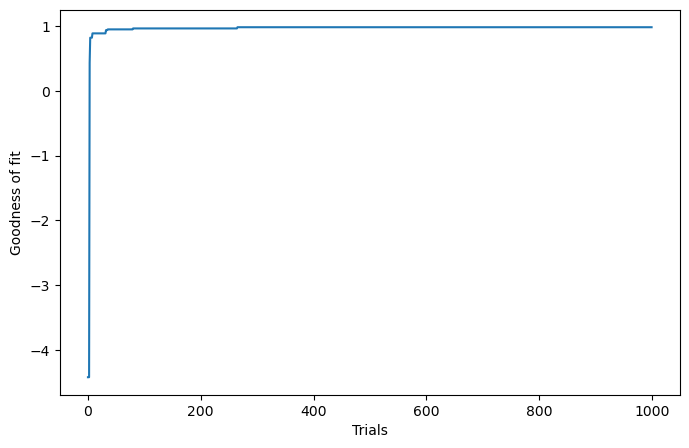

In [73]:
pdf = PdfPages('Hyperparameter optimization.pdf')
fig1 = plt.figure(1, figsize = (8,5))
plt.plot(A, B) 
plt.xlabel('Trials') 
plt.ylabel('Goodness of fit') 
plt.show()
pdf.savefig(fig1)
plt.close()
pdf.close() 

In [74]:
pred = lssvm.predict(X)
pred = np.array(pred)
Y = np.array(data.iloc[:,-1])
pred = pred*(max(Y)-min(Y))+min(Y)
y = np.array(y)
y = y*(max(Y)-min(Y))+min(Y)
error = pred - y

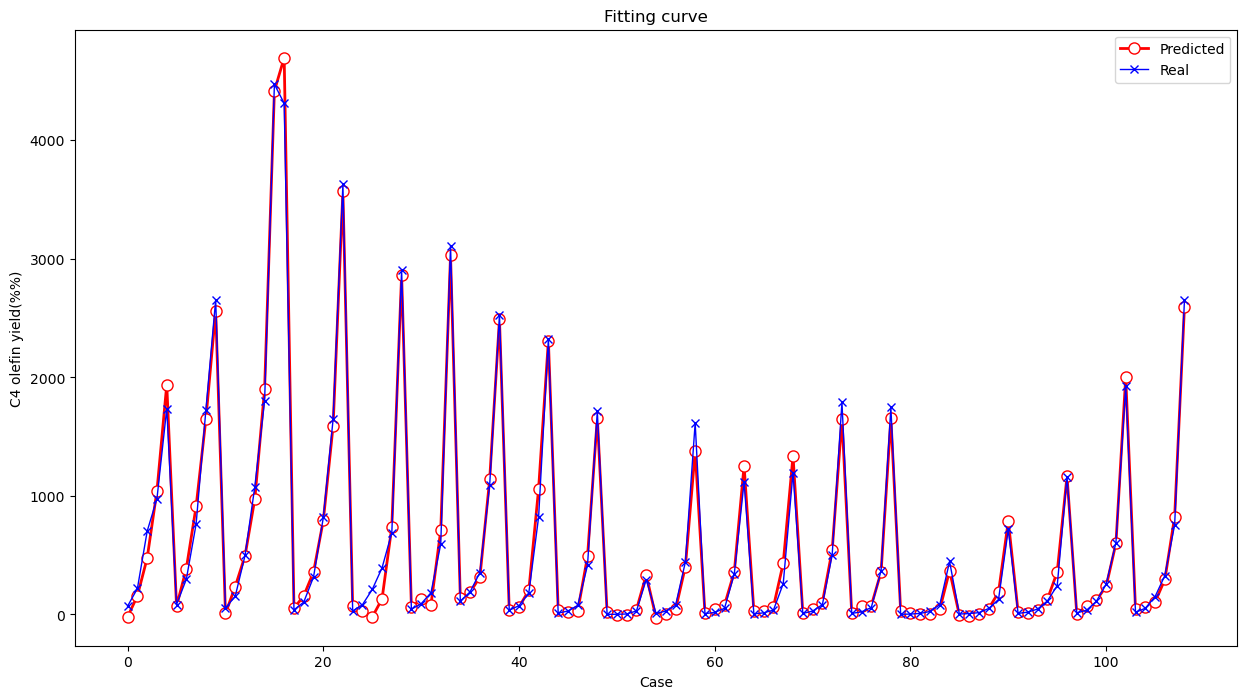

In [75]:
pdf = PdfPages('Fitting curve.pdf')
fig2 = plt.figure(2,figsize = (15,8))
plt.plot(pred,linewidth=2,marker='o',markerfacecolor='white',c='red',markersize=8)
plt.plot(y,linewidth=1,marker='x',c='blue')
plt.xlabel('Case',fontsize='medium')
plt.ylabel('C4 olefin yield(%%)',fontsize='medium')
plt.title('Fitting curve',fontsize='large')
plt.legend(['Predicted','Real'], loc='upper right')
plt.show()
pdf.savefig(fig2)
plt.close()
pdf.close()

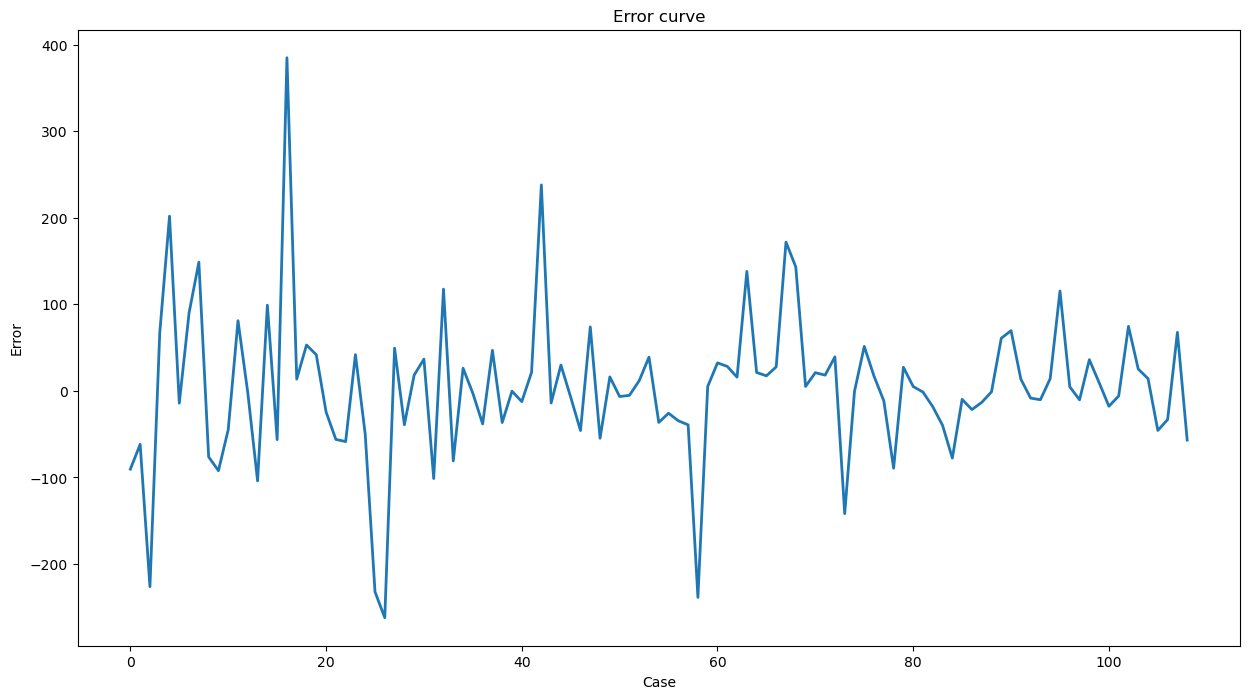

In [76]:
pdf = PdfPages('Error curve.pdf')
fig3 = plt.figure(3,figsize = (15,8))
plt.plot(error,linewidth=2)
plt.xlabel('Case',fontsize='medium')
plt.ylabel('Error',fontsize='medium')
plt.title('Error curve',fontsize='large')
plt.show()
pdf.savefig(fig3)
plt.close()
pdf.close()

In [77]:
explainer = shap.KernelExplainer(lssvm.predict, X)
shap_values = explainer.shap_values(X)

Using 109 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/109 [00:00<?, ?it/s]

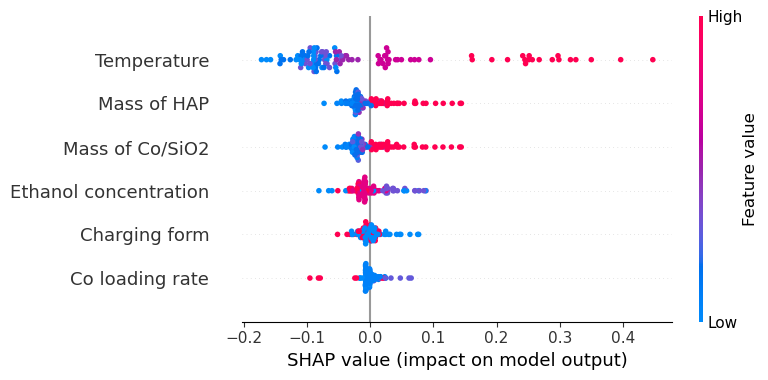

In [78]:
shap.summary_plot(shap_values, X, max_display=6)

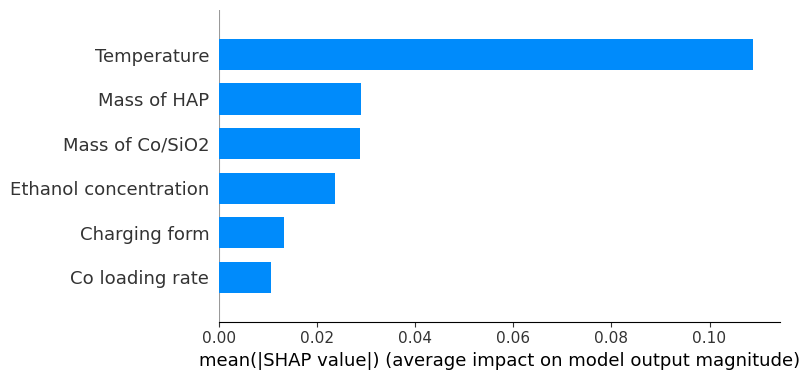

<Figure size 640x480 with 0 Axes>

In [79]:
shap.summary_plot(shap_values, test_x, plot_type='bar', max_display=6)
plt.savefig("feature_importance.pdf", format="pdf")

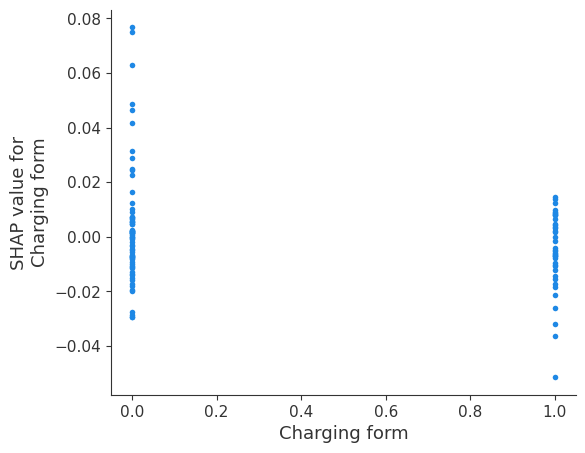

In [80]:
shap.dependence_plot('Charging form', shap_values, X, interaction_index=None, show=False)

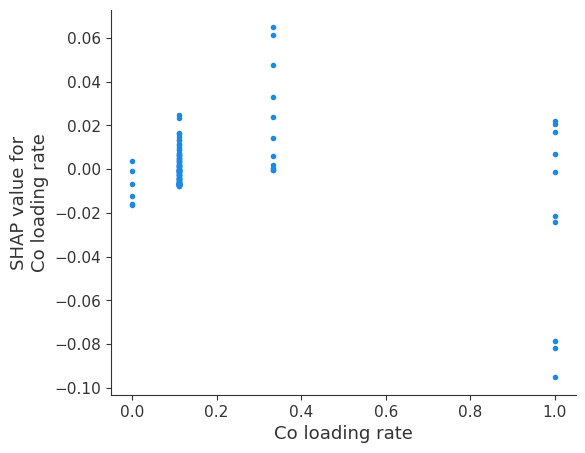

In [81]:
shap.dependence_plot('Co loading rate', shap_values, X, interaction_index=None, show=False)

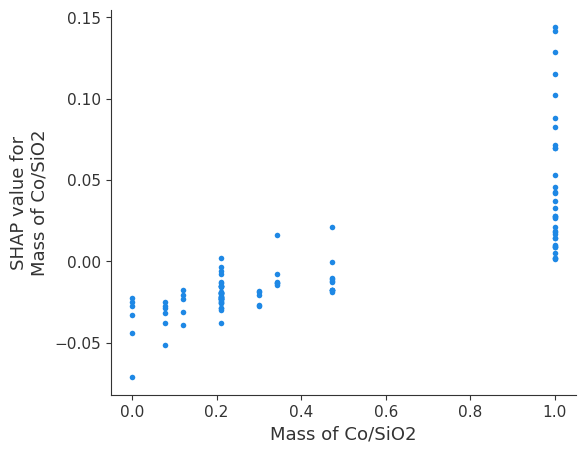

In [82]:
shap.dependence_plot('Mass of Co/SiO2', shap_values, X, interaction_index=None, show=False)

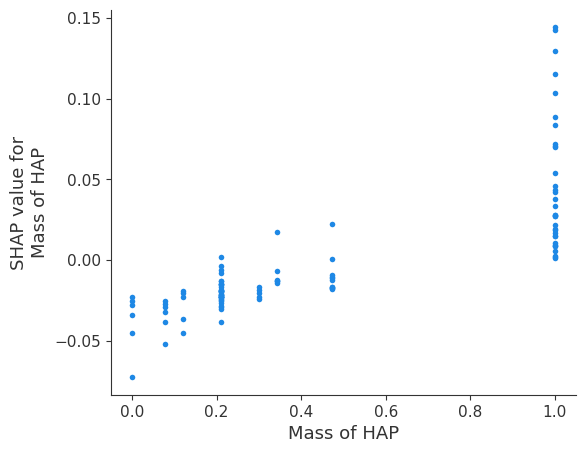

In [83]:
shap.dependence_plot('Mass of HAP', shap_values, X, interaction_index=None, show=False)

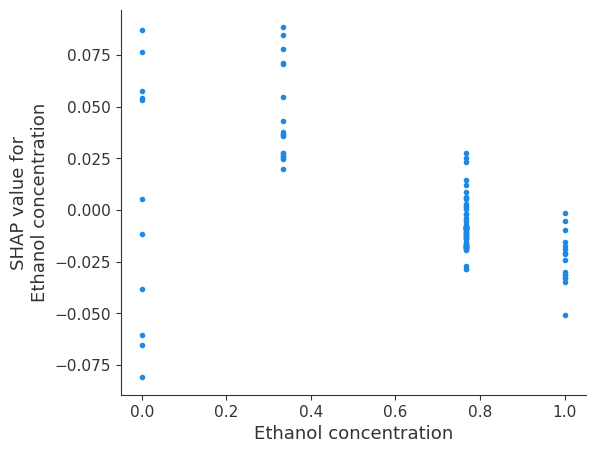

In [84]:
shap.dependence_plot('Ethanol concentration', shap_values, X, interaction_index=None, show=False)

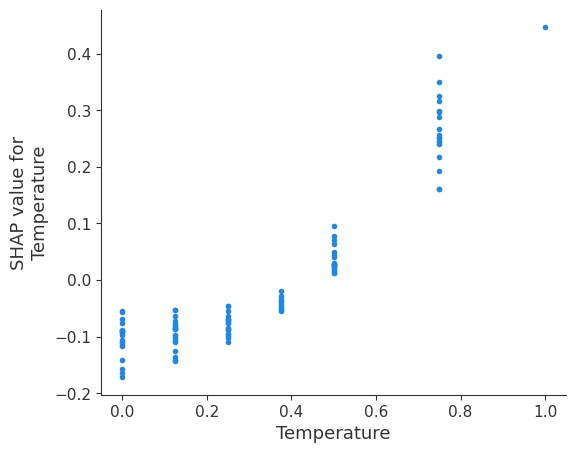

In [85]:
shap.dependence_plot('Temperature', shap_values, X, interaction_index=None, show=False)

In [91]:
def function(trial):
   
    x0 = trial.suggest_categorical('x0', [0, 1])
    x1 = trial.suggest_float('x1', 0.0, 1.0)
    x2 = trial.suggest_float('x2', 0.2, 1.0)
    x3 = trial.suggest_float('x3', 0.2, 1.0)
    x4 = trial.suggest_float('x4', 0.0, 0.8)
    x5 = trial.suggest_float('x5', 0.4, 1.0)
    
    a = np.array([x0,x1,x2,x3,x4,x5]).reshape(1, -1)

    b = lssvm.predict(a)
    result = b*(max(Y)-min(Y))+min(Y)

    return result

In [92]:
study2 = optuna.create_study(direction='maximize')
study2.optimize(function, n_trials=1000)
print('Best Parameters: ', study2.best_params)
print('Best Score: ', study2.best_value)

[I 2023-03-23 22:13:49,387] A new study created in memory with name: no-name-913fd6a2-05b2-40f4-bdec-46b19733251b
[I 2023-03-23 22:13:49,391] Trial 0 finished with value: 1008.6847373865828 and parameters: {'x0': 1, 'x1': 0.8760765742398504, 'x2': 0.207465731602956, 'x3': 0.5527834386635044, 'x4': 0.01905315760889268, 'x5': 0.4983859593139496}. Best is trial 0 with value: 1008.6847373865828.
[I 2023-03-23 22:13:49,394] Trial 1 finished with value: 1335.2455023151688 and parameters: {'x0': 1, 'x1': 0.18174501274719346, 'x2': 0.7049313005310613, 'x3': 0.624947899035956, 'x4': 0.44162889456119037, 'x5': 0.6598518765786838}. Best is trial 1 with value: 1335.2455023151688.
[I 2023-03-23 22:13:49,397] Trial 2 finished with value: 927.1954276411758 and parameters: {'x0': 0, 'x1': 0.8993664316591816, 'x2': 0.9305719455304453, 'x3': 0.42890828914530277, 'x4': 0.7310498953627929, 'x5': 0.4778364308409967}. Best is trial 1 with value: 1335.2455023151688.
[I 2023-03-23 22:13:49,400] Trial 3 finish

[I 2023-03-23 22:13:49,658] Trial 28 finished with value: 2900.570800247222 and parameters: {'x0': 0, 'x1': 0.5850808330911306, 'x2': 0.8962053567821875, 'x3': 0.9176428660177931, 'x4': 0.6707309517870372, 'x5': 0.6284159789511427}. Best is trial 21 with value: 4116.016597292135.
[I 2023-03-23 22:13:49,672] Trial 29 finished with value: 915.0397560324445 and parameters: {'x0': 1, 'x1': 0.41896719971558705, 'x2': 0.9923469729038751, 'x3': 0.6586691489854122, 'x4': 0.6264707851368408, 'x5': 0.5844370192114466}. Best is trial 21 with value: 4116.016597292135.
[I 2023-03-23 22:13:49,684] Trial 30 finished with value: 2397.7007896906193 and parameters: {'x0': 0, 'x1': 0.2974057704327593, 'x2': 0.8824028844968739, 'x3': 0.7926355417593085, 'x4': 0.7443391402091073, 'x5': 0.5419208352504469}. Best is trial 21 with value: 4116.016597292135.
[I 2023-03-23 22:13:49,698] Trial 31 finished with value: 3720.1944807151135 and parameters: {'x0': 0, 'x1': 0.354578460049742, 'x2': 0.8087620174094946, '

[I 2023-03-23 22:13:50,050] Trial 56 finished with value: 4127.524597191522 and parameters: {'x0': 0, 'x1': 0.4250852039493154, 'x2': 0.9043205541158094, 'x3': 0.953902257052984, 'x4': 0.5191702629244438, 'x5': 0.8909146051082064}. Best is trial 34 with value: 4875.27284928851.
[I 2023-03-23 22:13:50,071] Trial 57 finished with value: 4342.855721165768 and parameters: {'x0': 0, 'x1': 0.22478264892219088, 'x2': 0.8360549539052796, 'x3': 0.9932739193272084, 'x4': 0.564492606233161, 'x5': 0.9326620054291551}. Best is trial 34 with value: 4875.27284928851.
[I 2023-03-23 22:13:50,089] Trial 58 finished with value: 4247.953385635036 and parameters: {'x0': 0, 'x1': 0.2187785070719912, 'x2': 0.8205866584484487, 'x3': 0.9883114123329897, 'x4': 0.5660672100921251, 'x5': 0.937719120783344}. Best is trial 34 with value: 4875.27284928851.
[I 2023-03-23 22:13:50,099] Trial 59 finished with value: 3518.6657826301107 and parameters: {'x0': 0, 'x1': 0.2294691682884835, 'x2': 0.736999680927599, 'x3': 0.

[I 2023-03-23 22:13:50,462] Trial 84 finished with value: 4816.463029808677 and parameters: {'x0': 0, 'x1': 0.19524119621850966, 'x2': 0.9138358192638686, 'x3': 0.9836481804540914, 'x4': 0.5605464461878132, 'x5': 0.8586540375714156}. Best is trial 63 with value: 4903.519278550629.
[I 2023-03-23 22:13:50,474] Trial 85 finished with value: 4813.711236738849 and parameters: {'x0': 0, 'x1': 0.19410405423913665, 'x2': 0.9178960494100689, 'x3': 0.9993252151504968, 'x4': 0.5722105021844055, 'x5': 0.8724878188028984}. Best is trial 63 with value: 4903.519278550629.
[I 2023-03-23 22:13:50,491] Trial 86 finished with value: 4793.1284266872335 and parameters: {'x0': 0, 'x1': 0.20281214277797102, 'x2': 0.908874974368931, 'x3': 0.9974284633953115, 'x4': 0.5646229640060545, 'x5': 0.8693735630676519}. Best is trial 63 with value: 4903.519278550629.
[I 2023-03-23 22:13:50,497] Trial 87 finished with value: 4813.485472595173 and parameters: {'x0': 0, 'x1': 0.2031735059854179, 'x2': 0.9084752520252238, 

[I 2023-03-23 22:13:50,928] Trial 112 finished with value: 4975.618218278724 and parameters: {'x0': 0, 'x1': 0.08870732984779382, 'x2': 0.9852009819700297, 'x3': 0.9638356807617399, 'x4': 0.395005245633592, 'x5': 0.8623588856125419}. Best is trial 99 with value: 5036.263742612769.
[I 2023-03-23 22:13:50,942] Trial 113 finished with value: 4770.741451393905 and parameters: {'x0': 0, 'x1': 0.08118598344929776, 'x2': 0.95563218182297, 'x3': 0.9140025977617363, 'x4': 0.3926696785571768, 'x5': 0.8427000730282933}. Best is trial 99 with value: 5036.263742612769.
[I 2023-03-23 22:13:50,958] Trial 114 finished with value: 4827.011754372096 and parameters: {'x0': 0, 'x1': 0.04153320526473886, 'x2': 0.9849616053865579, 'x3': 0.9650635872058714, 'x4': 0.37982582445125207, 'x5': 0.863561553947574}. Best is trial 99 with value: 5036.263742612769.
[I 2023-03-23 22:13:50,974] Trial 115 finished with value: 4903.469136834433 and parameters: {'x0': 0, 'x1': 0.09538635322816169, 'x2': 0.9820009178044872

[I 2023-03-23 22:13:51,384] Trial 140 finished with value: 4848.546691387165 and parameters: {'x0': 0, 'x1': 0.07539608781149183, 'x2': 0.9707451207595561, 'x3': 0.9348956480370476, 'x4': 0.45329949706454936, 'x5': 0.8396311224178092}. Best is trial 134 with value: 5054.470113649625.
[I 2023-03-23 22:13:51,413] Trial 141 finished with value: 4968.941679965132 and parameters: {'x0': 0, 'x1': 0.11080150469497653, 'x2': 0.9697571912580042, 'x3': 0.9459666110975561, 'x4': 0.4369171850379718, 'x5': 0.8501892734046483}. Best is trial 134 with value: 5054.470113649625.
[I 2023-03-23 22:13:51,431] Trial 142 finished with value: 5085.023523917038 and parameters: {'x0': 0, 'x1': 0.16139627780391444, 'x2': 0.9979304512504749, 'x3': 0.9899605896866017, 'x4': 0.4194966887760614, 'x5': 0.855323147218577}. Best is trial 142 with value: 5085.023523917038.
[I 2023-03-23 22:13:51,450] Trial 143 finished with value: 4986.536826869964 and parameters: {'x0': 0, 'x1': 0.17095799906174372, 'x2': 0.9981950892

[I 2023-03-23 22:13:51,896] Trial 168 finished with value: 4981.614630148579 and parameters: {'x0': 0, 'x1': 0.12315303761332697, 'x2': 0.9475241279934059, 'x3': 0.9448178192752786, 'x4': 0.43031755620352563, 'x5': 0.879021903495882}. Best is trial 142 with value: 5085.023523917038.
[I 2023-03-23 22:13:51,913] Trial 169 finished with value: 4736.547417292648 and parameters: {'x0': 0, 'x1': 0.15010237548651023, 'x2': 0.9209377856660546, 'x3': 0.9110025935049576, 'x4': 0.49134202398460847, 'x5': 0.8252664624477744}. Best is trial 142 with value: 5085.023523917038.
[I 2023-03-23 22:13:51,930] Trial 170 finished with value: 2492.497927189574 and parameters: {'x0': 0, 'x1': 0.18087077467050183, 'x2': 0.5415220492356311, 'x3': 0.9765022067792831, 'x4': 0.4612425675902993, 'x5': 0.8682430168595099}. Best is trial 142 with value: 5085.023523917038.
[I 2023-03-23 22:13:51,949] Trial 171 finished with value: 4987.048499727892 and parameters: {'x0': 0, 'x1': 0.21002368431220358, 'x2': 0.966286765

[I 2023-03-23 22:13:52,406] Trial 196 finished with value: 4012.530596200204 and parameters: {'x0': 0, 'x1': 0.2698669500522134, 'x2': 0.9853631521284285, 'x3': 0.9998563693595579, 'x4': 0.4522785563319393, 'x5': 0.6809971626938252}. Best is trial 142 with value: 5085.023523917038.
[I 2023-03-23 22:13:52,414] Trial 197 finished with value: 5047.203896564932 and parameters: {'x0': 0, 'x1': 0.17082962867102947, 'x2': 0.9628141330368455, 'x3': 0.9638337422575846, 'x4': 0.4672977863616261, 'x5': 0.8784216331109788}. Best is trial 142 with value: 5085.023523917038.
[I 2023-03-23 22:13:52,444] Trial 198 finished with value: 4922.162746111224 and parameters: {'x0': 0, 'x1': 0.07799751720707734, 'x2': 0.9642678452312454, 'x3': 0.9442262087442375, 'x4': 0.4690699036625596, 'x5': 0.8929842345170538}. Best is trial 142 with value: 5085.023523917038.
[I 2023-03-23 22:13:52,468] Trial 199 finished with value: 4905.20812184172 and parameters: {'x0': 0, 'x1': 0.1286283090188286, 'x2': 0.9744066001288

[I 2023-03-23 22:13:52,989] Trial 224 finished with value: 1927.8803317151487 and parameters: {'x0': 0, 'x1': 0.17282835961683793, 'x2': 0.4394303442028576, 'x3': 0.9882455444236128, 'x4': 0.37475971000788827, 'x5': 0.8733699288750044}. Best is trial 214 with value: 5089.137924637962.
[I 2023-03-23 22:13:53,030] Trial 225 finished with value: 5047.061300852135 and parameters: {'x0': 0, 'x1': 0.18858822207475667, 'x2': 0.98673414279637, 'x3': 0.9873703276709992, 'x4': 0.36479724186393936, 'x5': 0.8682766725929512}. Best is trial 214 with value: 5089.137924637962.
[I 2023-03-23 22:13:53,054] Trial 226 finished with value: 5044.105320512446 and parameters: {'x0': 0, 'x1': 0.19113714723702463, 'x2': 0.986962956049677, 'x3': 0.9844588809184818, 'x4': 0.3654915136048706, 'x5': 0.8681315539323304}. Best is trial 214 with value: 5089.137924637962.
[I 2023-03-23 22:13:53,077] Trial 227 finished with value: 1153.7496427842732 and parameters: {'x0': 1, 'x1': 0.20247885867559212, 'x2': 0.986876638

[I 2023-03-23 22:13:53,718] Trial 252 finished with value: 5051.085813474861 and parameters: {'x0': 0, 'x1': 0.2097424693186695, 'x2': 0.9841343769624867, 'x3': 0.9820096219281783, 'x4': 0.3947718594463333, 'x5': 0.8759140726055952}. Best is trial 214 with value: 5089.137924637962.
[I 2023-03-23 22:13:53,746] Trial 253 finished with value: 1534.4253821084494 and parameters: {'x0': 0, 'x1': 0.6015972000883043, 'x2': 0.706591953102448, 'x3': 0.5023309551581898, 'x4': 0.36073704758153025, 'x5': 0.8651490682127639}. Best is trial 214 with value: 5089.137924637962.
[I 2023-03-23 22:13:53,771] Trial 254 finished with value: 4969.658940107191 and parameters: {'x0': 0, 'x1': 0.15007485698945797, 'x2': 0.9643355072173043, 'x3': 0.975385513550089, 'x4': 0.3207911527980566, 'x5': 0.8792817037120034}. Best is trial 214 with value: 5089.137924637962.
[I 2023-03-23 22:13:53,799] Trial 255 finished with value: 1922.7578994334656 and parameters: {'x0': 0, 'x1': 0.16912885630588656, 'x2': 0.99911774598

[I 2023-03-23 22:13:54,474] Trial 280 finished with value: 2729.7009952065087 and parameters: {'x0': 0, 'x1': 0.20240236347460755, 'x2': 0.5821122910254131, 'x3': 0.954281437822191, 'x4': 0.32063794389841616, 'x5': 0.8855371884036844}. Best is trial 214 with value: 5089.137924637962.
[I 2023-03-23 22:13:54,501] Trial 281 finished with value: 3545.7146274185156 and parameters: {'x0': 0, 'x1': 0.18209609518741676, 'x2': 0.6888390675047775, 'x3': 0.9700065250279963, 'x4': 0.3626440219449353, 'x5': 0.8971561725968602}. Best is trial 214 with value: 5089.137924637962.
[I 2023-03-23 22:13:54,526] Trial 282 finished with value: 4971.806289167669 and parameters: {'x0': 0, 'x1': 0.15184547526593356, 'x2': 0.9632853553597167, 'x3': 0.9868761954926769, 'x4': 0.3774501832785259, 'x5': 0.9454458002535966}. Best is trial 214 with value: 5089.137924637962.
[I 2023-03-23 22:13:54,545] Trial 283 finished with value: 1356.8386557645981 and parameters: {'x0': 0, 'x1': 0.22496208652915653, 'x2': 0.8597730

[I 2023-03-23 22:13:55,158] Trial 308 finished with value: 4441.146076574717 and parameters: {'x0': 0, 'x1': 0.01912171708870672, 'x2': 0.9603779390063881, 'x3': 0.973985913396803, 'x4': 0.42046390083266505, 'x5': 0.7784751870935491}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:55,184] Trial 309 finished with value: 4973.335776857163 and parameters: {'x0': 0, 'x1': 0.156476591731004, 'x2': 0.9337904124428327, 'x3': 0.9998147371617028, 'x4': 0.40298301717091267, 'x5': 0.9282277859594845}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:55,201] Trial 310 finished with value: 3593.5365588929694 and parameters: {'x0': 0, 'x1': 0.2117314704188704, 'x2': 0.9869894436852387, 'x3': 0.6983788342830852, 'x4': 0.3847056975598384, 'x5': 0.8527295357387468}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:55,228] Trial 311 finished with value: 3861.5211752391874 and parameters: {'x0': 0, 'x1': 0.18419663738123063, 'x2': 0.9991990488

[I 2023-03-23 22:13:55,863] Trial 336 finished with value: 2454.8232639218195 and parameters: {'x0': 0, 'x1': 0.2795034045018499, 'x2': 0.9484319710945712, 'x3': 0.5599190409364405, 'x4': 0.3974031210146534, 'x5': 0.7974016824415578}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:55,890] Trial 337 finished with value: 4922.744058063918 and parameters: {'x0': 0, 'x1': 0.24977686739532998, 'x2': 0.9705323038148432, 'x3': 0.9691866972531528, 'x4': 0.4120194209880812, 'x5': 0.9160538123501555}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:55,923] Trial 338 finished with value: 5044.078115488349 and parameters: {'x0': 0, 'x1': 0.16535599487524272, 'x2': 0.983868660410586, 'x3': 0.9534085563191762, 'x4': 0.3799745085970346, 'x5': 0.8832023859475835}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:55,956] Trial 339 finished with value: 4793.930416618928 and parameters: {'x0': 0, 'x1': 0.0461794215663624, 'x2': 0.934432806645

[I 2023-03-23 22:13:56,679] Trial 364 finished with value: 3810.015440309511 and parameters: {'x0': 0, 'x1': 0.4338580509200594, 'x2': 0.9994313112272565, 'x3': 0.9996834886588639, 'x4': 0.40304592718449256, 'x5': 0.738102142258821}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:56,710] Trial 365 finished with value: 5020.858474591073 and parameters: {'x0': 0, 'x1': 0.16954828740989936, 'x2': 0.9641668367135733, 'x3': 0.9539252176167664, 'x4': 0.37492399081063194, 'x5': 0.8853155506242555}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:56,742] Trial 366 finished with value: 4819.799756021226 and parameters: {'x0': 0, 'x1': 0.06916572036835371, 'x2': 0.9747055336675667, 'x3': 0.97968220680338, 'x4': 0.3044427255530904, 'x5': 0.8982760702651875}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:56,774] Trial 367 finished with value: 2906.733197917839 and parameters: {'x0': 0, 'x1': 0.1356445417183256, 'x2': 0.6040642837207

[I 2023-03-23 22:13:57,421] Trial 392 finished with value: 4589.772328010044 and parameters: {'x0': 0, 'x1': 0.3467501361972906, 'x2': 0.9626622850926598, 'x3': 0.9759315046305608, 'x4': 0.3981227814170975, 'x5': 0.8982947243123856}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:57,436] Trial 393 finished with value: 1351.3237795584625 and parameters: {'x0': 1, 'x1': 0.10802860258263516, 'x2': 0.9419462273099557, 'x3': 0.8072060681566811, 'x4': 0.4121768231138085, 'x5': 0.9074017011989376}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:57,480] Trial 394 finished with value: 4124.226355157057 and parameters: {'x0': 0, 'x1': 0.22670424696948097, 'x2': 0.7893203324397221, 'x3': 0.9886264594762592, 'x4': 0.45134529764146036, 'x5': 0.9576608326684461}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:57,502] Trial 395 finished with value: 2099.8747016584043 and parameters: {'x0': 0, 'x1': 0.46641400448911147, 'x2': 0.97145512

[I 2023-03-23 22:13:58,195] Trial 420 finished with value: 3588.962444176384 and parameters: {'x0': 0, 'x1': 0.1411660235570026, 'x2': 0.696382601755879, 'x3': 0.9412465012412852, 'x4': 0.383038287682622, 'x5': 0.8791014873073991}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:58,229] Trial 421 finished with value: 4523.609139005489 and parameters: {'x0': 0, 'x1': 0.3556573119265111, 'x2': 0.9733813544064428, 'x3': 0.9725373252804473, 'x4': 0.37379572704344277, 'x5': 0.913139966274184}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:58,256] Trial 422 finished with value: 1505.3184459125898 and parameters: {'x0': 0, 'x1': 0.10061308461129148, 'x2': 0.9996187212785889, 'x3': 0.33077650333107245, 'x4': 0.33105092948283077, 'x5': 0.8894868781640709}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:58,286] Trial 423 finished with value: 3805.3928401146964 and parameters: {'x0': 0, 'x1': 0.21468144021034374, 'x2': 0.9849954016

[I 2023-03-23 22:13:58,997] Trial 448 finished with value: 2262.613347280916 and parameters: {'x0': 0, 'x1': 0.13758730902161848, 'x2': 0.9856665110190822, 'x3': 0.5061712365510175, 'x4': 0.46003443846917447, 'x5': 0.8499481396759886}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:59,028] Trial 449 finished with value: 3869.6244832610396 and parameters: {'x0': 0, 'x1': 0.2259855274632171, 'x2': 0.9630931542720987, 'x3': 0.7359042725952789, 'x4': 0.4313762803015733, 'x5': 0.8931681418402743}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:59,053] Trial 450 finished with value: 3059.1681738076118 and parameters: {'x0': 0, 'x1': 0.4542101952988796, 'x2': 0.7296069125896902, 'x3': 0.8623691873339296, 'x4': 0.5491897130589936, 'x5': 0.8714142517477924}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:59,087] Trial 451 finished with value: 3693.6301463358964 and parameters: {'x0': 0, 'x1': 0.3231016313289933, 'x2': 0.948168748

[I 2023-03-23 22:13:59,778] Trial 476 finished with value: 2467.1885805275247 and parameters: {'x0': 0, 'x1': 0.8603920346208442, 'x2': 0.9863140044484894, 'x3': 0.9766522550308346, 'x4': 0.34063910369047967, 'x5': 0.8658079513561904}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:59,815] Trial 477 finished with value: 4897.042096112006 and parameters: {'x0': 0, 'x1': 0.10310278455195857, 'x2': 0.9082738974988636, 'x3': 0.9856948445077863, 'x4': 0.4213344056908513, 'x5': 0.8758426314740265}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:59,841] Trial 478 finished with value: 2018.6712854604768 and parameters: {'x0': 0, 'x1': 0.35002886043398074, 'x2': 0.5083726901653598, 'x3': 0.7895804687578729, 'x4': 0.36535700781462727, 'x5': 0.8561684557176488}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:13:59,873] Trial 479 finished with value: 5064.174665273656 and parameters: {'x0': 0, 'x1': 0.17790632293913042, 'x2': 0.9587027

[I 2023-03-23 22:14:00,625] Trial 504 finished with value: 4789.848417771759 and parameters: {'x0': 0, 'x1': 0.2660584008841122, 'x2': 0.9526061995467326, 'x3': 0.920795754384893, 'x4': 0.4575702953943961, 'x5': 0.8759895300112408}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:00,666] Trial 505 finished with value: 4729.779388240065 and parameters: {'x0': 0, 'x1': 0.002039386609245658, 'x2': 0.9736853095691624, 'x3': 0.9994571547306881, 'x4': 0.4181593405762779, 'x5': 0.9014511778166476}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:00,695] Trial 506 finished with value: 1229.5264068356637 and parameters: {'x0': 0, 'x1': 0.22692340686761409, 'x2': 0.9843890732702674, 'x3': 0.34134204459004297, 'x4': 0.38936960075191335, 'x5': 0.5816682831520222}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:00,727] Trial 507 finished with value: 3526.969242521192 and parameters: {'x0': 0, 'x1': 0.18819003634916578, 'x2': 0.94286514

[I 2023-03-23 22:14:01,483] Trial 532 finished with value: 2726.2558089923687 and parameters: {'x0': 0, 'x1': 0.4170831183183037, 'x2': 0.974443474910708, 'x3': 0.9729792742031743, 'x4': 0.6195777348863049, 'x5': 0.5216526040697045}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:01,513] Trial 533 finished with value: 1749.035228150176 and parameters: {'x0': 0, 'x1': 0.32736597242520454, 'x2': 0.8127107434330177, 'x3': 0.4776837078426777, 'x4': 0.38122898946112543, 'x5': 0.7116613164376356}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:01,539] Trial 534 finished with value: 4040.7574212522627 and parameters: {'x0': 0, 'x1': 0.19997757470817776, 'x2': 0.9871714888515949, 'x3': 0.9038129291702243, 'x4': 0.7757844348279481, 'x5': 0.9009079311856456}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:01,567] Trial 535 finished with value: 1135.2498882686173 and parameters: {'x0': 0, 'x1': 0.1294598856068111, 'x2': 0.999415143

[I 2023-03-23 22:14:02,510] Trial 560 finished with value: 1606.1419710146854 and parameters: {'x0': 0, 'x1': 0.16400525791667486, 'x2': 0.37381977467870486, 'x3': 0.9834227781959977, 'x4': 0.447622123194998, 'x5': 0.7896450047895656}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:02,548] Trial 561 finished with value: 1976.7497629568409 and parameters: {'x0': 0, 'x1': 0.18209722315734744, 'x2': 0.5562006365181296, 'x3': 0.7804770062799374, 'x4': 0.5639076257840414, 'x5': 0.6858567644371103}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:02,588] Trial 562 finished with value: 3613.689560614556 and parameters: {'x0': 0, 'x1': 0.5430513980407696, 'x2': 0.9738262049450463, 'x3': 0.8655170265622435, 'x4': 0.7390526698969695, 'x5': 0.8257915165689467}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:02,628] Trial 563 finished with value: 4870.873938122543 and parameters: {'x0': 0, 'x1': 0.15068062189029968, 'x2': 0.999459760

[I 2023-03-23 22:14:03,619] Trial 588 finished with value: 3071.7408540394003 and parameters: {'x0': 0, 'x1': 0.6736353612856968, 'x2': 0.9846626250150322, 'x3': 0.7583806894331306, 'x4': 0.6925585045708302, 'x5': 0.8485363691326278}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:03,668] Trial 589 finished with value: 2140.241013003586 and parameters: {'x0': 0, 'x1': 0.23101307669008192, 'x2': 0.32446049390672244, 'x3': 0.3174573232761046, 'x4': 0.41209098414315637, 'x5': 0.8654909950304484}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:03,715] Trial 590 finished with value: 2529.4658753974095 and parameters: {'x0': 0, 'x1': 0.12557446255375862, 'x2': 0.6178045374825476, 'x3': 0.919066466477394, 'x4': 0.47723650850434207, 'x5': 0.6989349618379014}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:03,757] Trial 591 finished with value: 4301.82867495368 and parameters: {'x0': 0, 'x1': 0.14986034167114703, 'x2': 0.96955817

[I 2023-03-23 22:14:04,753] Trial 616 finished with value: 2316.814926126328 and parameters: {'x0': 0, 'x1': 0.15587737621910586, 'x2': 0.4093780400008865, 'x3': 0.2711772371998432, 'x4': 0.3279042037291788, 'x5': 0.9367195590900019}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:04,794] Trial 617 finished with value: 4447.160671053449 and parameters: {'x0': 0, 'x1': 0.20818036390442274, 'x2': 0.9996204037790174, 'x3': 0.8164582261262162, 'x4': 0.3843946718114405, 'x5': 0.8753455447779631}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:04,839] Trial 618 finished with value: 4639.3366336353 and parameters: {'x0': 0, 'x1': 0.25265920623921423, 'x2': 0.9734550173982787, 'x3': 0.8707058134793261, 'x4': 0.4260536219464881, 'x5': 0.9112233017189658}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:04,881] Trial 619 finished with value: 2077.9402213494736 and parameters: {'x0': 0, 'x1': 0.13697981827492647, 'x2': 0.98573824507

[I 2023-03-23 22:14:05,928] Trial 644 finished with value: 5014.851595844156 and parameters: {'x0': 0, 'x1': 0.2095471003727873, 'x2': 0.9998114567754364, 'x3': 0.9491147951641945, 'x4': 0.41401712608796865, 'x5': 0.8986839399142453}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:05,965] Trial 645 finished with value: 3334.545257867336 and parameters: {'x0': 0, 'x1': 0.1607553521412151, 'x2': 0.9230586095834392, 'x3': 0.984682205657571, 'x4': 0.7481977138810639, 'x5': 0.6482820410986498}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:06,013] Trial 646 finished with value: 1076.5148925900637 and parameters: {'x0': 0, 'x1': 0.19457246694164199, 'x2': 0.9529515889051844, 'x3': 0.3674488513317904, 'x4': 0.3786483649752968, 'x5': 0.4641841301968813}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:06,061] Trial 647 finished with value: 839.3437897106645 and parameters: {'x0': 0, 'x1': 0.9046012011226481, 'x2': 0.631748071493

[I 2023-03-23 22:14:07,115] Trial 672 finished with value: 1980.5354226553322 and parameters: {'x0': 0, 'x1': 0.18876238859333627, 'x2': 0.45514799226323455, 'x3': 0.8337850494130746, 'x4': 0.38678486564357445, 'x5': 0.869879634159153}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:07,161] Trial 673 finished with value: 1828.0967896840557 and parameters: {'x0': 0, 'x1': 0.22462653927406048, 'x2': 0.9857710782497009, 'x3': 0.42717954703506167, 'x4': 0.3576765592126205, 'x5': 0.962125352618397}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:07,200] Trial 674 finished with value: 1974.7567298980532 and parameters: {'x0': 0, 'x1': 0.13266963835926682, 'x2': 0.917861053914851, 'x3': 0.44935001674802766, 'x4': 0.41465440204929166, 'x5': 0.9033829329451565}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:07,237] Trial 675 finished with value: 2497.4430909330017 and parameters: {'x0': 0, 'x1': 0.43226925687886963, 'x2': 0.9611

[I 2023-03-23 22:14:08,275] Trial 700 finished with value: 3656.632944823161 and parameters: {'x0': 0, 'x1': 0.14445908702783547, 'x2': 0.999628146598649, 'x3': 0.6998529695634518, 'x4': 0.4248024685411488, 'x5': 0.8737947582171632}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:08,323] Trial 701 finished with value: 633.3357145418468 and parameters: {'x0': 0, 'x1': 0.030301756016252485, 'x2': 0.6787927301366012, 'x3': 0.22209302585157292, 'x4': 0.7132757167738277, 'x5': 0.43016700521603024}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:08,373] Trial 702 finished with value: 1874.8938516772623 and parameters: {'x0': 0, 'x1': 0.6097250963284078, 'x2': 0.6443581477799174, 'x3': 0.9507872648296997, 'x4': 0.07307896329865143, 'x5': 0.894589328894287}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:08,408] Trial 703 finished with value: 3644.998154389955 and parameters: {'x0': 0, 'x1': 0.22178332314915877, 'x2': 0.95391669

[I 2023-03-23 22:14:09,530] Trial 728 finished with value: 2142.586727726377 and parameters: {'x0': 0, 'x1': 0.39609342570019157, 'x2': 0.5385807094678501, 'x3': 0.9116753547962246, 'x4': 0.37768107401982953, 'x5': 0.8014983479279248}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:09,575] Trial 729 finished with value: 4383.216713443575 and parameters: {'x0': 0, 'x1': 0.002340268655854849, 'x2': 0.9857201512503116, 'x3': 0.8634325366710038, 'x4': 0.4026727088942311, 'x5': 0.927570461689657}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:09,612] Trial 730 finished with value: 1676.3605051904278 and parameters: {'x0': 0, 'x1': 0.08909555835283631, 'x2': 0.9330796856464402, 'x3': 0.3826148802642964, 'x4': 0.42406902779080874, 'x5': 0.857877875221824}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:09,649] Trial 731 finished with value: 5051.156249362247 and parameters: {'x0': 0, 'x1': 0.1882282052311252, 'x2': 0.970859751

[I 2023-03-23 22:14:10,805] Trial 756 finished with value: 4245.043763326654 and parameters: {'x0': 0, 'x1': 0.21454351897985896, 'x2': 0.7893652595649652, 'x3': 0.9707201987927647, 'x4': 0.3721742630982491, 'x5': 0.8713555985787289}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:10,859] Trial 757 finished with value: 1675.4961461591643 and parameters: {'x0': 0, 'x1': 0.3697380581382656, 'x2': 0.4561555741389437, 'x3': 0.27886313807388646, 'x4': 0.4541109575054455, 'x5': 0.8953939870702424}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:10,904] Trial 758 finished with value: 1894.9510884371348 and parameters: {'x0': 0, 'x1': 0.17176780426503319, 'x2': 0.9309579999983585, 'x3': 0.4428287462563024, 'x4': 0.2470085500502434, 'x5': 0.9689485953919674}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:10,937] Trial 759 finished with value: 3245.8064610456368 and parameters: {'x0': 0, 'x1': 0.4535479783085071, 'x2': 0.97414409

[I 2023-03-23 22:14:12,089] Trial 784 finished with value: 1904.9204311897688 and parameters: {'x0': 0, 'x1': 0.15939616681048827, 'x2': 0.9546950777501654, 'x3': 0.9714118020743017, 'x4': 0.37319601942967395, 'x5': 0.4894310972813268}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:12,130] Trial 785 finished with value: 1994.227363282004 and parameters: {'x0': 0, 'x1': 0.2938898937573133, 'x2': 0.46854302872753895, 'x3': 0.9999410157962475, 'x4': 0.40113369389114734, 'x5': 0.916569407681588}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:12,179] Trial 786 finished with value: 3811.9727708874047 and parameters: {'x0': 0, 'x1': 0.39820628990349816, 'x2': 0.9993838847190266, 'x3': 0.9577127896584814, 'x4': 0.42087035325350997, 'x5': 0.7111160799442503}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:12,229] Trial 787 finished with value: 3677.220915769493 and parameters: {'x0': 0, 'x1': 0.3124727307556181, 'x2': 0.9857196

[I 2023-03-23 22:14:13,440] Trial 812 finished with value: 1028.3109083369848 and parameters: {'x0': 1, 'x1': 0.020739184089463625, 'x2': 0.9680684563282468, 'x3': 0.9734114451306461, 'x4': 0.5255536470488127, 'x5': 0.6757037181825186}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:13,491] Trial 813 finished with value: 1723.6465790838122 and parameters: {'x0': 0, 'x1': 0.36879142728534187, 'x2': 0.424352499260613, 'x3': 0.8357696306789146, 'x4': 0.37787439616684637, 'x5': 0.8610960122913531}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:13,548] Trial 814 finished with value: 1299.8310025802632 and parameters: {'x0': 0, 'x1': 0.19690900679609602, 'x2': 0.8307944901820604, 'x3': 0.290348525607301, 'x4': 0.7169689442455527, 'x5': 0.9030986313586526}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:13,586] Trial 815 finished with value: 1116.1618384970116 and parameters: {'x0': 0, 'x1': 0.7976661138974346, 'x2': 0.2379371

[I 2023-03-23 22:14:15,146] Trial 840 finished with value: 4751.397764194382 and parameters: {'x0': 0, 'x1': 0.1413196303536712, 'x2': 0.8860292119098637, 'x3': 0.9349134815606117, 'x4': 0.38634228014255456, 'x5': 0.9149387417590714}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:15,216] Trial 841 finished with value: 2388.2484346428246 and parameters: {'x0': 0, 'x1': 0.07321467676039942, 'x2': 0.5808850332895131, 'x3': 0.9994974820377515, 'x4': 0.7473997403724862, 'x5': 0.8870370566797475}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:15,271] Trial 842 finished with value: 1602.619187311172 and parameters: {'x0': 0, 'x1': 0.22114293707764526, 'x2': 0.9885845494985667, 'x3': 0.970364681803303, 'x4': 0.42906124779376453, 'x5': 0.43455391342293737}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:15,338] Trial 843 finished with value: 5046.236026837887 and parameters: {'x0': 0, 'x1': 0.19220436616003125, 'x2': 0.99975514

[I 2023-03-23 22:14:16,694] Trial 868 finished with value: 1707.0162519530024 and parameters: {'x0': 0, 'x1': 0.5859908997004779, 'x2': 0.8139016928764341, 'x3': 0.5132858113307542, 'x4': 0.42398986076604084, 'x5': 0.897052085670845}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:16,736] Trial 869 finished with value: 1199.01453938698 and parameters: {'x0': 1, 'x1': 0.1604767903284339, 'x2': 0.956913728369578, 'x3': 0.9478679123977626, 'x4': 0.3920080254264279, 'x5': 0.8763895262759618}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:16,802] Trial 870 finished with value: 1017.2843015712508 and parameters: {'x0': 0, 'x1': 0.8593265130009391, 'x2': 0.4077757062464855, 'x3': 0.6030809162722847, 'x4': 0.4124758447374871, 'x5': 0.6178972715887452}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:16,855] Trial 871 finished with value: 4483.318768813948 and parameters: {'x0': 0, 'x1': 0.28780227828769467, 'x2': 0.8598538471434

[I 2023-03-23 22:14:18,218] Trial 896 finished with value: 1964.9495871622885 and parameters: {'x0': 0, 'x1': 0.8161823573698369, 'x2': 0.9845408576745001, 'x3': 0.9594642202040197, 'x4': 0.15453951785520453, 'x5': 0.8752904051139655}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:18,263] Trial 897 finished with value: 4957.273070953623 and parameters: {'x0': 0, 'x1': 0.11319198309417661, 'x2': 0.9737304726091819, 'x3': 0.9308462282025335, 'x4': 0.4064204573030649, 'x5': 0.910806884460125}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:18,334] Trial 898 finished with value: 949.0572123424508 and parameters: {'x0': 0, 'x1': 0.9937252330649368, 'x2': 0.36491792910642357, 'x3': 0.4736015765263664, 'x4': 0.4625564385780566, 'x5': 0.7215502060770053}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:18,422] Trial 899 finished with value: 1837.0517110638405 and parameters: {'x0': 0, 'x1': 0.747057098781071, 'x2': 0.81204370532

[I 2023-03-23 22:14:20,059] Trial 924 finished with value: 1527.2921295039366 and parameters: {'x0': 0, 'x1': 0.4228914748267403, 'x2': 0.3482892509617893, 'x3': 0.6135128418717528, 'x4': 0.41429204660652047, 'x5': 0.9307443377768883}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:20,122] Trial 925 finished with value: 1607.9211463733652 and parameters: {'x0': 1, 'x1': 0.1288935664984245, 'x2': 0.9261444091632623, 'x3': 0.5661848112330334, 'x4': 0.39696038993801225, 'x5': 0.8730969413031218}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:20,177] Trial 926 finished with value: 2735.0384764811993 and parameters: {'x0': 0, 'x1': 0.16762352387942678, 'x2': 0.7628515487405113, 'x3': 0.6399412016347583, 'x4': 0.27887742718402697, 'x5': 0.8964123968211981}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:20,235] Trial 927 finished with value: 4638.241430025354 and parameters: {'x0': 0, 'x1': 0.24353273304592948, 'x2': 0.899162

[I 2023-03-23 22:14:21,656] Trial 952 finished with value: 5029.653732638741 and parameters: {'x0': 0, 'x1': 0.17603473120783064, 'x2': 0.9857358031154515, 'x3': 0.9553053044550222, 'x4': 0.41646820124727074, 'x5': 0.849215272900002}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:21,721] Trial 953 finished with value: 2838.991843491943 and parameters: {'x0': 0, 'x1': 0.9133846476660921, 'x2': 0.9417818088115558, 'x3': 0.983775170212749, 'x4': 0.43495357536642104, 'x5': 0.891848507117868}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:21,776] Trial 954 finished with value: 2018.6227981751617 and parameters: {'x0': 0, 'x1': 0.15213087762465627, 'x2': 0.45757447441999927, 'x3': 0.9716774480007018, 'x4': 0.3966122085055257, 'x5': 0.8640525586149956}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:21,835] Trial 955 finished with value: 1690.9923244428976 and parameters: {'x0': 0, 'x1': 0.19416621727242794, 'x2': 0.315613863

[I 2023-03-23 22:14:23,238] Trial 980 finished with value: 2167.470882992442 and parameters: {'x0': 0, 'x1': 0.334504964702615, 'x2': 0.7175361133345524, 'x3': 0.6805778637371318, 'x4': 0.38819215002436336, 'x5': 0.6750255575643397}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:23,299] Trial 981 finished with value: 1546.2641340893122 and parameters: {'x0': 0, 'x1': 0.3090354253373362, 'x2': 0.6545857849983528, 'x3': 0.3091263759889388, 'x4': 0.4424053569470419, 'x5': 0.9034113393635839}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:23,354] Trial 982 finished with value: 1092.4933336814809 and parameters: {'x0': 1, 'x1': 0.1616343370197794, 'x2': 0.8396495255375919, 'x3': 0.9996663260248394, 'x4': 0.6570475256983295, 'x5': 0.8563597277790469}. Best is trial 302 with value: 5092.727050942098.
[I 2023-03-23 22:14:23,402] Trial 983 finished with value: 1642.7779035905105 and parameters: {'x0': 0, 'x1': 0.287228389230885, 'x2': 0.380135004411

Best Parameters:  {'x0': 0, 'x1': 0.1767340986034308, 'x2': 0.9999568447836131, 'x3': 0.9737212126438758, 'x4': 0.420414831861804, 'x5': 0.8887724629625344}
Best Score:  5092.727050942098


In [93]:
study2 = study2.trials_dataframe()
C = np.array(study2.iloc[:,0])
D = np.array(study2.iloc[:,1])
D = np.maximum.accumulate(D)

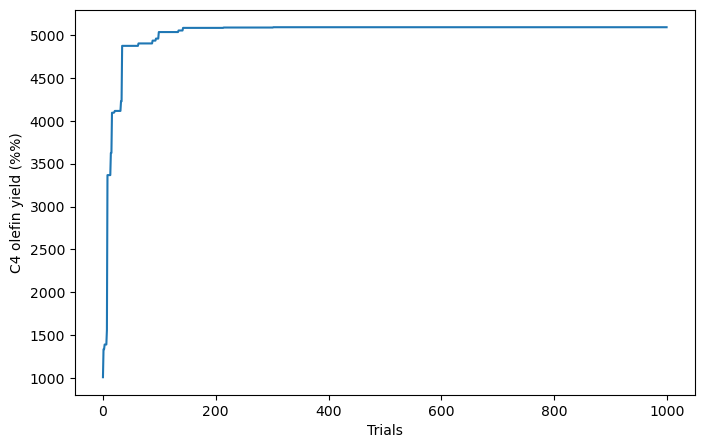

In [94]:
pdf = PdfPages('Ethanol reaction conditions optimization.pdf')
fig4 = plt.figure(4, figsize = (8,5))
plt.plot(C, D) 
plt.xlabel('Trials') 
plt.ylabel('C4 olefin yield (%%)') 
plt.show() 
pdf.savefig(fig4)
plt.close()
pdf.close() 

In [95]:
x0 = study.best_params['x0']
X0 = np.array(data.iloc[:,0])
x0 = x0*(max(X0)-min(X0))+min(X0)

x1 = study.best_params['x1']
X1 = np.array(data.iloc[:,1])
x1 = x1*(max(X1)-min(X1))+min(X1)

x2 = study.best_params['x2']
X2 = np.array(data.iloc[:,2])
x2 = x2*(max(X2)-min(X2))+min(X2)

x3 = study.best_params['x3']
X3 = np.array(data.iloc[:,3])
x3 = x3*(max(X3)-min(X3))+min(X3)

x4 = study.best_params['x4']
X4 = np.array(data.iloc[:,4])
x4 = x4*(max(X4)-min(X4))+min(X4)

x5 = study.best_params['x5']
X5 = np.array(data.iloc[:,5])
x5 = x5*(max(X5)-min(X5))+min(X5)

print('人工实验最优值：',max(Y))
print('人工智能最优值：',study.best_value)
print('优化比率：',study.best_value/max(Y)-1)
print('Charging form:',x0)
print('Co loading rate:',x1)
print('Mass of Co/SiO2:',x2)
print('Mass of HAP:',x3)
print('Ethanol concentration:',x4)
print('Temperature:',x5)

人工实验最优值： 4472.805977609709
人工智能最优值： 5246.725938538401
优化比率： 0.17302784086831324
Charging form: 0
Co loading rate: 1.8442848557774987
Mass of Co/SiO2: 184.52787630985412
Mass of HAP: 196.71177934878878
Ethanol concentration: 1.6876913402305682
Temperature: 449.941476875386
